# <center>Trends and Insights</center>
## <center>Analyzing Trending YouTube Videos (2017-2018)</center>

<center><img src='images/Image.png' width=1000, heigth=1000></center>

<strong>Project within the Data Analytics Training Program</strong>.  
The project aims to reinforce theoretical knowledge in descriptive statistics and beyond.

The dataset used for the research is "Trending YouTube Video Statistics," available at the following [link](https://www.kaggle.com/datasets/datasnaek/youtube-new/data).  

Thanks to the [author](https://medium.com/@raahimkhan_85173/data-cleaning-and-exploratory-data-analysis-with-pandas-on-trending-you-tube-video-statistics-e06d7cd08710) for conducting their own analysis and for the open publication.

---
# <center>1. Preparation</center>
<center><img src='images/preparation.jpg' width=1000, heigth=1000></center>

## 1.1 Import essential libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import glob
import os
import re
import json
import pickle
import six
from pathlib import Path
from IPython.display import display, Image
from pywinauto import Application
from pywinauto.keyboard import send_keys
from pprint import pprint
import tabulate
import math
import copy
from scipy import stats
import itertools
import functools
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api

## 1.2 Setting the required global settings

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.options.mode.chained_assignment = None - I think we should use .lock-method instead chained assignment
tabulate.WIDE_CHARS_MODE = True
tabulate.PRESERVE_WHITESPACE = True
formatter = ScalarFormatter()
formatter.set_scientific(False)
formatter.set_useOffset(False)

## 1.3 Import dataset

To begin with, it is necessary to import the existing dataset and perform a minor adjustment of data types.

In [3]:
# import the files
path = Path(os.getcwd()) / "data"
all_CSV_list = [i for i in glob.glob(str(path / "*.{}".format("csv")))]
all_CSV_list

['f:\\Study projects\\YouTube trends\\data\\CAvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\DEvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\FRvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\GBvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\INvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\JPvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\KRvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\MXvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\RUvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\USvideos.csv']

In [4]:
# let's add the data-sets in the one list
all_DataFrames = list() # list to store each DataFrame separately
for csv_file in all_CSV_list:
    df = pd.read_csv(csv_file)
    df["country"] = csv_file[(x := (csv_file.rfind('\\', 0, csv_file.rfind("."))) + 1) : x + 2] 
    # adding column "country" so that each dataset could be identified uniquely - CORRECT THIS (YOU HAVE WHOLE PATH)
    all_DataFrames.append(df)

for df in all_DataFrames:
    display(df.sample(2))

video_id trending_date                                      title  \
36839  _1LdMWlNYS4      18.25.05  That Time It Rained for Two Million Years   
27251  Og_XYDDyguc      18.01.04             Leprechaun 3 (1995) KILL COUNT   

      channel_title  category_id              publish_time  \
36839      PBS Eons           28  2018-05-22T21:00:37.000Z   
27251     Dead Meat            1  2018-03-30T18:58:53.000Z   

                                                    tags   views  likes  \
36839  dinosaurs|"dinos"|"paleo"|"paleontology"|"scis...  871815  26722   
27251  horror|"dead meat"|"movies"|"scary"|"films"|"k...  479259  15530   

       dislikes  comment_count  \
36839       788           2617   
27251       138           2711   

                                       thumbnail_link  comments_disabled  \
36839  https://i.ytimg.com/vi/_1LdMWlNYS4/default.jpg              False   
27251  https://i.ytimg.com/vi/Og_XYDDyguc/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
36839             False                   False   
27251             False                   False   

                                             description country  
36839  Check out our NEW POSTER: https://store.dftba....      CA  
27251  PATREON ► https://patreon.com/deadmeatjames\nM...      CA

video_id trending_date  \
23732  ranNtse428k      18.14.03   
29223  mribXLGIXYg      18.17.04   

                                                   title       channel_title  \
23732  LTT Nerf War : SEAL X Nerf Guns Attack Battle ...        LTT Nerf War   
29223  Endzeit-News [40] ➤ Die beste Nachricht aller ...  EndzeitreporterMcM   

       category_id              publish_time  \
23732           24  2018-03-12T06:31:44.000Z   
29223           29  2018-04-16T11:14:36.000Z   

                                                    tags   views  likes  \
23732  nerf war|"nerf squad"|"nerf fps"|"nerf battle"...  550001   1471   
29223  Jesus|"Deutschland"|"Bibel"|"Endzeit"|"Christe...    7720    399   

       dislikes  comment_count  \
23732       586             46   
29223        21             76   

                                       thumbnail_link  comments_disabled  \
23732  https://i.ytimg.com/vi/ranNtse428k/default.jpg              False   
29223  https://i.ytimg.com/vi/mribXLGIXYg/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
23732             False                   False   
29223             False                   False   

                                             description country  
23732  LTT Nerf War : SEAL X Nerf Guns Attack Battle ...      DE  
29223  ►Unterstützt McM unter: http://www.infokrieger...      DE

video_id trending_date  \
24383  IZbAaTusw24      18.18.03   
12234  S0nbOenwCLw      18.16.01   

                                                   title channel_title  \
24383  مسلسل فضيلة وبناتها الحلقة 39 مشهد 2 مترجم للع...     l FHVKM l   
12234  Kodak Black - Roll In Peace feat. XXXTentacion...   Kodak Black   

       category_id              publish_time  \
24383           22  2018-03-17T10:08:22.000Z   
12234           10  2018-01-15T19:04:29.000Z   

                                                    tags    views   likes  \
24383                                             [none]   218546    1048   
12234  Kodak Black"|"Roll In Peace"|"Project Baby 2"|...  1390338  101544   

       dislikes  comment_count  \
24383        60            186   
12234      1896          12527   

                                       thumbnail_link  comments_disabled  \
24383  https://i.ytimg.com/vi/IZbAaTusw24/default.jpg              False   
12234  https://i.ytimg.com/vi/S0nbOenwCLw/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
24383             False                   False   
12234             False                   False   

                                             description country  
24383                                                NaN      FR  
12234  Kodak Black - Roll In Peace feat. XXXTENTACION...      FR

video_id trending_date  \
21184  gx3S73InQ04      18.02.03   
19937  IkV5VpEROW0      18.23.02   

                                                   title channel_title  \
21184  James Harden's NASTY Crossover Caps Off His Mo...           NBA   
19937        73 Questions With Donatella Versace | Vogue         Vogue   

       category_id              publish_time  \
21184           17  2018-03-01T05:00:41.000Z   
19937           22  2018-01-31T13:00:16.000Z   

                                                    tags    views  likes  \
21184  nba|"highlights"|"basketball"|"plays"|"amazing...   376877   4524   
19937  73 questions|"celebrity"|"donatella versace"|"...  1875685  50518   

       dislikes  comment_count  \
21184       163            833   
19937      1057           3089   

                                       thumbnail_link  comments_disabled  \
21184  https://i.ytimg.com/vi/gx3S73InQ04/default.jpg              False   
19937  https://i.ytimg.com/vi/IkV5VpEROW0/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
21184             False                   False   
19937             False                   False   

                                             description country  
21184  Check out James Harden's nasty crossover move ...      GB  
19937  Fashion designer Donatella Versace invites Vog...      GB

video_id trending_date  \
23460  JVuG4kNF8Nc      18.24.03   
34804  9fRbhzna5Q4      18.31.05   

                                                   title    channel_title  \
23460  Actress Sri Reddy About Pawan Kalyan And YS Ja...  YOYO TV Channel   
34804  Allah Duhai Hai Song Teaser - Movie Race 3 | S...    Tips Official   

       category_id              publish_time  \
23460           25  2018-03-21T13:13:46.000Z   
34804           10  2018-05-30T06:30:52.000Z   

                                                    tags    views  likes  \
23460  sri reddy|"actress sri reddy"|"pawan kalyan"|"...   182356    640   
34804  race 3 trailer|"salman khan"|"jacqueline ferna...  2576899  63355   

       dislikes  comment_count  \
23460       308            261   
34804      9573           6466   

                                       thumbnail_link  comments_disabled  \
23460  https://i.ytimg.com/vi/JVuG4kNF8Nc/default.jpg              False   
34804  https://i.ytimg.com/vi/9fRbhzna5Q4/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
23460             False                   False   
34804             False                   False   

                                             description country  
23460  Actress Sri Reddy About Pawan Kalyan And YS Ja...      IN  
34804  Presenting the teaser of monster-hit Race fran...      IN

video_id trending_date                        title  \
16325  DW_BH1iMoCA      18.20.05  合計20万超え…自腹YouTuberの食洗機レビュー！   
10460  3cssiyA8PNI      18.15.04  フルコースの全品が爆盛りのステーキ屋さんが最高すぎた！   

              channel_title  category_id              publish_time  \
16325  カズチャンネル/Kazu Channel           26  2018-05-18T10:00:02.000Z   
10460              はいじぃ迷作劇場           19  2018-04-14T10:00:02.000Z   

                                                    tags   views  likes  \
16325                                 Kazu|"カズ"|"商品レビュー"  179037   2412   
10460  東海大学|"オリンピック"|"選手"|"大食い"|"サーロイン"|"焼肉"|"焼き方"|"安...  207604   1815   

       dislikes  comment_count  \
16325       342            545   
10460       377            411   

                                       thumbnail_link  comments_disabled  \
16325  https://i.ytimg.com/vi/DW_BH1iMoCA/default.jpg              False   
10460  https://i.ytimg.com/vi/3cssiyA8PNI/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
16325             False                   False   
10460             False                   False   

                                             description country  
16325  ↓本日の米↓食洗機買うと六万、七万とんでいくけどニトリでスポンジと食器乾燥の台を買えば千円く...      JP  
10460  未来のオリンピック選手を支えるお店！！\n\n☆お店情報\n【ステーキ タパス】様\n神奈川...      JP

video_id trending_date                                      title  \
2760        #NAME?      17.29.11  귀순병의 - '선명하게 남은' 탄흔 보니..귀순병의 '아찔했던' 그 순간?   
28409  HE_S71zG_l8      18.10.05       어버이날을 앞두고 서로의 입장이 너무나도 다른 어느부부의 대화..   

      channel_title  category_id              publish_time  \
2760         Edward           25  2017-11-27T09:58:28.000Z   
28409        톡으로말해요           22  2018-05-07T07:47:00.000Z   

                                                    tags  views  likes  \
2760   선명하게|"남은"|"탄흔 보니"|"'선명하게 남은'"|"귀순병의"|"아찔했던"|"순...  37727     92   
28409                         카톡|"카톡으로말해요"|"카카오톡"|"카톡대화"  57819    132   

       dislikes  comment_count  \
2760         15             59   
28409        34            183   

                                       thumbnail_link  comments_disabled  \
2760   https://i.ytimg.com/vi/-RiTL0MEXZA/default.jpg              False   
28409  https://i.ytimg.com/vi/HE_S71zG_l8/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
2760              False                   False   
28409             False                   False   

                                             description country  
2760                 [출연] 이현종 / 문화일보 논설위원 정일채 / 의사출신 변호사      KR  
28409  원본카톡사진을 보기좋게 편집한 카카오톡 영상입니다.카톡제보를 하고싶다면??!카카오톡...      KR

video_id trending_date  \
1592  Q3hoT3O_bD0      17.21.11   
7402  8BJ6KVTKqho      17.21.12   

                                                  title  \
1592                              SECUNDARIA VS CULTURA   
7402  Así insultó el 'Pirata de Culiacán' a 'El Mencho'   

               channel_title  category_id              publish_time  \
1592             Islas Vlogs           22  2017-11-20T03:10:31.000Z   
7402  SIN PELOS EN LA LENGUA           25  2017-12-19T16:53:51.000Z   

                                                   tags    views  likes  \
1592  COMIPEMS|"islasvlogs"|"islas"|"preguntas"|"cul...    30821   1557   
7402  2017|"politica"|"noticias"|"noticias de hoy"|"...  1066455   2073   

      dislikes  comment_count                                  thumbnail_link  \
1592        60            187  https://i.ytimg.com/vi/Q3hoT3O_bD0/default.jpg   
7402       509           1090  https://i.ytimg.com/vi/8BJ6KVTKqho/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
1592              False             False                   False   
7402              False             False                   False   

                                            description country  
1592  LA EDUCACIÓN EN LAS SECUNDARIAS.\n\nREGISTRATE...      MX  
7402  °°°°°NOTICIA°°°°°\nAunque no se han determinad...      MX

video_id trending_date  \
28383  tPCFcNbN7Kg      18.07.04   
34807  YebtgsA6d2g      18.15.05   

                                                   title  \
28383    Мы сделали САМЫЙ УЗКИЙ АВТОМОБИЛЬ / ГАНДОЛЛА #2   
34807  Полный Альбац - Чего ждать от нового старого п...   

                                           channel_title  category_id  \
28383                                           Гараж 54            2   
34807  Конец близок или свидетели финансового апокали...           29   

                   publish_time  \
28383  2018-04-06T13:59:12.000Z   
34807  2018-05-14T18:12:12.000Z   

                                                    tags   views  likes  \
28383                    гараж54|"garage54"|"гараж"|"54"  312688  13529   
34807  курс доллара|"президент"|"кризис"|"рубль"|"неф...   12875      0   

       dislikes  comment_count  \
28383       748           1505   
34807         0             22   

                                       thumbnail_link  comments_disabled  \
28383  https://i.ytimg.com/vi/tPCFcNbN7Kg/default.jpg              False   
34807  https://i.ytimg.com/vi/YebtgsA6d2g/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
28383             False                   False   
34807              True                   False   

                                             description country  
28383  Все новости авто индустрии я узнаю тут! Регист...      RU  
34807  Евгения Марковна Альбaц и её авторская програм...      RU

video_id trending_date  \
30762  sqkL6D0ScR0      18.25.04   
7212   NePlddZpNKs      17.20.12   

                                                   title channel_title  \
30762          working a day at my first job (McDonalds)  Tyler Oakley   
7212   Donald Trump audio-animatronic figure at the n...      wdwmagic   

       category_id              publish_time  \
30762           24  2018-04-24T19:01:01.000Z   
7212            19  2017-12-18T22:00:48.000Z   

                                                    tags   views  likes  \
30762  tyler oakley|"tyleroakley"|"youtuber"|"vlog"|"...  169569  16347   
7212     Hall of Presidents|"Donald Trump"|"Animatronic"  792374  10060   

       dislikes  comment_count  \
30762       142           1819   
7212       7688           8804   

                                       thumbnail_link  comments_disabled  \
30762  https://i.ytimg.com/vi/sqkL6D0ScR0/default.jpg              False   
7212   https://i.ytimg.com/vi/NePlddZpNKs/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
30762             False                   False   
7212              False                   False   

                                             description country  
30762  I've had a lot of dreams... but none bigger th...      US  
7212   Video by http://www.wdwmagic.com. The all new ...      US

## 1.4 Fixing data

In [5]:
#views, likes, dislikes and commet_count are already in correct data types i.e int64
for df in all_DataFrames:
    # video_id
    df["video_id"] = df["video_id"].astype("str", errors="raise")

    # trending date and publish date
    df["trending_date"] = pd.to_datetime(arg=df["trending_date"], format="%y.%d.%m", errors="raise")
    df["publish_time"] = pd.to_datetime(arg=df["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ", errors="raise")

    # title
    df["title"] = df["title"].astype("str", errors="raise")

    #channel_title
    df["channel_title"] = df["channel_title"].astype("str", errors="raise")

    #category_id
    df["category_id"] = df["category_id"].astype("str", errors="raise")

    #tags
    df["tags"] = df["tags"].astype("str", errors="raise")

    #thumbnail_link
    df["thumbnail_link"] = df["thumbnail_link"].astype("str", errors="raise")

    #description
    df["description"] = df["description"].astype("str", errors="raise")
    
    #changing comments_disabled, ratings_disabled, video_error_or_removed from bool to catigorical
    df["comments_disabled"] = df["comments_disabled"].astype("category", errors="raise")
    df["ratings_disabled"] = df["ratings_disabled"].astype("category", errors="raise")
    df["video_error_or_removed"] = df["video_error_or_removed"].astype("category", errors="raise")

Separating "<strong>publish_time</strong>" into "<strong><u>publish_date</u></strong>" and "<strong><u>publish_time</u></strong>"

In [6]:
for df in all_DataFrames:
    df.insert(
        loc=4,
        column="publish_date",
        value=df["publish_time"].dt.date,
        allow_duplicates=False
    )
    df["publish_date"] = pd.to_datetime(arg=df["publish_date"], format="%Y-%m-%d", errors="raise")
    df["publish_time"] = df["publish_time"].dt.time

Let's check the types of the DateFrames

In [7]:
display(all_DataFrames[0].dtypes)

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_date              datetime64[ns]
category_id                       object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
dtype: object

In [8]:
type_list = list()
for column_name, serias in all_DataFrames[0].items():
    type_list.append([column_name, type(serias[0])])
type_table = tabulate.tabulate(type_list, headers=["column", "type"])
print("Particular data types for each element of the columns", type_table, sep="\n")

Particular data types for each element of the columns
column                  type
----------------------  --------------------------------------------------
video_id                <class 'str'>
trending_date           <class 'pandas._libs.tslibs.timestamps.Timestamp'>
title                   <class 'str'>
channel_title           <class 'str'>
publish_date            <class 'pandas._libs.tslibs.timestamps.Timestamp'>
category_id             <class 'str'>
publish_time            <class 'datetime.time'>
tags                    <class 'str'>
views                   <class 'numpy.int64'>
likes                   <class 'numpy.int64'>
dislikes                <class 'numpy.int64'>
comment_count           <class 'numpy.int64'>
thumbnail_link          <class 'str'>
comments_disabled       <class 'numpy.bool_'>
ratings_disabled        <class 'numpy.bool_'>
video_error_or_removed  <class 'numpy.bool_'>
description             <class 'str'>
country                 <class 'str'>


## 1.5 Missing Values Analysis

As evidenced by the results, the data type adjustment was successful. We can now proceed to the analysis of missing values.  

To achieve this, we will generate a ```heatmap``` where missing values in the dataset columns are displayed as orange squares on a black background.

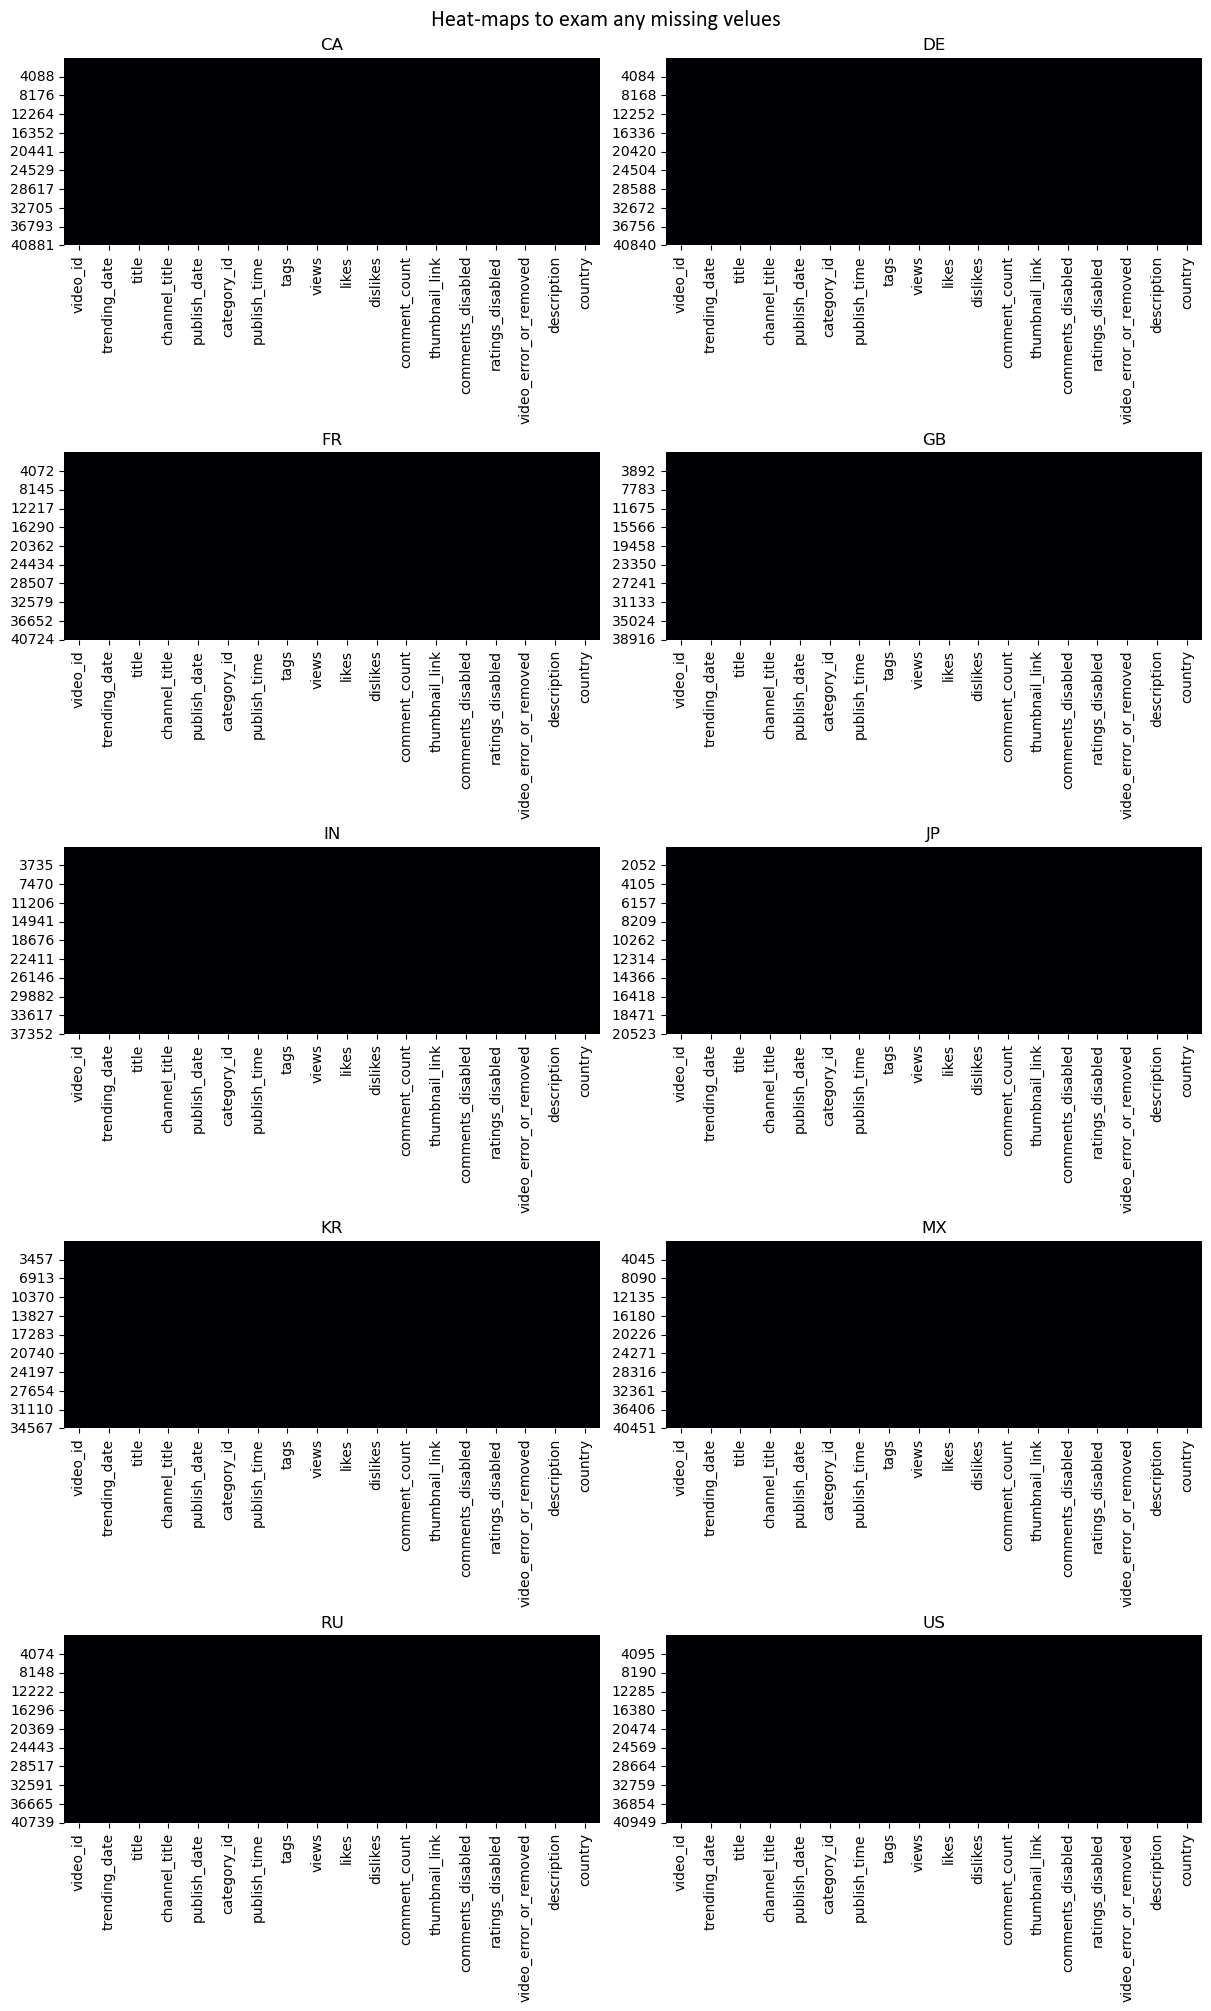

In [9]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(all_DataFrames) / 2)),
    figsize=(12,(h := 20)),
    layout='constrained'
)
row = col = 0
for df in all_DataFrames:
    sns.heatmap(
        data=df.isnull(),
        ax=(new_ax := axs[row][col]),
        cbar=False,
        cmap="magma"
        )
    new_ax.set_title(str(df.loc[0, "country"]))
    
    height_inch = fig.get_size_inches()[1]
    max_value = df.shape[0]
    step = max_value / height_inch * 2
    yticks = np.arange(max_value, 0, -step)
    new_ax.set_yticks(yticks)
    new_ax.set_yticklabels(np.round(yticks).astype(int))

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Heat-maps to exam any missing velues", size=16, font="Calibri")
plt.show()

As evidenced by the heatmaps, there are no missing values in the datasets. 
Missing values can significantly impact the reliability of statistically significant results in research; therefore, addressing these gaps - <i>either by <strong>filling</strong> them or <strong>removing</strong> them from the dataset</i> - is a crucial first step in the research preparation process.

Accordingly, we can proceed with further analysis.

## 1.6 Concatenation all tables into One

To calculate overall metrics across all datasets of the available countries, it is necessary to merge them into a single consolidated DataFrame.

In [10]:
general_df = pd.concat(all_DataFrames)
display(general_df.sample(3))

video_id trending_date  \
26113  wAQ7autd61g    2018-03-26   
10915  DnIog8oZ32s    2018-01-12   
14564  j1gRVOCJT_I    2018-01-27   

                                                   title      channel_title  \
26113  The Final Countdown - Europe (Vintage Cabaret ...  PostmodernJukebox   
10915  वज़न घटाने के लिए सुबह की 6 आदतें | 6 Miracle M...           TsMadaan   
14564    EP2S8 - Le feuilleton Bon Appétit #3 - Bonneval    Bon Appetit Ski   

      publish_date category_id publish_time  \
26113   2018-03-15          10     17:36:12   
10915   2018-01-10          26     13:38:08   
14564   2018-01-26          17     16:30:36   

                                                    tags   views  likes  \
26113  the final countdown|"gunhild carling"|"europe"...  491961  16979   
10915  miracle morning|"success"|"weight loss"|"life"...   26861   1206   
14564  Bon appetit"|"congelo"|"fabien maierhofer"|"vi...   22808   1064   

       dislikes  comment_count  \
26113       429            738   
10915        44            218   
14564         8             41   

                                       thumbnail_link comments_disabled  \
26113  https://i.ytimg.com/vi/wAQ7autd61g/default.jpg             False   
10915  https://i.ytimg.com/vi/DnIog8oZ32s/default.jpg             False   
14564  https://i.ytimg.com/vi/j1gRVOCJT_I/default.jpg             False   

      ratings_disabled video_error_or_removed  \
26113            False                  False   
10915            False                  False   
14564            False                  False   

                                             description country  
26113  Postmodern Jukebox vintage cover of The Final ...      US  
10915  In our busy life, we don't take out time for o...      IN  
14564  Et voici le 3ème opus du feuilleton Bon App, o...      FR

Due to potential manipulations of the consolidated DataFrame, we have to create a backup to preserve it as the original dataset.  

To perform this, I used the ```copy``` module and its ```deepcopy``` method.

In [11]:
print(general_df["video_id"].nunique() == general_df["video_id"].size)

False


Strangely, the supposed unique index for the videos (```video_id```) is duplicated. Let's investigate why this is happening.

In [12]:
display(general_df[general_df["video_id"].duplicated(keep=False)].sort_values(by="video_id", ascending=True).iloc[:5])

video_id trending_date  \
3449    #NAME?    2017-12-01   
13126   #NAME?    2018-01-20   
6215    #NAME?    2018-03-15   
19847   #NAME?    2018-03-03   
22342   #NAME?    2018-03-29   

                                                   title      channel_title  \
3449                               СтопХам - Мисс Ноябрь            StopXam   
13126  ¡Ya apareció el celular de Danna Paola! | Vent...        Ventaneando   
6215                       クレーンゲーム1000円対決【のえのん＋ほのぼの＋はちゅ】           なないろちゅーぶ   
19847  FIRST BENCHERS vs LAST BENCHERS (EXAM PREPARAT...  Hyderabad Diaries   
22342  sbs cnbc “거래가 뚝 끊겼어요”집값 떨어질 것” 주택가격 심리지수 8ㆍ2대책...              도봉박홍기   

      publish_date category_id publish_time  \
3449    2017-11-29           2     10:23:58   
13126   2018-01-19          24     23:10:57   
6215    2018-03-14          22     02:39:25   
19847   2018-03-02          24     09:51:05   
22342   2018-03-27          25     17:24:22   

                                                    tags   views  likes  \
3449   Стопхам|"стопхам"|"стоп хам"|"stopxam"|"stop"|...  583133  18490   
13126  ventaneando|"tv azteca"|"azteca trece"|"azteca...   20807    127   
6215                クレーンゲーム|"のえのん"|"ほのぼの"|"1000円対決"|"姉妹"   27960      0   
19847  Hyderabad|"hyderabad diaries"|"shahrukh k adna...  107810   9679   
22342                                             [none]   56263   2246   

       dislikes  comment_count  \
3449       2117           3186   
13126        19             28   
6215          0            136   
19847       408           1158   
22342       119             63   

                                       thumbnail_link comments_disabled  \
3449   https://i.ytimg.com/vi/-Luvvm2fpFw/default.jpg             False   
13126  https://i.ytimg.com/vi/-n0EyI41jPk/default.jpg             False   
6215   https://i.ytimg.com/vi/-k46ssFMGmM/default.jpg             False   
19847  https://i.ytimg.com/vi/-Xm_XWpAXOI/default.jpg             False   
22342  https://i.ytimg.com/vi/-H-MSgdQmY0/default.jpg             False   

      ratings_disabled video_error_or_removed  \
3449             False                  False   
13126            False                  False   
6215              True                  False   
19847            False                  False   
22342            False                  False   

                                             description country  
3449   Бесплатный курс по криптовалютам - http://go.t...      RU  
13126  La actriz causó revuelo en redes sociales cuan...      MX  
6215   のえのん ちゃん ほのぼの ちゃん とのコラボ動画はいっぱいあるよ！！\nブルーム【Bloo...      JP  
19847  SUBSCRIBE! New Videos Every week!\nSecond Chan...      IN  
22342  우리 은행  (대동포럼)    박 홍기       후원계좌 1005 - 203 - ...      KR

In [13]:
display(general_df[general_df["video_id"].duplicated(keep=False)].sort_values(by="video_id", ascending=False).iloc[:5])

video_id trending_date                                  title  \
1444  zzyGHbhCpV4    2018-02-15  【平昌五輪】「モルゲッソヨ」前に集合ー！ テレビじゃ流せない韓国珍名所ｗｗ   
1600  zzyGHbhCpV4    2018-02-16  【平昌五輪】「モルゲッソヨ」前に集合ー！ テレビじゃ流せない韓国珍名所ｗｗ   
1360  zzyGHbhCpV4    2018-02-15  【平昌五輪】「モルゲッソヨ」前に集合ー！ テレビじゃ流せない韓国珍名所ｗｗ   
2603  zzu-ytbHGR8    2017-11-27  Ультимативно не растерялся - [Бумага]   
2843  zzu-ytbHGR8    2017-11-28  Ультимативно не растерялся - [Бумага]   

          channel_title publish_date category_id publish_time  \
1444  KAZUYA CHANNEL GX   2018-02-15          25     09:00:03   
1600  KAZUYA CHANNEL GX   2018-02-15          25     09:00:03   
1360  KAZUYA CHANNEL GX   2018-02-15          25     09:00:03   
2603        Мартеллиада   2017-11-26          23     09:42:49   
2843        Мартеллиада   2017-11-26          23     09:42:49   

                                                   tags   views  likes  \
1444  KAZUYA|"KAZUYA Channel"|"KCGX"|"カズヤ"|"カズヤチャンネル...    3413    172   
1600  KAZUYA|"KAZUYA Channel"|"KCGX"|"カズヤ"|"カズヤチャンネル...    9760    233   
1360  KAZUYA|"KAZUYA Channel"|"KCGX"|"カズヤ"|"カズヤチャンネル...    3413    172   
2603  Гера Мартелл|"Мартеллиада"|"Бумага"|"Мультик"|...  276587  31699   
2843  Гера Мартелл|"Мартеллиада"|"Бумага"|"Мультик"|...  379805  36882   

      dislikes  comment_count                                  thumbnail_link  \
1444         4             70  https://i.ytimg.com/vi/zzyGHbhCpV4/default.jpg   
1600        10             87  https://i.ytimg.com/vi/zzyGHbhCpV4/default.jpg   
1360         4             70  https://i.ytimg.com/vi/zzyGHbhCpV4/default.jpg   
2603       681           1605  https://i.ytimg.com/vi/zzu-ytbHGR8/default.jpg   
2843       880           1883  https://i.ytimg.com/vi/zzu-ytbHGR8/default.jpg   

     comments_disabled ratings_disabled video_error_or_removed  \
1444             False            False                  False   
1600             False            False                  False   
1360             False            False                  False   
2603             False            False                  False   
2843             False            False                  False   

                                            description country  
1444  ※2018年2月14日のKCGX生放送より\n\n＜毎週水曜夜9時は　YouTuber KA...      JP  
1600  ※2018年2月14日のKCGX生放送より\n\n＜毎週水曜夜9時は　YouTuber KA...      JP  
1360  ※2018年2月14日のKCGX生放送より\n\n＜毎週水曜夜9時は　YouTuber KA...      JP  
2603  Выбери квартиру на новый год https://goo.gl/k6...      RU  
2843  Выбери квартиру на новый год https://goo.gl/k6...      RU

Based on the samples, it is evident that some videos lack an ID, which is unusual since, as far as I know, YouTube assigns an ID to every video. It might be due to the deletion of videos that remained in the sample but couldn't fetch the ID from the original database during data updates. However, I might be mistaken as I am not very familiar with YouTube's architecture.

Duplicate videos with IDs may be due to the repeated inclusion of the same video in the trending list. These videos might have been removed according to moderation algorithms, possibly due to artificial view inflation to appear in the trending list.

I propose removing duplicates (keeping only the first occurrence of a video in the trends) and videos without IDs to adjust the sample accordingly.

In [14]:
for i in range(len(all_DataFrames)):
    all_DataFrames[i].drop(index=all_DataFrames[i].loc[all_DataFrames[i]["video_id"] == "#NAME?"].index, inplace=True)
    all_DataFrames[i].drop_duplicates(subset="video_id", keep="first", inplace=True)
general_df = pd.concat(all_DataFrames)

## 1.7 Creating general backup

In [15]:
# making copy of the original DataFrame
backup_df = copy.deepcopy(general_df)

# sorting according to latest trending date while removing duplicates
general_df.sort_values(
    by="trending_date",
    ascending=False,
    inplace=True
)
# general_df.drop_duplicates(
#     subset="video_id", 
#     keep="first", 
#     inplace=True
# )
display(general_df.iloc[0:4][["publish_date", "publish_time", "trending_date", "country"]])

publish_date publish_time trending_date country
40766   2018-06-13     09:00:06    2018-06-14      US
20434   2018-06-13     03:47:24    2018-06-14      JP
20409   2018-06-13     16:38:16    2018-06-14      JP
20410   2018-06-13     12:00:11    2018-06-14      JP

In [16]:
print(general_df["video_id"].nunique() == general_df["video_id"].size)

False


After cleaning each sample of duplicates, there are still duplicate videos in the overall dataset.  
These are likely videos that appeared in the trending lists of multiple countries. Let's verify this."

In [17]:
display(general_df[general_df["video_id"]
                   .duplicated(keep=False)]
                   .sort_values(
                       by="video_id", 
                       ascending=True)
                    .iloc[:10]
                    [["video_id", "country", "trending_date", "publish_date", "publish_time", "title"]])

video_id country trending_date publish_date publish_time  \
40319  --45ws7CEN0      CA    2018-06-12   2018-06-12     03:11:18   
40271  --45ws7CEN0      RU    2018-06-12   2018-06-12     03:11:18   
39972  --45ws7CEN0      MX    2018-06-12   2018-06-12     03:11:18   
28534  --7vNbh4UNA      CA    2018-04-14   2018-04-13     19:00:00   
28646  --7vNbh4UNA      DE    2018-04-14   2018-04-13     19:00:00   
16297  --I0aj8MUdU      FR    2018-02-05   2018-02-04     13:19:38   
16251  --I0aj8MUdU      DE    2018-02-05   2018-02-04     13:19:38   
37828  --MtKsH5oBY      FR    2018-05-31   2018-05-31     12:40:46   
37976  --MtKsH5oBY      DE    2018-05-31   2018-05-31     12:40:46   
38277  --MtKsH5oBY      CA    2018-06-01   2018-05-31     12:40:46   

                                                   title  
40319             PlayStation E3 2018 Showcase | English  
40271             PlayStation E3 2018 Showcase | English  
39972             PlayStation E3 2018 Showcase | English  
28534  Responding to ALL The Outrage, Ridiculous H3H3...  
28646  Responding to ALL The Outrage, Ridiculous H3H3...  
16297  E diela shqiptare - Ka nje mesazh per ty - Pje...  
16251  E diela shqiptare - Ka nje mesazh per ty - Pje...  
37828  صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...  
37976  صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...  
38277  صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...

The assumption was correct.  
Indeed, videos that appeared in the trending lists of different countries were duplicated in the overall dataset.  
Let's determine the percentage of such videos relative to the total number to inform further decision-making.

In [18]:
print(round(
        (((general_df[general_df["video_id"].duplicated(keep=False)]["video_id"].size) / (general_df["video_id"].size))*100), 
        2), 
    "%", sep="")

17.68%


On one hand, the percentage of duplicates is quite significant, over $17\%$, which is nearly one-fifth.  
However, when analyzing data by country, it is more convenient to refer to the overall DataFrame grouped by country rather than iterating through the list.

Therefore, it has been decided to retain the current duplicates for further analysis.

## 1.8 Adding data from JSON files

It is important to note that the database also contains files in JSON format.  
Let's import these files for analysis.

In [19]:
# collect all json files
path = Path(os.getcwd()) / "data"
all_JSON_list = [i for i in glob.glob(str(path / "*.{}".format("json")))]
all_JSON_list

['f:\\Study projects\\YouTube trends\\data\\CA_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\DE_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\FR_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\GB_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\IN_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\JP_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\KR_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\MX_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\RU_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\US_category_id.json']

In [20]:
all_JSON = dict()
for json_file in all_JSON_list:
    df = pd.read_json(json_file)
    current_country = json_file[(x := (json_file.rfind('\\', 0, json_file.rfind("."))) + 1) : x + 2]
    all_JSON[current_country] = df

# return one of the random JSON-file
display(all_JSON["US"].head())

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...

Let's check the items

In [21]:
counter = 0
for i in all_JSON["CA"]["items"]:
    print(i)
    if counter == 5: break
    else: counter += 1

{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM1XVQ9zbGec"', 'id': '17', 'snippet': {'channelId': 'UC

In [22]:
counter = 0
for i in all_JSON["US"]["items"]:
    print(i)
    if counter == 5: break
    else: counter += 1

{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec"', 'id': '17', 'snippet': {'channelId': 'UC

In [23]:
for i, v in all_JSON["US"]["items"][0].items():
    print(i, v, sep=" : ")

kind : youtube#videoCategory
etag : "m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"
id : 1
snippet : {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}


In [24]:
print(all_JSON["US"]["items"][0]["kind"] == all_JSON["CA"]["items"][0]["kind"])
print(all_JSON["US"]["items"][0]["etag"] == all_JSON["CA"]["items"][0]["etag"])
print(all_JSON["US"]["items"][0]["id"] == all_JSON["CA"]["items"][0]["id"])
print(all_JSON["US"]["items"][0]["snippet"] == all_JSON["CA"]["items"][0]["snippet"])

True
False
True
True


As shown in the results above, all JSON files contain the same information about the rank of each video (from 1 to 44) and its category (```title```).

Based on this, we can add a category column for each video to facilitate more convenient analysis.

In [25]:
category_id = dict()
for cat in next(iter(all_JSON.values()))["items"]:
    category_id[cat["id"]] = cat["snippet"]["title"]

general_df.insert(
    loc=2,
    column="category",
    value=general_df["category_id"].map(category_id)
)

backup_df.insert(
    loc=2,
    column="category",
    value=backup_df["category_id"].map(category_id)
)

In [26]:
# add the categories to each separated DataFrame of countries
for i in range(len(all_DataFrames)):
    all_DataFrames[i].insert(
        loc=2,
        column="category",
        value=all_DataFrames[i]["category_id"].map(category_id)
    )

In [27]:
display(general_df.loc[:,["video_id", "category", "category_id", "title", "channel_title"]].sample(3))

video_id       category category_id  \
27193  x5tQNTuoWhQ          Music          10   
4067   58y7WhhWFLg  Entertainment          24   
7484   FXhPZw_bLGA  Entertainment          24   

                                                   title  \
27193                  Booba - Gotham [(official audio)]   
4067                              麦とホップ 「だけがいい人・CMメイキング」   
7484   [아라시/嵐] 정신 바짝 안차리면 사쿠라이 함정에 빠질 각 (feat. 치바인의 도...   

               channel_title  
27193           Merveil Mevo  
4067   サッポロビール （Sapporobeer）  
7484                      벚꽃

This was the final preparatory step.  
We can now proceed to the main tasks.

---
# <center>2. Views</center>
<center><img src='images/views.jpg' width=1000, heigth=1000></center>

## 2.1 Key Performance Indicators

Let's examine the <strong>maximum</strong>, <strong>minimum</strong>, <strong>average</strong> and <strong>median</strong> values for the views of the trending videos.  

The data is presented in tabular format.

In [28]:
def format_number(num):
    return f"{num:,}".replace(",", " ")

In [29]:
table_descriptive_values = {
    "Country": ["General"],
    "max": [general_df["views"].max()],
    "min": [general_df["views"].min()],
    "avg": [round(general_df["views"].mean(), 2)],
    "median": [general_df["views"].median()]
}

for df in all_DataFrames:
    table_descriptive_values["Country"].append(df.loc[0, "country"])
    table_descriptive_values["max"].append(df["views"].max())
    table_descriptive_values["min"].append(df["views"].min())
    table_descriptive_values["avg"].append(round(df["views"].mean(), 2))
    table_descriptive_values["median"].append(df["views"].median())

# Let's format the numbers by separating their digits with spaces to make them easier to read.
columns_list = ["max", "min", "avg", "median"]
table_descriptive_values = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in table_descriptive_values.items()}

print(tabulate.tabulate(
    tabular_data=table_descriptive_values, 
    headers="keys", 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

╒═══════════╤═════════════╤═══════╤══════════════╤═══════════╕
│ Country   │ max         │ min   │ avg          │ median    │
╞═══════════╪═════════════╪═══════╪══════════════╪═══════════╡
│ General   │ 143 408 235 │ 117   │ 300 425.73   │ 76 022.0  │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ CA        │ 39 349 927  │ 733   │ 486 051.9    │ 220 670.0 │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ DE        │ 39 349 927  │ 518   │ 322 728.14   │ 71 399.0  │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ FR        │ 39 349 927  │ 223   │ 238 751.58   │ 44 780.0  │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ GB        │ 143 408 235 │ 851   │ 1 292 004.13 │ 278 824.5 │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ IN        │ 37 736 281  │ 4 024 │ 397 797.4    │ 151 487.5 │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ JP        │ 62 796 390  │ 798   │ 193 026.22   │ 44 8

Unfortunately, I am unsure of a more convenient way to display a DataFrame or dictionary with large numbers.  
I considered adding spaces between the digits to improve readability, but as seen from the table, the numeric types are converted to strings since we use the f-string in the ```format_number``` function.

Notably, there is a significant difference between the average and median values, which likely indicates a right-skewed distribution (positive skewness). There may also be outliers, which we will analyze further.

Additionally, there are some interesting minimum values not exceeding 200 views. These values are intriguing in terms of how such videos might have made it to the YouTube trending list. Let’s examine which videos these are and their respective categories.

In [30]:
def grouping_by_country_min_views(df: pd.DataFrame) -> pd.Series:
    return df.sort_values(by="views", ascending=True)[["category", "views", "channel_title", "title", "publish_date", "trending_date"]].iloc[0]

grouped_by_country_min_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_min_views, include_groups=False).reset_index()
display(grouped_by_country_min_views)

country         category  views     channel_title  \
0      CA    Entertainment    733          mart lat   
1      DE           Sports    518   VfL BOCHUM 1848   
2      FR    Entertainment    223       okaminaTv 4   
3      GB  News & Politics    851  That's Surrey TV   
4      IN    Entertainment   4024          Zee Yuva   
5      JP    Entertainment    798         HarkSouls   
6      KR   People & Blogs   2050              락캐스트   
7      MX           Sports    157        Ascenso MX   
8      RU   People & Blogs    117     Нвлнй Хло 2.0   
9      US  News & Politics    549             Newsy   

                                               title publish_date  \
0          ''Gala Artis 2018'' Le numéro d'ouverture   2018-05-14   
1  Die Pressekonferenz vor der Partie 1. FC Heide...   2018-02-15   
2  Laurent Baffie - Best of des vannes #105 [inédit]   2018-02-15   
3  Mountain Bikers Worried About Military Land Be...   2017-11-27   
4  Baapmanus - बापमाणूस - Episode 118  - May 01, ...   2018-04-30   
5                          180301 永井先生 兄弟雑談／ダサいダウンの件   2018-03-02   
6                                    소셜 잠금화면 앱 (달고나)   2017-11-17   
7        RESUMEN CELAYA VS ALEBRIJES ASCENSO MX 2017   2017-11-26   
8  Навальный сдулся. Знали ли об этом его активис...   2018-01-29   
9   1 dead, others injured after Ky. school shooting   2018-01-23   

  trending_date  
0    2018-05-14  
1    2018-02-15  
2    2018-02-15  
3    2017-12-01  
4    2018-05-01  
5    2018-03-02  
6    2017-11-19  
7    2017-11-26  
8    2018-01-29  
9    2018-01-26

As can be seen from the results above, the categories of videos with the lowest view counts that made it to the trending lists vary significantly, though entertainment videos dominate. However, we will analyze the likelihood of different categories appearing in the trends later.  

It is also worth noting that most of the videos listed above have the same publication date and trending date on YouTube. In other words, channel owners might have insights into YouTube's algorithms, or this could be a rare anomaly in the algorithms' operation.

Also, returning to the table with the metrics, it is noticeable that the highest view counts, both in terms of maximum and average values, belong to the UK trends. This is quite interesting considering that the population of the UK ([69 million people](https://countrymeters.info/en/United_Kingdom_(UK))) is significantly lower than that of the USA ([341 million people](https://countrymeters.info/en/United_States_of_America_(USA))) or India ([almost 1.5 billion people](https://countrymeters.info/en/India)).

## 2.2 Testing for Normality

Let's check if our distribution of views follows a <strong>normal distribution</strong>.

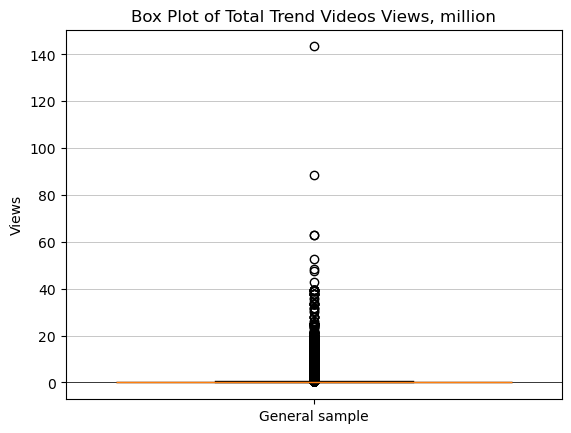

In [31]:
plt.boxplot((sample := (general_df["views"].to_numpy()/1_000_000)),
            labels=["General sample"],
            notch=False,
            vert=True,
            whis=1.5,
            widths=0.8,
            patch_artist=True)
plt.title("Box Plot of Total Trend Videos Views, million")
plt.ylabel("Views")
plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(False)
plt.gca().yaxis.grid(True, linestyle="-", linewidth=0.5)
# plt.grid(True)
plt.show()

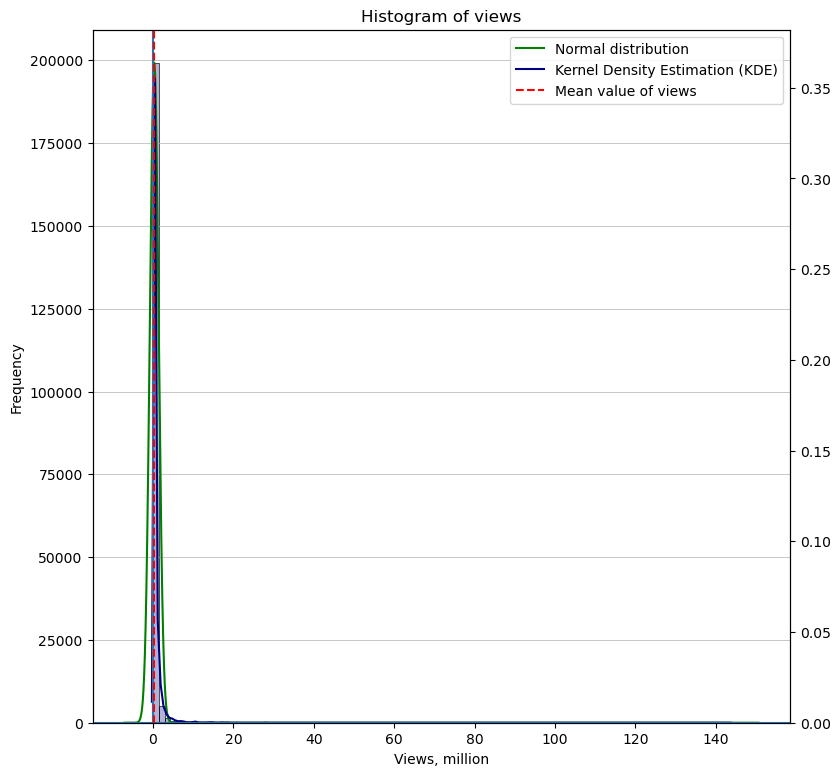

In [32]:
mean_views, sd_views, n_views = (np.mean(sample), 
               np.std(sample, ddof=1), 
               len(sample))

fig, ax = plt.subplots(figsize=(9,9))
sns.histplot(sample, 
             ax=ax, 
             kde=False,
             color="navy",
             alpha=0.3,
             edgecolor="black",
             bins=100)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, n_views)
p_y = stats.norm.pdf(x, loc=mean_views, scale=sd_views)
ax1 = ax.twinx()
ax1.plot(x, p_y, color="green", label="Normal distribution")

sns.kdeplot(sample, ax=ax1, fill=False, color="navy", label="Kernel Density Estimation (KDE)")

ax.set_xlabel("Views, million")
ax.set_ylabel("Frequency")
ax.axhline(True, color='black', linewidth=0.5)
ax.yaxis.grid(True, linestyle='-', linewidth=0.5)
ax.xaxis.grid(False)

ax1.set_ylabel(None)
ax1.axhline(False)
ax1.axvline(False)
ax1.yaxis.grid(False)
ax1.xaxis.grid(False)

plt.axvline(x=mean_views, color="red", linestyle="--", label="Mean value of views")

plt.title(f"Histogram of views")
plt.legend()
plt.show()

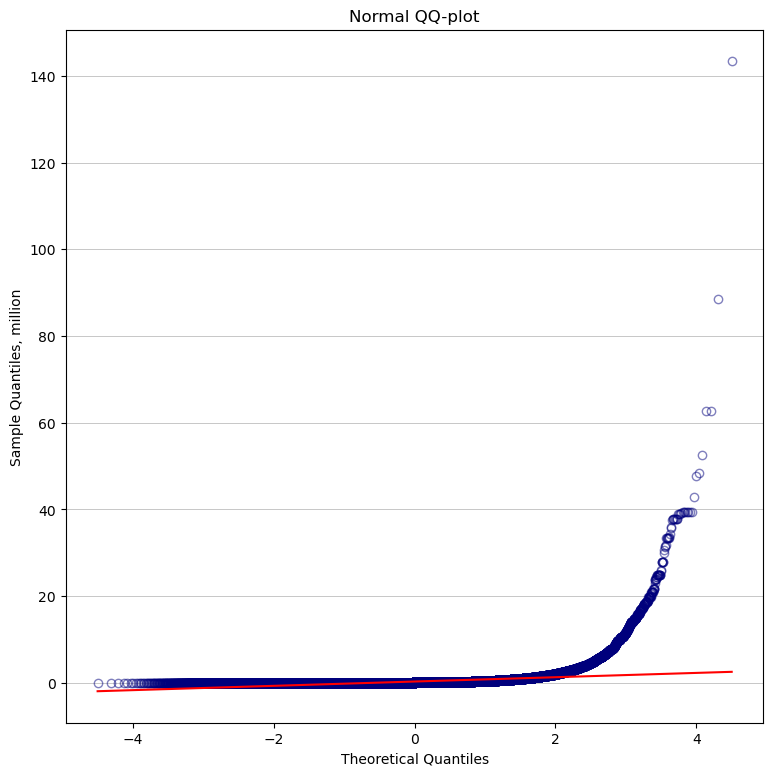

In [33]:
fig, ax = plt.subplots(figsize=(9, 9))
stats.probplot(sample, plot=ax, dist="norm")

ax.set_title("Normal QQ-plot")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles, million")
ax.yaxis.grid(True, linestyle="-", linewidth=0.5)
ax.xaxis.grid(False)

line = ax.get_lines()[0]
line.set_marker("o")
line.set_markersize(6)
line.set_markerfacecolor("none")
line.set_markeredgecolor((0, 0, 124/255, 0.5))

# plt.grid(False)
plt.show()

As seen from the histogram of view frequencies (in millions) and the QQ-plot, the sample indeed contains significant outliers, with some videos having view counts that are markedly different from the average number of views for all trending videos in the 2017-2018 period.  

I suggest examining the graphs by truncating the data to 1 million views, as beyond this threshold, clear outliers are visible, reaching up to 140 million views.

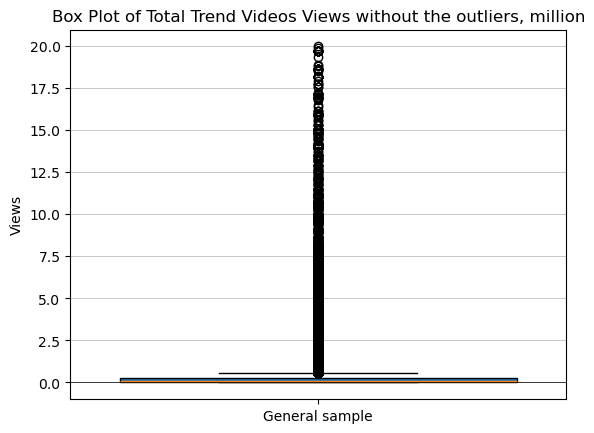

In [34]:
plt.boxplot((sample1 := (general_df[general_df["views"] <= 20_000_000]["views"].to_numpy()/1_000_000)),
            labels=["General sample"],
            notch=False,
            vert=True,
            whis=1.5,
            widths=0.8,
            patch_artist=True)
plt.title("Box Plot of Total Trend Videos Views without the outliers, million")
plt.ylabel("Views")
plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(False)
plt.gca().yaxis.grid(True, linestyle="-", linewidth=0.5)
# plt.grid(True)
plt.show()

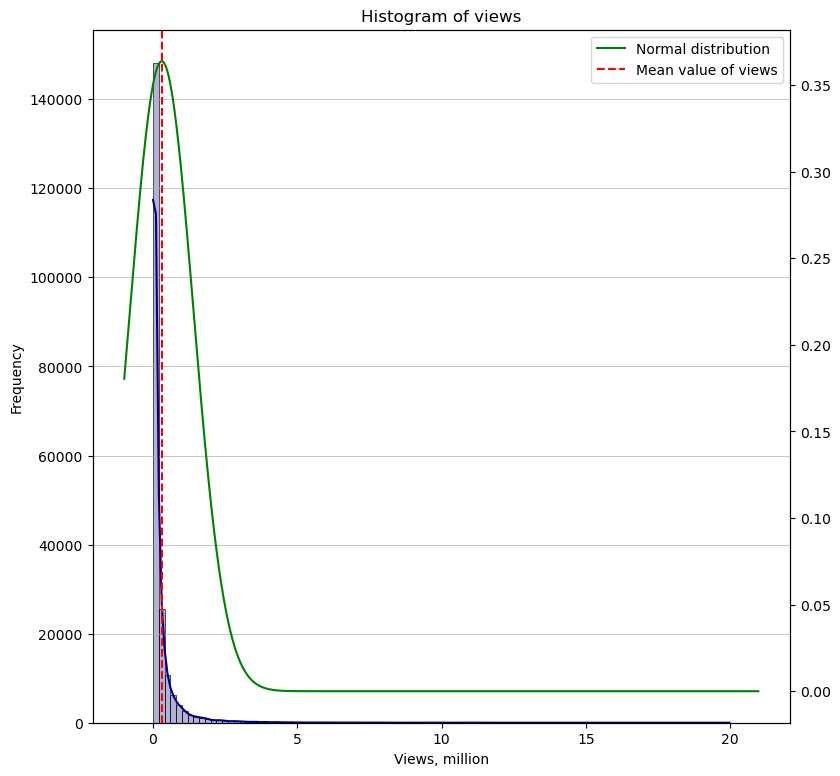

In [35]:
mean_views1, sd_views1, n_views1 = (np.mean(sample1), 
               np.std(sample1, ddof=1), 
               len(sample1))

fig, ax = plt.subplots(figsize=(9,9))
sns.histplot(sample1, 
             ax=ax, 
             kde=True,
             color="navy",
             alpha=0.3,
             edgecolor="black",
             bins=100)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, n_views)
p_y = stats.norm.pdf(x, loc=mean_views, scale=sd_views)
ax1 = ax.twinx()
ax1.plot(x, p_y, color="green", label="Normal distribution")

# sns.kdeplot(sample, ax=ax1, fill=False, color="navy", label="Kernel Density Estimation (KDE)")

ax.set_xlabel("Views, million")
ax.set_ylabel("Frequency")
ax.axhline(True, color='black', linewidth=0.5)
ax.yaxis.grid(True, linestyle='-', linewidth=0.5)
ax.xaxis.grid(False)

ax1.grid(False)

plt.axvline(x=mean_views, color="red", linestyle="--", label="Mean value of views")

plt.title(f"Histogram of views")
plt.legend()
plt.show()

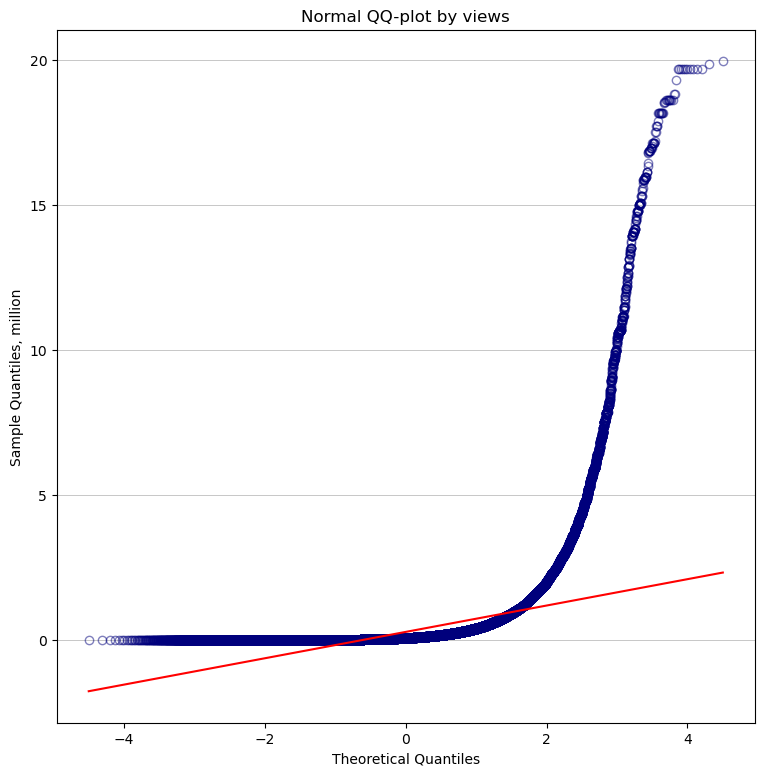

In [36]:
fig, ax = plt.subplots(figsize=(9, 9))
stats.probplot(sample1, plot=ax, dist="norm")

ax.set_title("Normal QQ-plot by views")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles, million")
ax.yaxis.grid(True, linestyle="-", linewidth=0.5)
ax.xaxis.grid(False)

line = ax.get_lines()[0]
line.set_marker("o")
line.set_markersize(6)
line.set_markerfacecolor("none")
line.set_markeredgecolor((0, 0, 124/255, 0.5))

# plt.grid(False)
plt.show()

As evident from the updated graphs, the distribution of views is far from normal. The mean is approximately zero, and for a normal distribution, data below zero would be necessary, which is not possible for view counts. There is a clear asymmetry with the presence of unimodality.  

To assess the normality of the distribution, it would be logical to perform the <strong><u>Shapiro-Wilk test</u></strong>. By default, the alpha value is set to 0.05 ($\alpha = 0.05$), and the null hypothesis of this test indicates that the distribution is normal.

In [37]:
stats_views, p_v_views = stats.shapiro(sample)
print("The results of the Shapiro-Wilk test")
print(f"statistic = {stats_views:.4f}, p-value = {p_v_views:.10f}")

The results of the Shapiro-Wilk test
statistic = 0.2054, p-value = 0.0000000000


c:\Users\User\Anaconda\envs\mainenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 207143.
  res = hypotest_fun_out(*samples, **kwds)


Due to the large number of observations in the sample, the interpreter returns an error related to the 5,000-observation limit (current number of observations is 207,143). However, the returned value indicates that the current distribution is likely non-normal.

Given the presence of outliers, it is important to apply a non-parametric alternative to the t-test, such as the <strong><u>Mann-Whitney U-test</u></strong>. This test will convert all our data into a ranking scale and is less affected by outliers. But this one used only for two samples (which are with outliers).

I suggest examining the QQ-plots for each country.  
To ensure that none of our data truly follows a normal distribution.

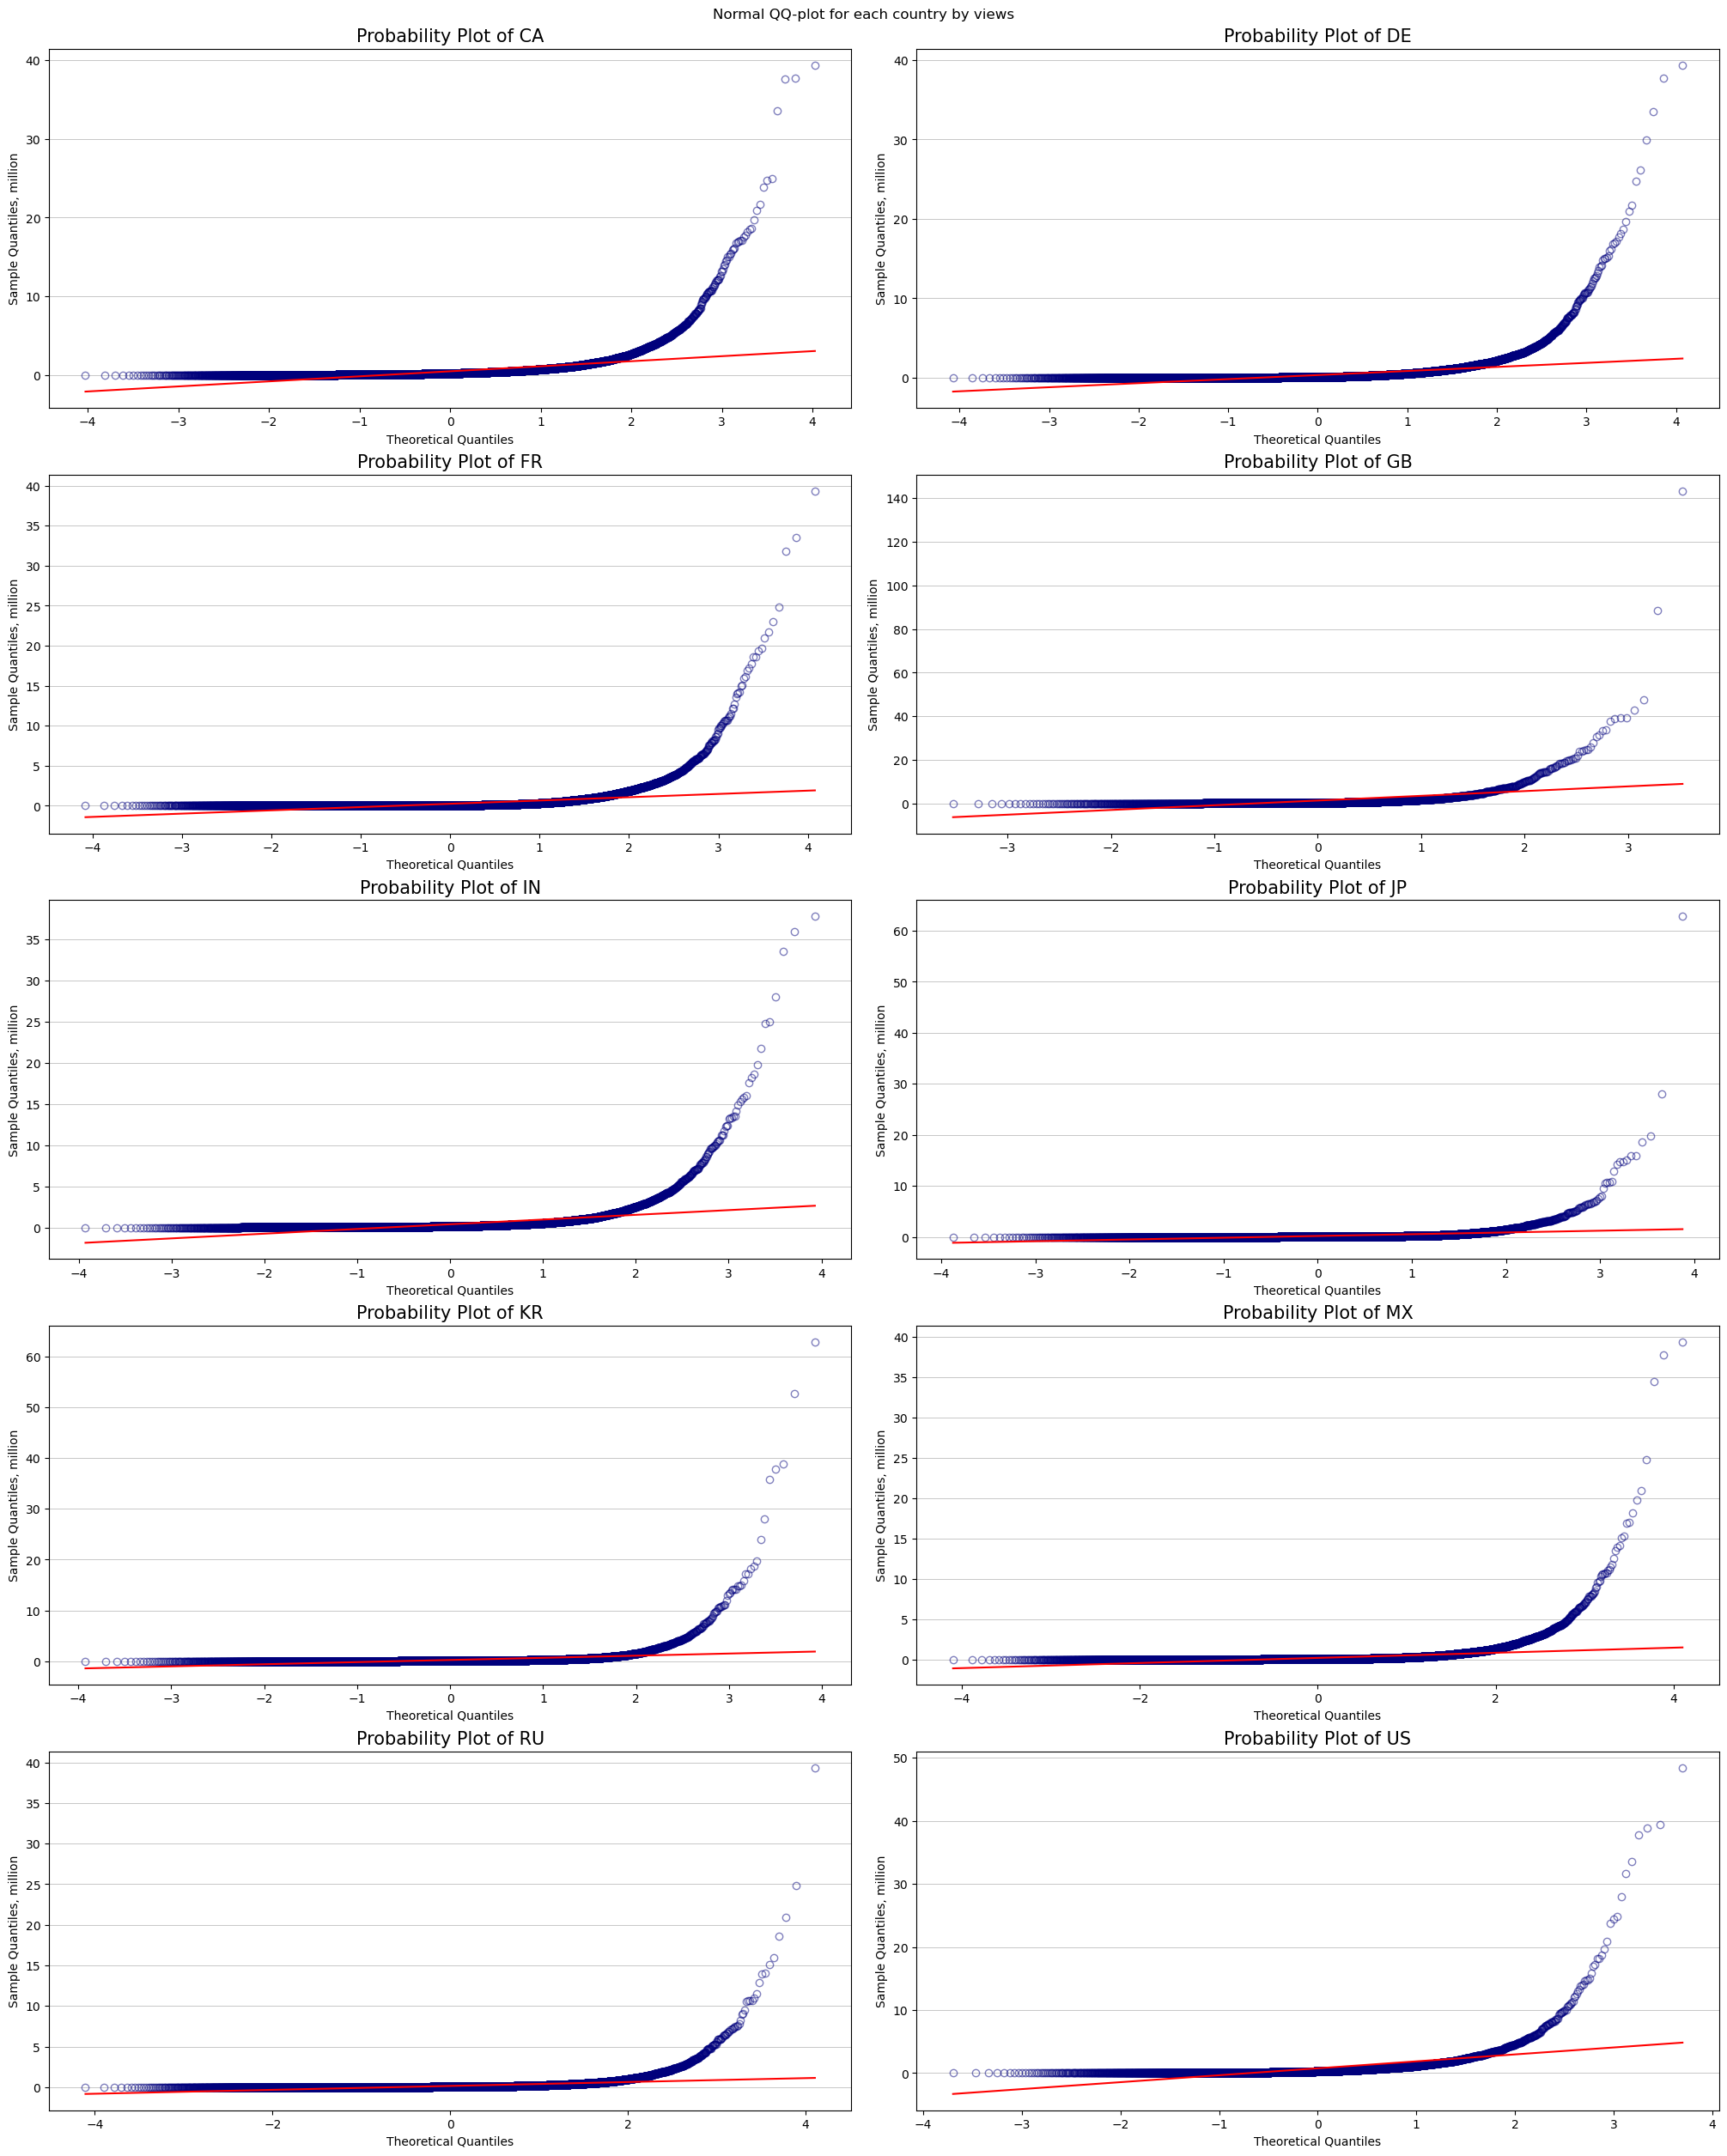

In [38]:
def grouping_by_country_array_of_views(df: pd.DataFrame) -> np.array:
    return df["views"].to_numpy() / 1_000_000
grouped_by_country_array_of_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_array_of_views, include_groups=False).reset_index()
grouped_by_country_array_of_views.columns = ("country", "Views")
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(grouped_by_country_array_of_views.shape[0] / 2)),
    figsize=(20, 25),
    layout="constrained"
)

row = col = 0
for index, rows in grouped_by_country_array_of_views.iterrows():
    stats.probplot(rows["Views"], plot=(new_ax := axs[row][col]), dist="norm")
    
    new_ax.set_title(f"Probability Plot of {rows["country"]}", size=15)
    new_ax.set_xlabel("Theoretical Quantiles")
    new_ax.set_ylabel("Sample Quantiles, million")
    new_ax.yaxis.grid(True, linestyle="-", linewidth=0.5)
    new_ax.xaxis.grid(False)

    line = new_ax.get_lines()[0]
    line.set_marker("o")
    line.set_markersize(6)
    line.set_markerfacecolor("none")
    line.set_markeredgecolor((0, 0, 124/255, 0.5))

    if col == 1:
        row += 1; col = 0
    else:
        col += 1


fig.suptitle("Normal QQ-plot for each country by views")
plt.show()

Yes, indeed, outliers are present in each sample, indicating the presence of extreme high values of the parameter (<i>views</i>), which are very uncommon in a normal distribution.

Well, now we have confirmed this for further analysis.

## 2.3 The most popular trends

Therefore, I suggest examining which categories users prefer based on their frequency in the trending videos sample (both overall and for each country separately). Let’s create a histogram of the frequencies by category.

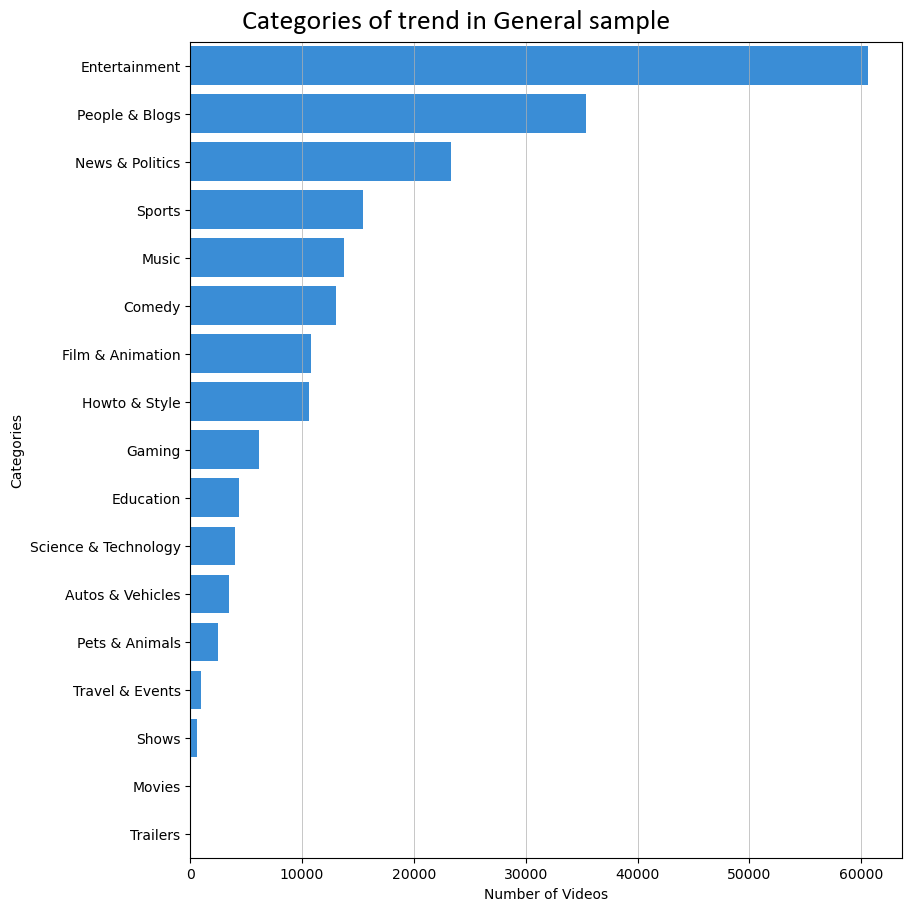

In [39]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df.
      groupby(by="category", as_index=False)
      .agg(Numbers=("category", "count"))
      .rename(columns={"category": "Category"}))
df.sort_values(by="Numbers", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Numbers",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#3A8DD6",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Number of Videos")
axs.xaxis.grid(True, linestyle='-', linewidth=0.5)
axs.yaxis.grid(False)

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Categories of trend in General sample", size=20, font="Calibri")
plt.show()

As can be observed from the hist above, most trending videos fall into the Entertainment category, followed by People & Blogs in the second position.  
However, the third position is occupied by the Politics & News category.  

Based on this, it can be inferred that YouTube is primarily used by users for relaxation and entertainment, but also for staying informed about current political and other news-related events.

Let's check it for each country

In [40]:
def grouping_by_country_videos_number(df: pd.DataFrame) -> dict:
    df = df.groupby(by="category", as_index=False).agg(count=("category", "size"))
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["count"]
    return our_dict

grouped_by_country_videos_number = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_videos_number, include_groups=False).reset_index()
grouped_by_country_videos_number.columns = ("country", "dict")
display(grouped_by_country_videos_number)

country                                               dict
0      CA  {'Autos & Vehicles': 248, 'Comedy': 1946, 'Edu...
1      DE  {'Autos & Vehicles': 674, 'Comedy': 1756, 'Edu...
2      FR  {'Autos & Vehicles': 591, 'Comedy': 2597, 'Edu...
3      GB  {'Autos & Vehicles': 14, 'Comedy': 204, 'Educa...
4      IN  {'Autos & Vehicles': 33, 'Comedy': 1116, 'Educ...
5      JP  {'Autos & Vehicles': 211, 'Comedy': 402, 'Educ...
6      KR  {'Autos & Vehicles': 65, 'Comedy': 829, 'Educa...
7      MX  {'Autos & Vehicles': 220, 'Comedy': 1290, 'Edu...
8      RU  {'Autos & Vehicles': 1349, 'Comedy': 2350, 'Ed...
9      US  {'Autos & Vehicles': 70, 'Comedy': 547, 'Educa...

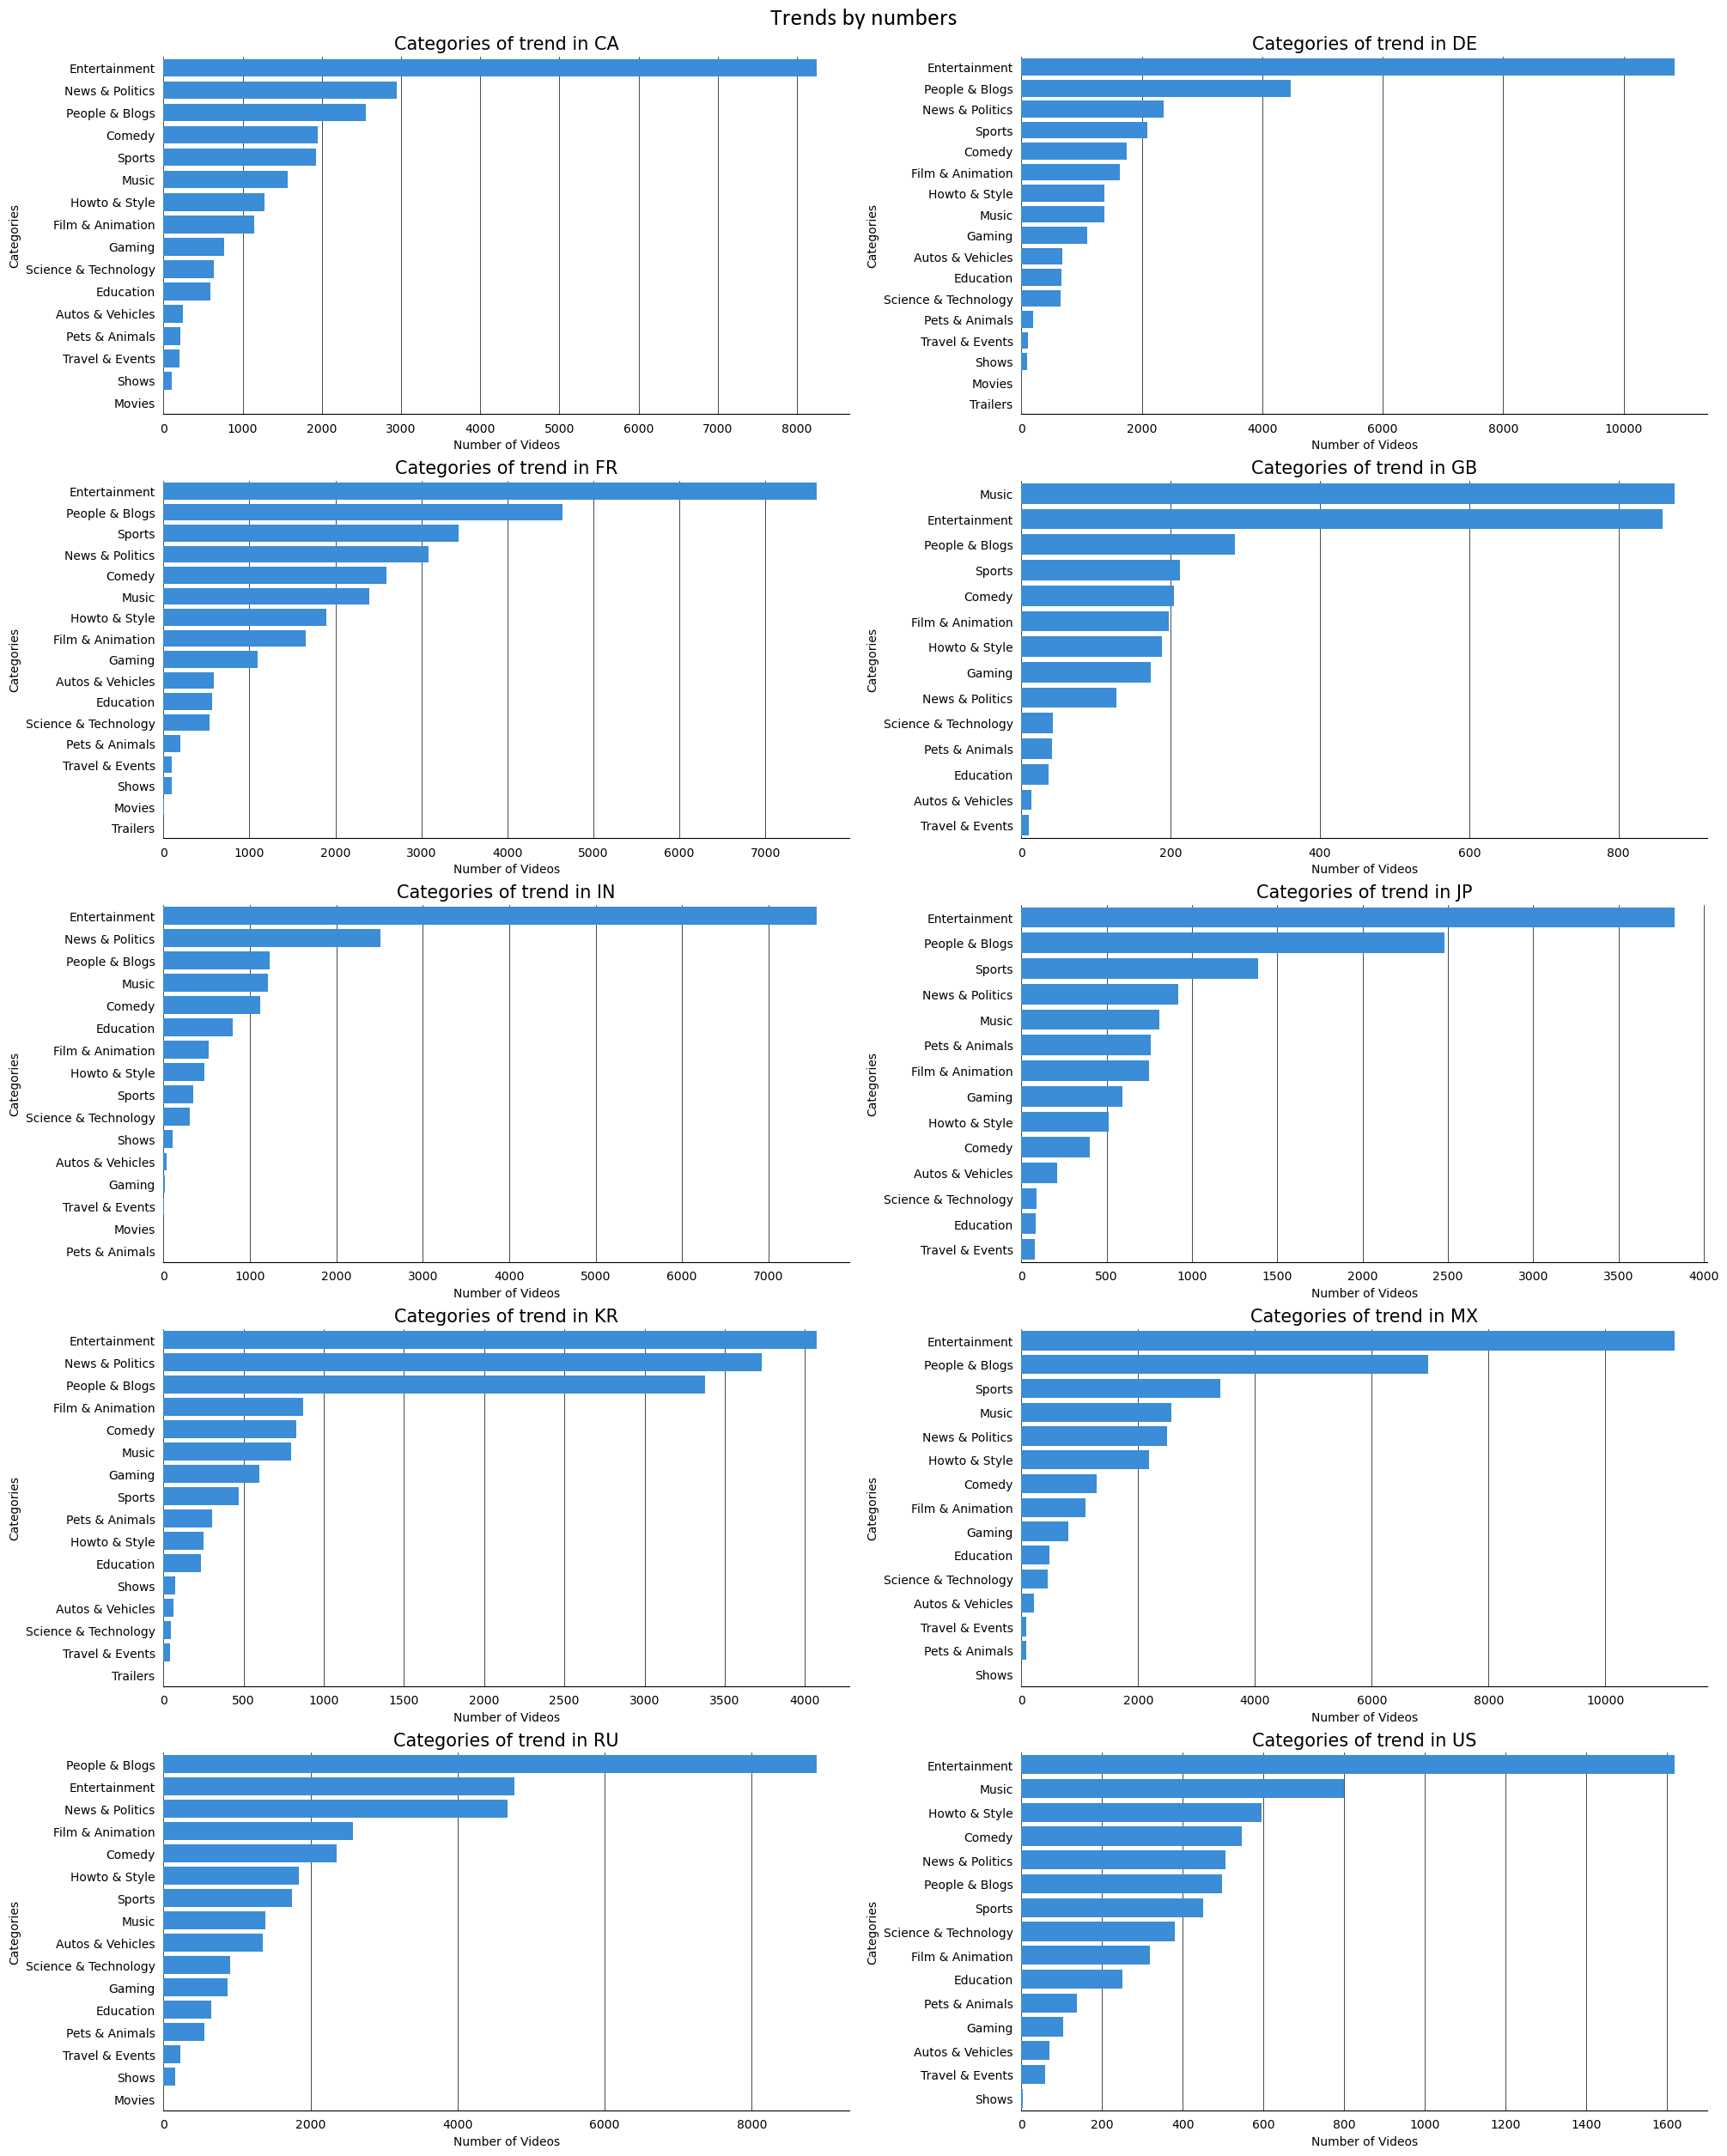

In [41]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_country_videos_number) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_country_videos_number.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Numbers"])
    df.sort_values(by="Numbers", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Numbers",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#3A8DD6",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Number of Videos")
    new_ax.xaxis.grid(True, linestyle='-', linewidth=0.5)
    new_ax.yaxis.grid(False)

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by numbers", size=20, font="Calibri")
plt.show()

Based on the country-specific analysis, it is evident that the overall sample reflects the trends seen in each individual country. However, South Korea shows a notable interest in both Entertainment and Politics & News, which may indicate a high level of public anxiety.

In 2018, a summit between Kim Jong-un and Moon Jae-in took place, marking the first inter-Korean summit in over a decade. During the meeting, declarations were signed concerning peace efforts, improved relations, and the denuclearization of the Korean Peninsula.

Additionally, in September of the same year, a second summit was held in Pyongyang. This summit focused on continuing denuclearization efforts and improving inter-Korean relations. Leaders also signed agreements on joint economic projects and humanitarian aid.

Furthermore, the trade deal with the U.S. should be considered: in October 2018, South Korea and the U.S. updated their free trade agreement (KORUS FTA). This agreement addressed various trade issues and reflected both parties' commitment to strengthening economic ties.

Besides political events, South Korea hosted the Winter Olympics in PyeongChang in February 2018. This event was significant for the country, showcasing its organizational capabilities. The Olympics also served as a platform for rapprochement between North and South Korea, with a delegation from North Korea participating and joint events being held. Although the Sports category does not stand out prominently among the categories mentioned above, the Winter Olympics could have also featured in the news category.

## 2.4 The most popular videos

But what about the most popular videos? Again, in terms of views.  

Let’s look at the most popular videos, their categories, and the number of likes/dislikes they have.

In [42]:
columns_list = ["views", "likes", "dislikes"]
our_dict = {
    k: ([format_number(num) for num in v]) if k in columns_list else v 
    for k, v in (general_df.sort_values(by="views", ascending=False, inplace=False)
                            .iloc[:5][["category", "country", "views", "likes", "dislikes", "channel_title", "title"]]
                            .to_dict(orient="list").items())                                                                              
    }

print("Common the most popular videos")
print(tabulate.tabulate(our_dict, headers="keys", tablefmt="fancy_grid", stralign="left", numalign="right"))

Common the most popular videos
╒═══════════════╤═══════════╤═════════════╤═══════════╤════════════╤═══════════════════╤══════════════════════════════════════════════════════╕
│ category      │ country   │ views       │ likes     │ dislikes   │ channel_title     │ title                                                │
╞═══════════════╪═══════════╪═════════════╪═══════════╪════════════╪═══════════════════╪══════════════════════════════════════════════════════╡
│ Music         │ GB        │ 143 408 235 │ 2 686 169 │ 137 938    │ LuisFonsiVEVO     │ Luis Fonsi, Demi Lovato - Échame La Culpa            │
├───────────────┼───────────┼─────────────┼───────────┼────────────┼───────────────────┼──────────────────────────────────────────────────────┤
│ Music         │ GB        │ 88 568 646  │ 1 185 357 │ 99 361     │ BeckyGVEVO        │ Becky G, Natti Natasha - Sin Pijama (Official Video) │
├───────────────┼───────────┼─────────────┼───────────┼────────────┼───────────────────┼─────────────────

As we have previously observed, the highest number of views for trending videos comes from the United Kingdom, with a significant portion falling into the Music category. It appears that pop music is so catchy that people are willing to listen to it 143 million times."

Incidentally, these videos are indeed the outliers in the distribution of view counts.

In [43]:
def grouping_by_country_most_views(df: pd.DataFrame) -> dict:
    df["ranked"] = df["views"].rank(axis=0, method="dense", na_option="bottom", ascending=False)
    df = df.loc[df["ranked"] <= 5, ["category", "views", "likes", "dislikes", "channel_title", "title"]].sort_values(by="views", ascending=False)
    return df.to_dict(orient="list")

grouped_by_country_most_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_most_views, include_groups=False).reset_index()
grouped_by_country_most_views.columns=["country", "dict_of_views"]

In [44]:
for index, row in grouped_by_country_most_views.iterrows():
    our_dict = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in row["dict_of_views"].items()}
    print(row["country"])
    print(tabulate.tabulate(our_dict, headers="keys", tablefmt="fancy_grid", stralign="left", numalign="right"))

CA
╒═══════════════╤════════════╤═══════════╤════════════╤══════════════════════╤════════════════════════════════════════════════════════════════════╕
│ category      │ views      │ likes     │ dislikes   │ channel_title        │ title                                                              │
╞═══════════════╪════════════╪═══════════╪════════════╪══════════════════════╪════════════════════════════════════════════════════════════════════╡
│ Music         │ 39 349 927 │ 3 880 074 │ 72 707     │ ibighit              │ BTS (방탄소년단) 'FAKE LOVE' Official MV                           │
├───────────────┼────────────┼───────────┼────────────┼──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Entertainment │ 37 736 281 │ 1 735 931 │ 21 972     │ Marvel Entertainment │ Marvel Studios' Avengers: Infinity War Official Trailer            │
├───────────────┼────────────┼───────────┼────────────┼──────────────────────┼────────────────────────────────────

It can be observed that it is precisely music videos that gather the highest number of views.

I believe that when we analyze the categories by view counts, we will find that music videos receive the highest number of views, despite being significantly fewer in quantity compared to entertainment, news, or blog categories."

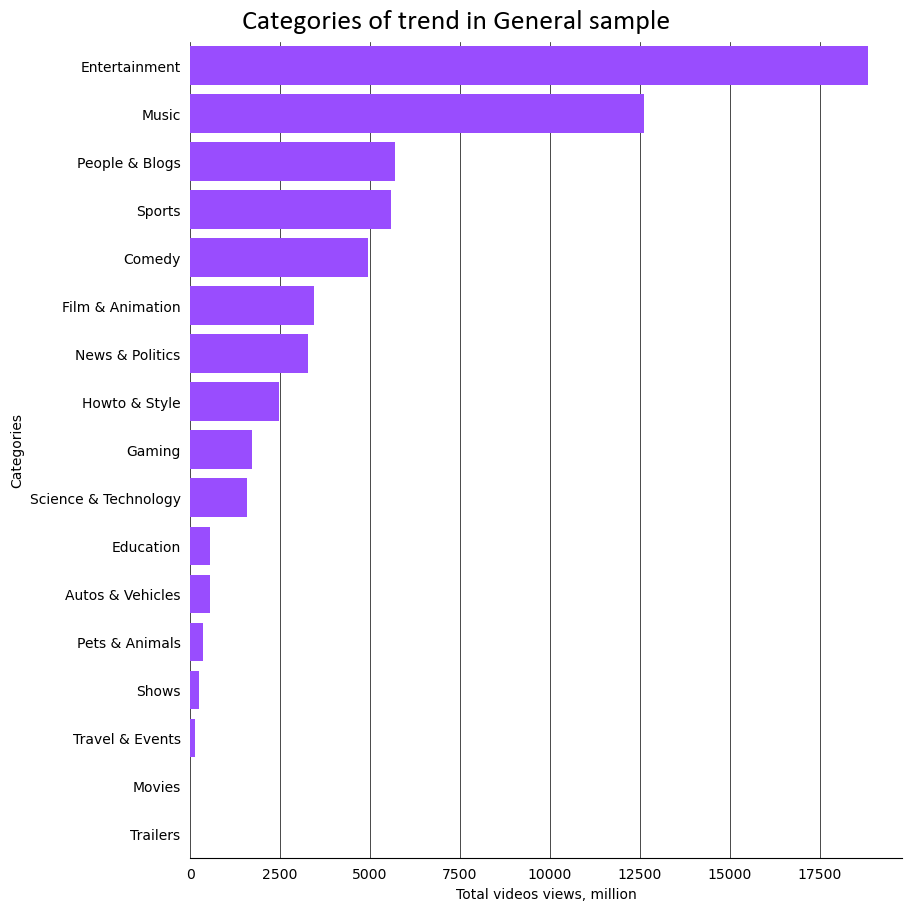

In [45]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df
      .groupby(by="category", as_index=False)
      .agg(Sum_of_views=("views", lambda x: x.sum() / 1_000_000))
      .rename(columns={"category": "Category"}))
df.sort_values(by="Sum_of_views", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Sum_of_views",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#994dfe",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Total videos views, million")
axs.xaxis.grid(True, linestyle='-', linewidth=0.5)
axs.yaxis.grid(False)

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Categories of trend in General sample", size=20, font="Calibri")
plt.show()

<strong>And yet, quantity surpassed quality</strong>.  
From the previous histogram ranking video categories by their number, there were about 60,000 entertainment videos and around 15,000 music videos in the overall dataset. This means there are approximately 4-5 entertainment videos for every music video.  

Despite music videos being more frequently among the most viewed, the total sum of views for music videos did not exceed that of entertainment videos.

Let's examine the situation by country.

In [46]:
def grouping_by_country_sum_of_views_million(df: pd.DataFrame) -> dict:
    df = df.groupby(by="category", as_index=False).agg(count=("views", lambda x: x.sum() / 1_000_000))
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["count"]
    return our_dict

grouped_by_country_sum_of_views_million = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_sum_of_views_million, include_groups=False).reset_index()
grouped_by_country_sum_of_views_million.columns = ("country", "dict")
display(grouped_by_country_sum_of_views_million)

country                                               dict
0      CA  {'Autos & Vehicles': 83.092413, 'Comedy': 1080...
1      DE  {'Autos & Vehicles': 110.358447, 'Comedy': 851...
2      FR  {'Autos & Vehicles': 31.031948, 'Comedy': 692....
3      GB  {'Autos & Vehicles': 8.987658, 'Comedy': 199.9...
4      IN  {'Autos & Vehicles': 6.297064, 'Comedy': 465.3...
5      JP  {'Autos & Vehicles': 10.478157, 'Comedy': 130....
6      KR  {'Autos & Vehicles': 4.903977, 'Comedy': 209.5...
7      MX  {'Autos & Vehicles': 24.074135, 'Comedy': 383....
8      RU  {'Autos & Vehicles': 230.168094, 'Comedy': 499...
9      US  {'Autos & Vehicles': 28.445164, 'Comedy': 422....

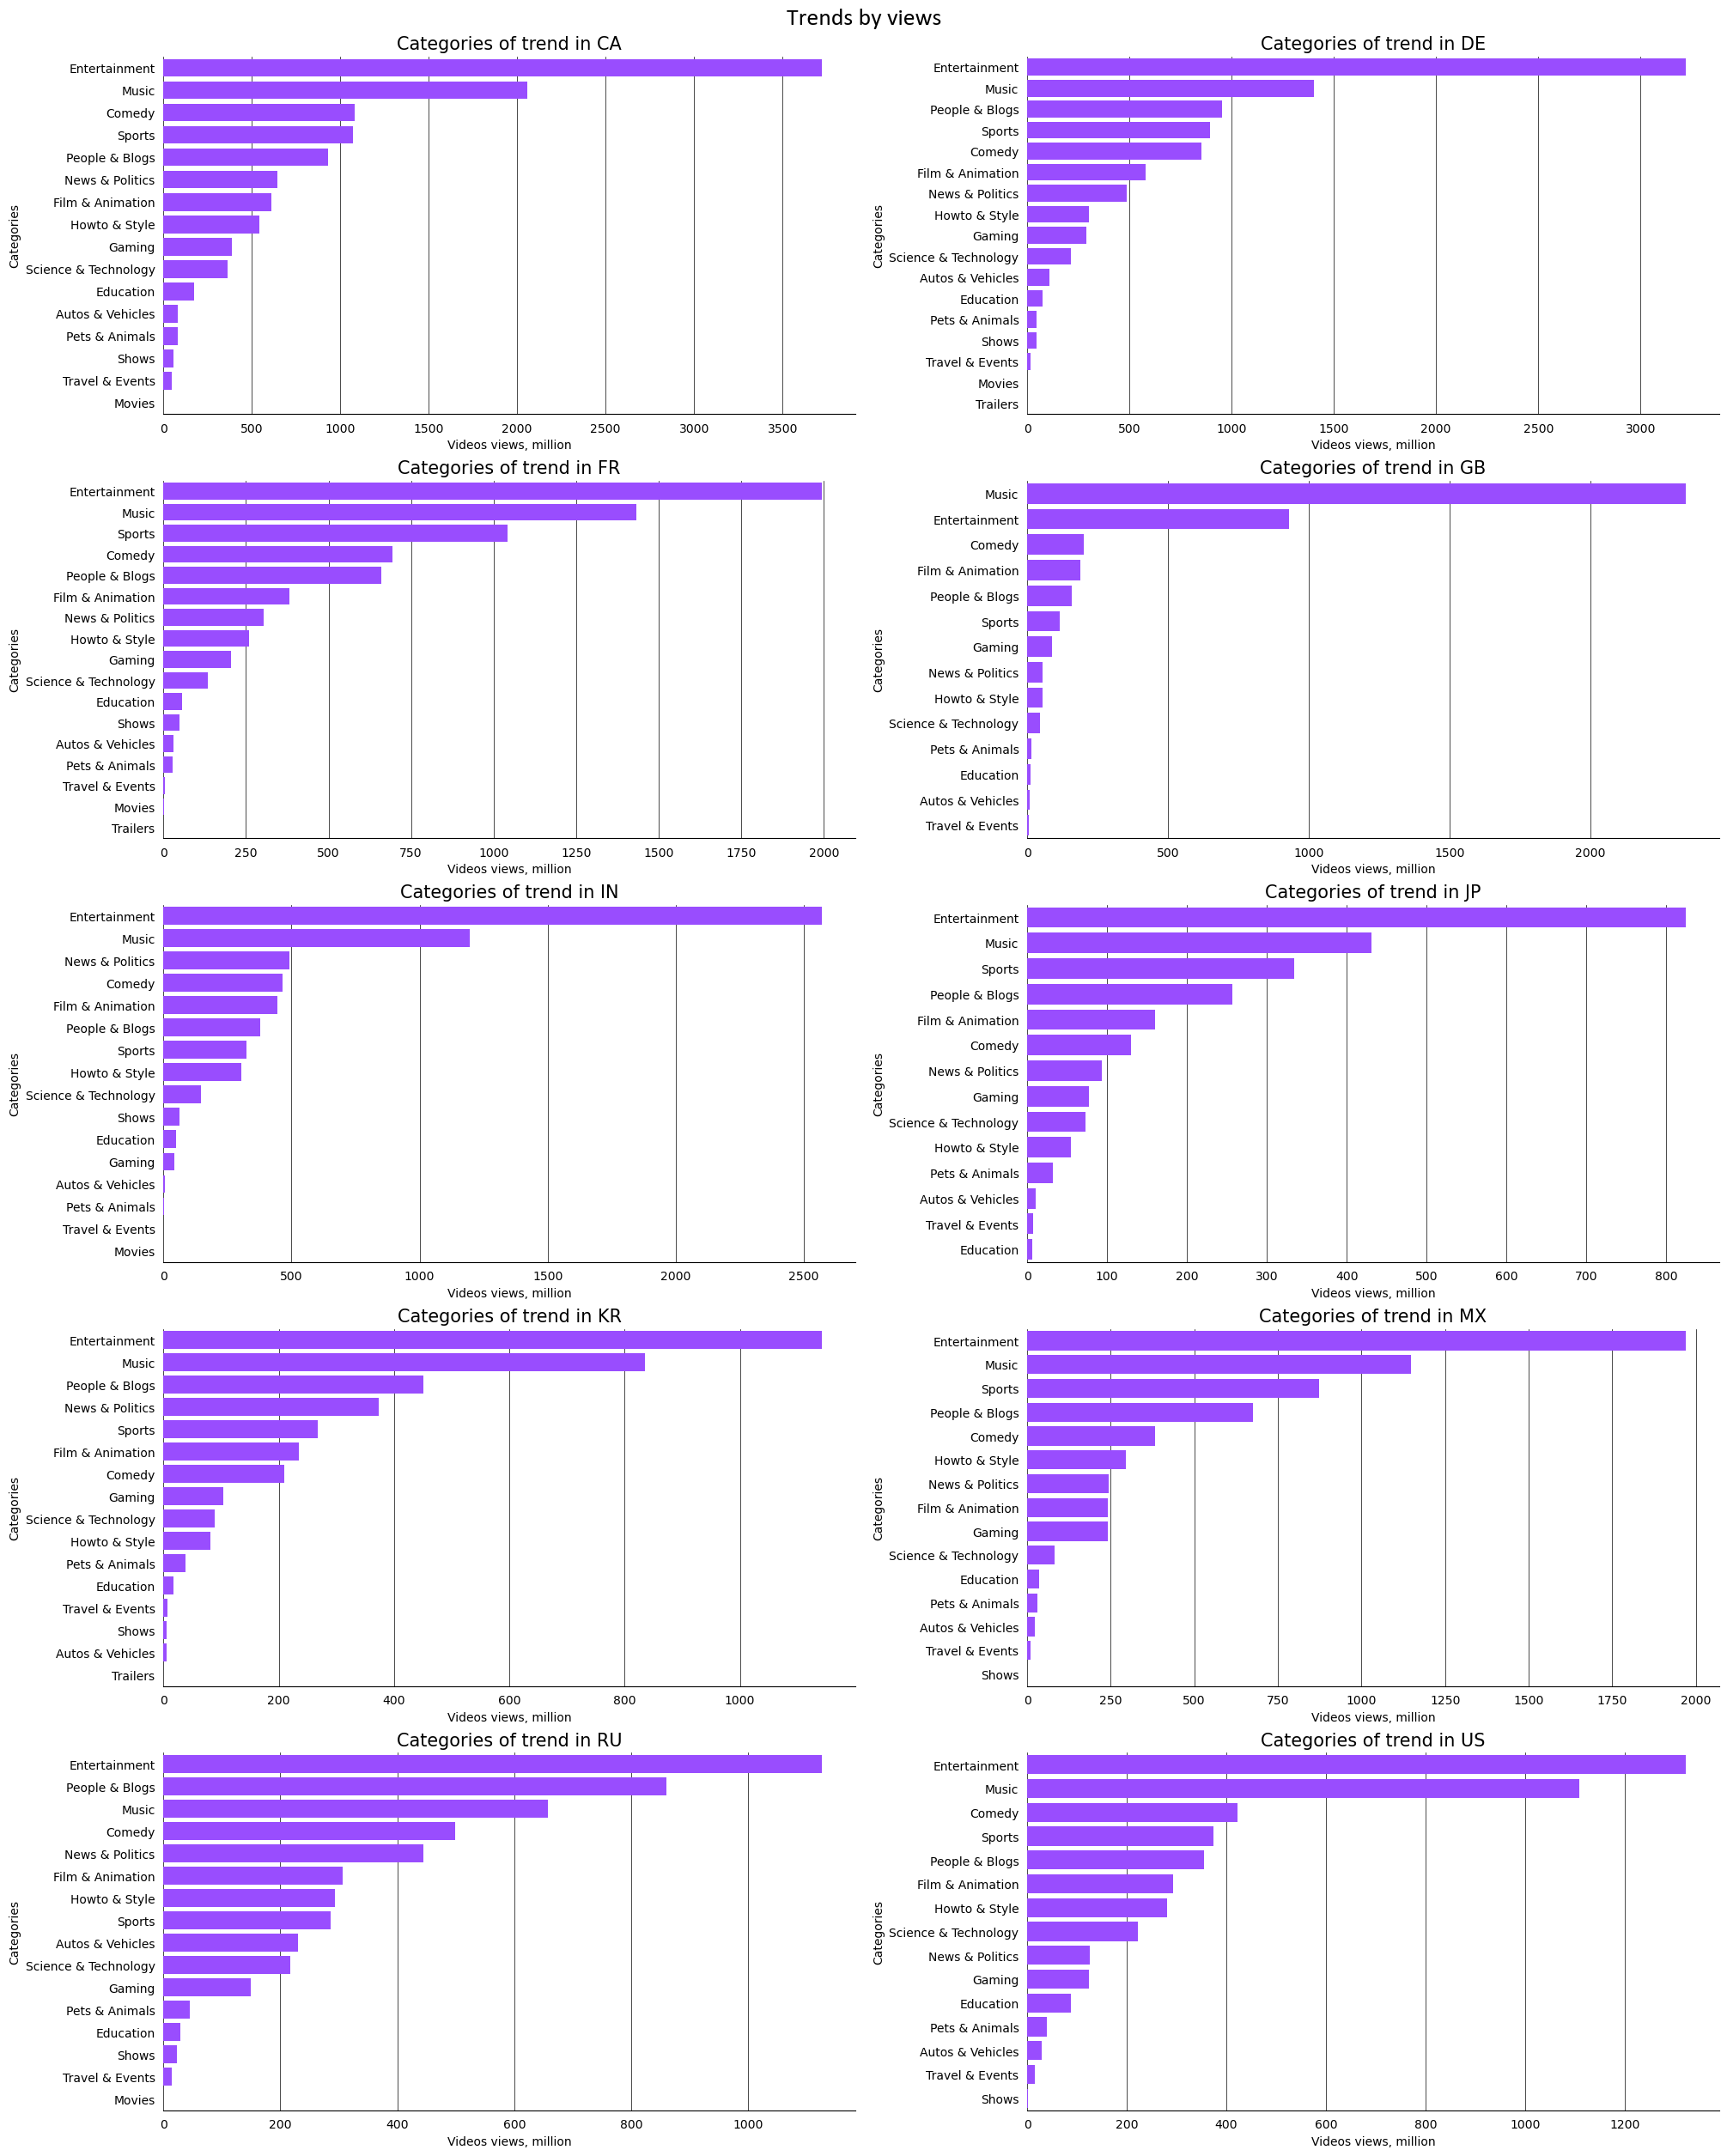

In [47]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_country_sum_of_views_million) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_country_sum_of_views_million.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Views"])
    df.sort_values(by="Views", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Views",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#994dfe",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Videos views, million")
    new_ax.xaxis.grid(True, linestyle='-', linewidth=0.5)
    new_ax.yaxis.grid(False)

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by views", size=20, font="Calibri")
plt.show()

It is worth noting that the most popular music videos by views appeared in the trending lists of the United Kingdom.  
In the UK, the Music category, in terms of total views, has surpassed the Entertainment category.  

This suggests that people in the UK truly enjoy amusement, or perhaps they have a well-developed musical taste.

## 2.5 One-Way ANOVA

We have a DataFrame with trending videos from different countries as well as from each country individually.  
I propose we use one-way ANOVA to determine if there is a statistically significant difference between the overall sample and the samples from individual countries through multiple comparisons. The parameter under study will be the number of views.  

Although we previously established that the distribution of the number of views in the overall sample is not normal, we can use the <strong><u>Mann-Whitney U test</u></strong>, a non-parametric alternative to the <strong>t-test</strong>, in the presence of outliers.

To begin with, given that we lack a normal distribution, we will use the Central Limit Theorem to detect differences between the mean of all sample means (by country) and the overall mean.

General mean value of views = 300 425.73
General sd of views = 1 096 662.23

Mean value of mean sample = 427 499.92
SE of mean sample = 354 045.61


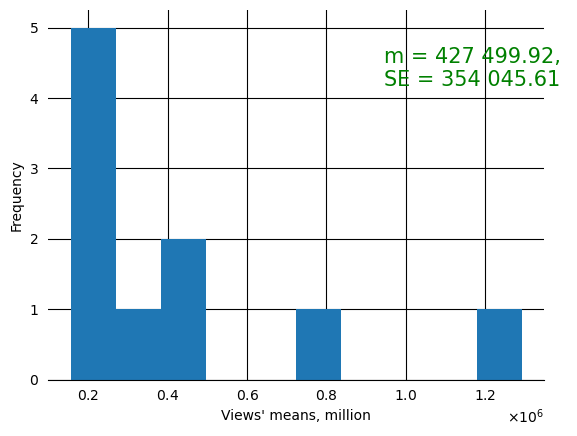

In [48]:
print(f"General mean value of views = {format_number(round(general_df["views"].mean(), 2))}")
print(f"General sd of views = {format_number(round(general_df["views"].std(ddof=1), 2))}", end="\n\n")

# at the past time views of each video was be devided by one million
# now let't take original numbers of views
def grouping_by_country_array_of_views(df: pd.DataFrame) -> np.array:
    return df["views"].to_numpy()
grouped_by_country_array_of_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_array_of_views, include_groups=False).reset_index()
grouped_by_country_array_of_views.columns = ("country", "views")

sample_of_means = [row["views"].mean() for index, row in grouped_by_country_array_of_views.iterrows()]
print(f"Mean value of mean sample = {(x1 := (format_number(round(np.mean(sample_of_means), 2))))}")
print(f"SE of mean sample = {(x2 := (format_number(round(np.std(sample_of_means, ddof=1), 2))))}")

plt.hist(sample_of_means)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.text(x=x_max * 0.7,
         y=y_max * 0.9,
         s=f"m = {x1}, \nSE = {x2}",
         verticalalignment="top",
         horizontalalignment="left",
         color="green",
         fontsize=15)
# plt.ticklabel_format(style="plain", axis="x")
plt.xlabel("Views' means, million")
plt.ylabel("Frequency")
plt.ticklabel_format(useMathText=True, axis="x")
plt.show()

Considering the possible values for the number of views, the sample mean does not differ significantly from the overall mean.  
However, the standard error of the mean is 354,045, which is quite large.  

I propose that, within the framework of the Central Limit Theorem, we assess the probability of obtaining a sample mean from the population mean (in our case, the mean of the overall sample).

Using formula:  

$
\displaystyle Z = \frac{\bar{x} - M}{SE}
$, where  

$Z$ - a number of standard deviations by which the sample mean deviates from the population mean,  
$SE$ - is the Standart Error of the mean,  
$\bar{x}$ - is a sample mean deviates

In [49]:
Z = ((np.mean(sample_of_means)) - (general_df["views"].mean())) / (np.std(sample_of_means, ddof=1))
print(round(Z, 2))

0.36


$\displaystyle
Z = \frac{\bar{x} - M}{sd} = \frac{\bar{x} - M}{SE} = \frac{427 \ 499.92 - 300 \ 425.73}{354 \ 045.61} = 0.36
$

In other words, the deviation of the sample mean from the overall mean is $0.36$ standard deviations.  
Let’s assess the probability of such an event.

In [50]:
p_value = 2 * stats.t.sf(Z, (len(sample_of_means)-1)) # two-way p-value is required
print(f"p-value = {p_value:.4f}")
print(f"Or {(p_value * 100):.2f}%")

p-value = 0.7279
Or 72.79%


In other words, the probability of obtaining the current sample mean from the overall mean is over 72%, which does not allow us to reject the null hypothesis that the sample mean represents the population mean, thereby supporting the notion that the samples come from the same population.

The use of the t-test within the Student's t-distribution is necessitated by the absence of a normal distribution for both the population and the samples, making the use of the ```stats.norm.cdf()``` formula incorrect.

Since this population was formed by merging samples from different countries, the result is quite expected.

However, let us analyze the samples by country within the framework of multiple comparison analysis.

This may help us identify statistically significant differences between two or more countries, which would provide a basis to assert that the average number of views for trending videos is influenced by region and country.

To do this, we will apply the <strong><u>Kruskal-Wallis non-parametric test</u></strong>, which is well-suited for multiple comparison analysis in the absence of normal distribution.

In [51]:
H_stat, p_value = stats.kruskal(*[row["views"] for index, row in grouped_by_country_array_of_views.iterrows()])
print(f"H-statistic = {H_stat:.2f}")
print(f"p-value = {p_value:.10f}")

H-statistic = 27137.62
p-value = 0.0000000000


The degrees of freedom in this case are determined as the number of samples minus 1:  
$\displaystyle
df = k - 1
$

In [52]:
chi2 = stats.chi2.ppf(1-.05, (x:=(grouped_by_country_array_of_views.shape[0] - 1)))
print(f"When df = {x}, and alpha = {0.05}, chi2 = {chi2:.2f}")

When df = 9, and alpha = 0.05, chi2 = 16.92


The value of the h-statistic exceeded ```27 thousand```. With the given parameters, the chi-square value is ```16.92```, and the obtained p-value is less than 0.05.  
Thus, we have sufficient grounds to reject the null hypothesis that all samples have similar means, which suggests that at least two of the samples have statistically significant differences.

Let's determine which specific countries have statistically significant differences.

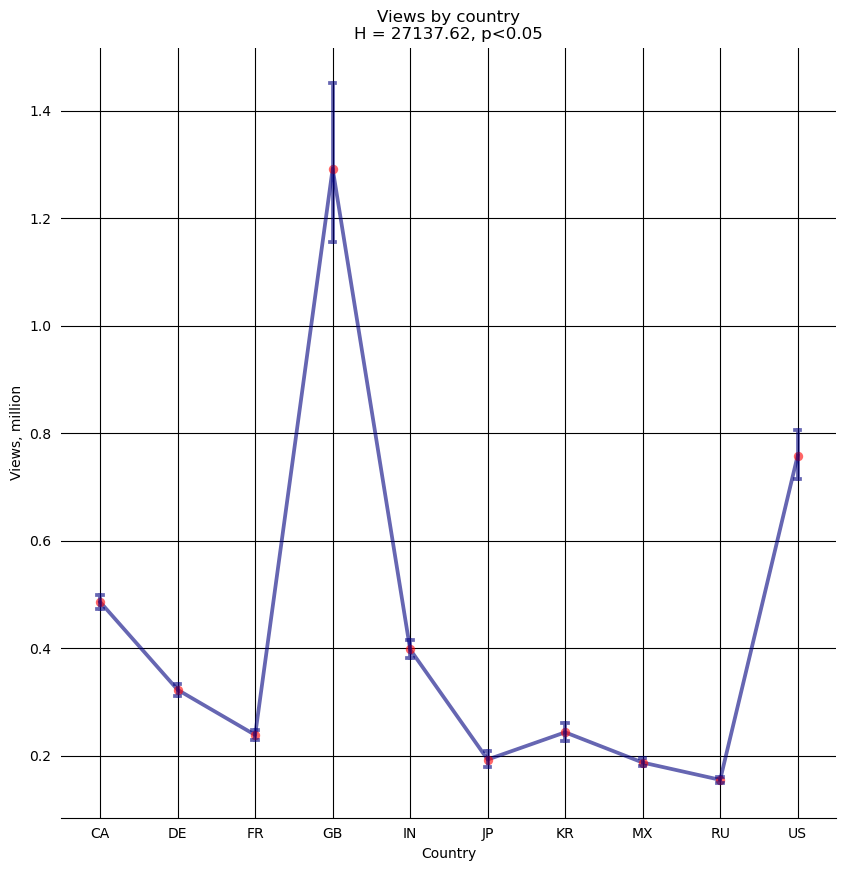

In [53]:
# add new column with reduced views by million
grouped_by_country_array_of_views["views_million"] = grouped_by_country_array_of_views["views"].apply(lambda x: x / 1_000_000)

plt.figure(figsize=(10, 10))
sns.pointplot(x="country", 
              y="views_million",
              data=grouped_by_country_array_of_views.explode("views_million"),
              errorbar=("ci", 95), 
              capsize=0.07,
              color="navy",
              alpha=0.6,
              mfc="red",
              mec="none",
              marker="o")
plt.grid(True)
plt.title(f"Views by country\nH = {H_stat:.2f}, p<0.05")
plt.xlabel("Country")
plt.ylabel("Views, million"),
plt.xticks(ticks=range(grouped_by_country_array_of_views.shape[0]), labels=[row["country"] for index, row in grouped_by_country_array_of_views.iterrows()])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The graph shows that only two groups of countries fall within the confidence intervals: France with South Korea, and Japan with Mexico. The remaining countries are too far apart from each other, which may indicate the presence of statistically significant differences between them.

I propose conducting pairwise tests. The formula for calculating pairwise comparisons is $10 * ((10-1) / 2) = 45$ pairwise comparisons.  
We will use the <strong><u>Mann-Whitney U test</u></strong> for this analysis.

In [54]:
result_table = {
    "pair_of_countries": list(),
    "Statistic": list(),
    "P-value": list()
}

for i in range(grouped_by_country_array_of_views.shape[0]):
    for j in range(i+1, grouped_by_country_array_of_views.shape[0]):
        U_stat, p_value = stats.mannwhitneyu(
            grouped_by_country_array_of_views.iloc[i]["views"], 
            grouped_by_country_array_of_views.iloc[j]["views"])
        result_table["pair_of_countries"].append(f"{grouped_by_country_array_of_views.iloc[i]["country"]} : {grouped_by_country_array_of_views.iloc[j]["country"]}")
        result_table["Statistic"].append(format_number(round(U_stat, 2)))
        result_table["P-value"].append(f"{p_value:.4f}")

print(tabulate.tabulate(
    tabular_data=result_table,
    headers="keys",
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

╒═════════════════════╤═══════════════╤═══════════╕
│ pair_of_countries   │ Statistic     │   P-value │
╞═════════════════════╪═══════════════╪═══════════╡
│ CA : DE             │ 487 690 303.5 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : FR             │ 557 703 164.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : GB             │ 35 505 926.0  │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : IN             │ 227 619 459.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : JP             │ 244 352 499.5 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : KR             │ 278 699 157.5 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : MX             │ 628 926 867.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : RU             │ 643 615 976.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : US   

Based on the analysis, we can conclude that our assumptions were correct, and statistically significant differences are present in almost all pairs, except for three countries: <strong>Japan</strong>, <strong>France</strong>, and <strong>Mexico</strong>. For these countries, we have a sufficiently high p-value to assert that these samples do not have statistically significant differences.

The percentage of such country pairs is $3/45 = 6\%$, leading us to conclude that the inclusion of a video in the trending list is indeed influenced by the country. In other words, it is easier to get into the trending list in Mexico, where videos typically need an average of around two hundred thousand views, compared to the United Kingdom.

However, we have only conducted an univariate analysis. Videos also have other parameters such as the number of likes and dislikes, comments, and the date and time of publication, which we will analyze in the subsequent chapters.

---
# <center>3. Likes/Dislikes</center>
<center><img src='images/i like it.jpg' width=700, heigth=700></center>

## 3.1 Key Performance Indicators

To start with, let’s display the key metrics for likes and dislikes overall and by country.

In [55]:
table_descriptive_values = {
    "Country": ["General"],
    "max": [general_df["likes"].max()],
    "min": [general_df["likes"].min()],
    "avg": [round(general_df["likes"].mean(), 2)],
    "median": [general_df["likes"].median()]
}

for df in all_DataFrames:
    table_descriptive_values["Country"].append(df.loc[0, "country"])
    table_descriptive_values["max"].append(df["likes"].max())
    table_descriptive_values["min"].append(df["likes"].min())
    table_descriptive_values["avg"].append(round(df["likes"].mean(), 2))
    table_descriptive_values["median"].append(df["likes"].median())

# Let's format the numbers by separating their digits with spaces to make them easier to read.
columns_list = ["max", "min", "avg", "median"]
table_descriptive_values = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in table_descriptive_values.items()}

print("Table of likes")
print(tabulate.tabulate(
    tabular_data=table_descriptive_values, 
    headers="keys", 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Table of likes
╒═══════════╤═══════════╤═══════╤═══════════╤══════════╕
│ Country   │ max       │   min │ avg       │ median   │
╞═══════════╪═══════════╪═══════╪═══════════╪══════════╡
│ General   │ 4 470 923 │     0 │ 11 950.45 │ 1 516.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ CA        │ 3 880 074 │     0 │ 18 398.37 │ 4 724.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ DE        │ 3 880 074 │     0 │ 12 132.69 │ 1 675.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ FR        │ 3 880 074 │     0 │ 9 348.35  │ 1 164.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ GB        │ 3 880 074 │     0 │ 54 318.55 │ 8 373.5  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ IN        │ 1 735 914 │     0 │ 10 481.03 │ 1 491.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ JP        │ 4 470 923 │     0 │ 6 380.23  │ 460.0    │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ KR        │ 4 

In [56]:
table_descriptive_values = {
    "Country": ["General"],
    "max": [general_df["dislikes"].max()],
    "min": [general_df["dislikes"].min()],
    "avg": [round(general_df["dislikes"].mean(), 2)],
    "median": [general_df["dislikes"].median()]
}

for df in all_DataFrames:
    table_descriptive_values["Country"].append(df.loc[0, "country"])
    table_descriptive_values["max"].append(df["dislikes"].max())
    table_descriptive_values["min"].append(df["dislikes"].min())
    table_descriptive_values["avg"].append(round(df["dislikes"].mean(), 2))
    table_descriptive_values["median"].append(df["dislikes"].median())

# Let's format the numbers by separating their digits with spaces to make them easier to read.
columns_list = ["max", "min", "avg", "median"]
table_descriptive_values = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in table_descriptive_values.items()}

print("Table of dislikes")
print(tabulate.tabulate(
    tabular_data=table_descriptive_values, 
    headers="keys", 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Table of dislikes
╒═══════════╤═════════╤═══════╤══════════╤══════════╕
│ Country   │ max     │   min │ avg      │   median │
╞═══════════╪═════════╪═══════╪══════════╪══════════╡
│ General   │ 884 965 │     0 │ 603.28   │       78 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ CA        │ 483 943 │     0 │ 743.18   │      179 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ DE        │ 483 937 │     0 │ 667.31   │       78 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ FR        │ 483 950 │     0 │ 384.52   │       50 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ GB        │ 629 123 │     0 │ 2 347.27 │      251 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ IN        │ 483 933 │     0 │ 575.26   │      152 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ JP        │ 119 053 │     0 │ 249.92   │       29 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ KR        │ 884 965 │     0 │ 277.6    │       44 │
├─────────

As you can see, some videos have no likes or dislikes, even though they were trending on YouTube in certain countries.  
This may be due to the authors disabling this feature.  
It is interesting that even without likes or dislikes, a video can still make it to the trending list.

Let's create a small random sample and analyze these videos.

In [57]:
display(general_df.loc[
    general_df["likes"] == 0, 
    ["country", "publish_date", "trending_date", "category", "views", "likes", "dislikes", "channel_title", "title"]
    ].sample(5))

country publish_date trending_date          category   views  likes  \
33020      MX   2018-05-05    2018-05-06     Entertainment   11712      0   
4567       DE   2017-12-05    2017-12-06     Howto & Style    4610      0   
20250      JP   2018-06-12    2018-06-13  Film & Animation  115352      0   
18610      IN   2018-02-23    2018-02-24   News & Politics  224352      0   
2523       RU   2017-11-25    2017-11-26     Howto & Style    5258      0   

       dislikes         channel_title  \
33020         0  El Mundo del Reality   
4567          0        eKartenwelt.de   
20250         0        ゴウキ/Gouki BOOK   
18610         0            NTV Telugu   
2523          0       Alina Rukodelie   

                                                   title  
33020    Asi fue la PRIMER EXPULSION en EXatlon COLOMBIA  
4567                                  Grüße zum Nikolaus  
20250                                     【アニメ】未来のアスレチック  
18610  Must Watch: 14 Year Old Boy Akmal Laid 20 Eggs...  
2523             Мои наборы для вышивки крестом/ часть 1

In [58]:
display(general_df.loc[
    general_df["dislikes"] == 0, 
    ["country", "publish_date", "trending_date", "category", "views", "likes", "dislikes", "channel_title", "title"]
    ].sample(5))

country publish_date trending_date         category   views  likes  \
34608      RU   2018-05-13    2018-05-14  News & Politics   48998      0   
1529       JP   2018-02-15    2018-02-16    Entertainment   97382      0   
15496      DE   2018-01-12    2018-02-01   People & Blogs    1376     23   
39418      RU   2018-06-07    2018-06-08           Comedy  382003      0   
2709       DE   2017-11-25    2017-11-27    Entertainment  106547      0   

       dislikes                              channel_title  \
34608         0                          НОВОСТИ ЭКОНОМИКИ   
1529          0                                   エンタメDEEP   
15496         0  Kreishandwerkerschaft Steinfurt-Warendorf   
39418         0                              kamikadzedead   
2709          0                             HDMONA NEBARIT   

                                                   title  
34608  СРОЧНО! ДЕПУТАТ ГОСДУМЫ ЖЕСТКО РАСКРИТИКОВАЛ Д...  
1529          ショーン・ホワイトの「ある行為」が問題に！平野歩夢の金メダル強奪の真相！【平昌五輪】  
15496  jana@work - Das Praktikum der anderen Art als ...  
39418  Дядя Вова, мы с тобой! - Прямая Линия Путина 2018  
2709   New Eritrean Comedy  2017: ቃና ብ መርሃዊ ወልዱ Kana ...

As seen from the samples, videos with no likes or dislikes can either have these features disabled or simply remain untouched by viewers, especially when it comes to zero dislikes.

## 3.1 Categories without likes and dislikes

I suggest examining the categories where videos with entirely zero likes or dislikes are predominant in the overall sample, as well as by country.

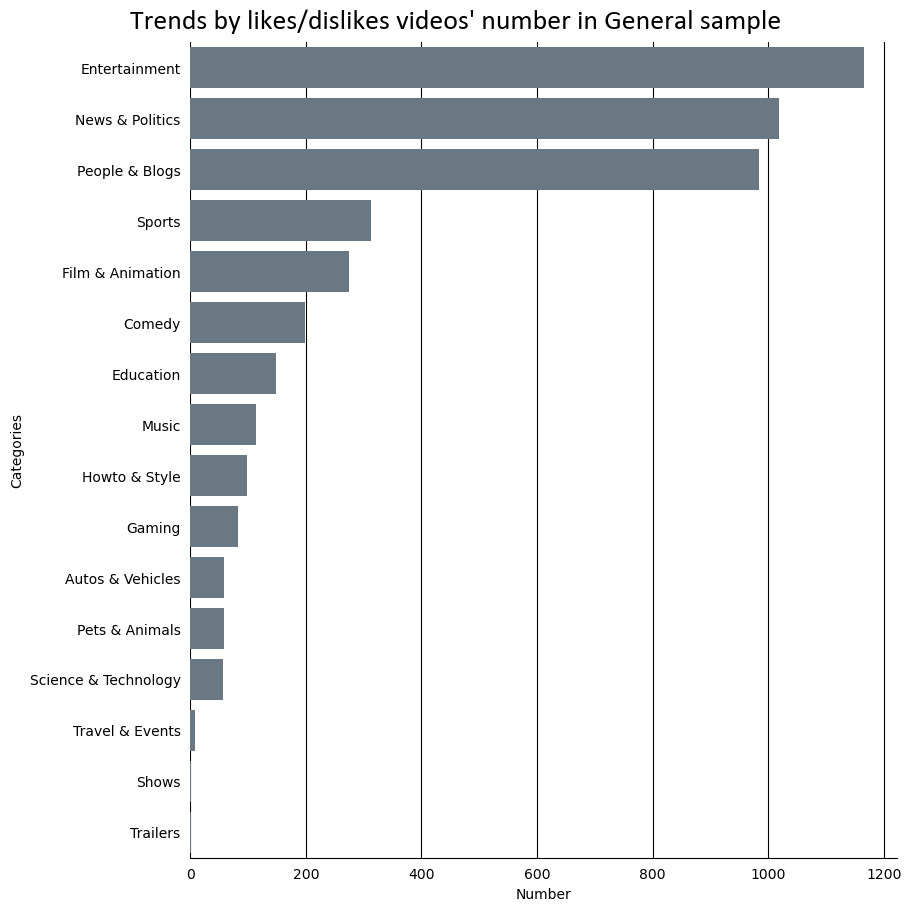

In [59]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df
      .loc[(general_df["likes"] == 0) & (general_df["dislikes"] == 0)]
      .groupby(by="category", as_index=False)
      .agg(Number=("category", "count"))
      .rename(columns={"category": "Category"}))
df.sort_values(by="Number", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Number",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#697882",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Number")

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Trends by likes/dislikes videos' number in General sample", size=20, font="Calibri")
plt.show()

In [60]:
def grouping_by_likes_dislikes(df: pd.DataFrame) -> dict:
    df = df.loc[(df["likes"] == 0) & (df["dislikes"] == 0)].groupby(by="category", as_index=False).agg(number=("category", "count"))
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["number"]
    return our_dict

grouped_by_likes_dislikes = general_df.groupby(by="country", as_index=True).apply(grouping_by_likes_dislikes, include_groups=False).reset_index()
grouped_by_likes_dislikes.columns = ("country", "dict")
display(grouped_by_likes_dislikes)

country                                               dict
0      CA  {'Education': 3, 'Entertainment': 92, 'Film & ...
1      DE  {'Autos & Vehicles': 11, 'Comedy': 26, 'Educat...
2      FR  {'Autos & Vehicles': 29, 'Comedy': 17, 'Educat...
3      GB  {'Entertainment': 2, 'Film & Animation': 7, 'G...
4      IN  {'Education': 96, 'Entertainment': 87, 'Film &...
5      JP  {'Autos & Vehicles': 13, 'Comedy': 6, 'Educati...
6      KR  {'Comedy': 53, 'Education': 8, 'Entertainment'...
7      MX  {'Education': 19, 'Entertainment': 212, 'Film ...
8      RU  {'Autos & Vehicles': 5, 'Comedy': 96, 'Educati...
9      US  {'Education': 2, 'Entertainment': 3, 'Film & A...

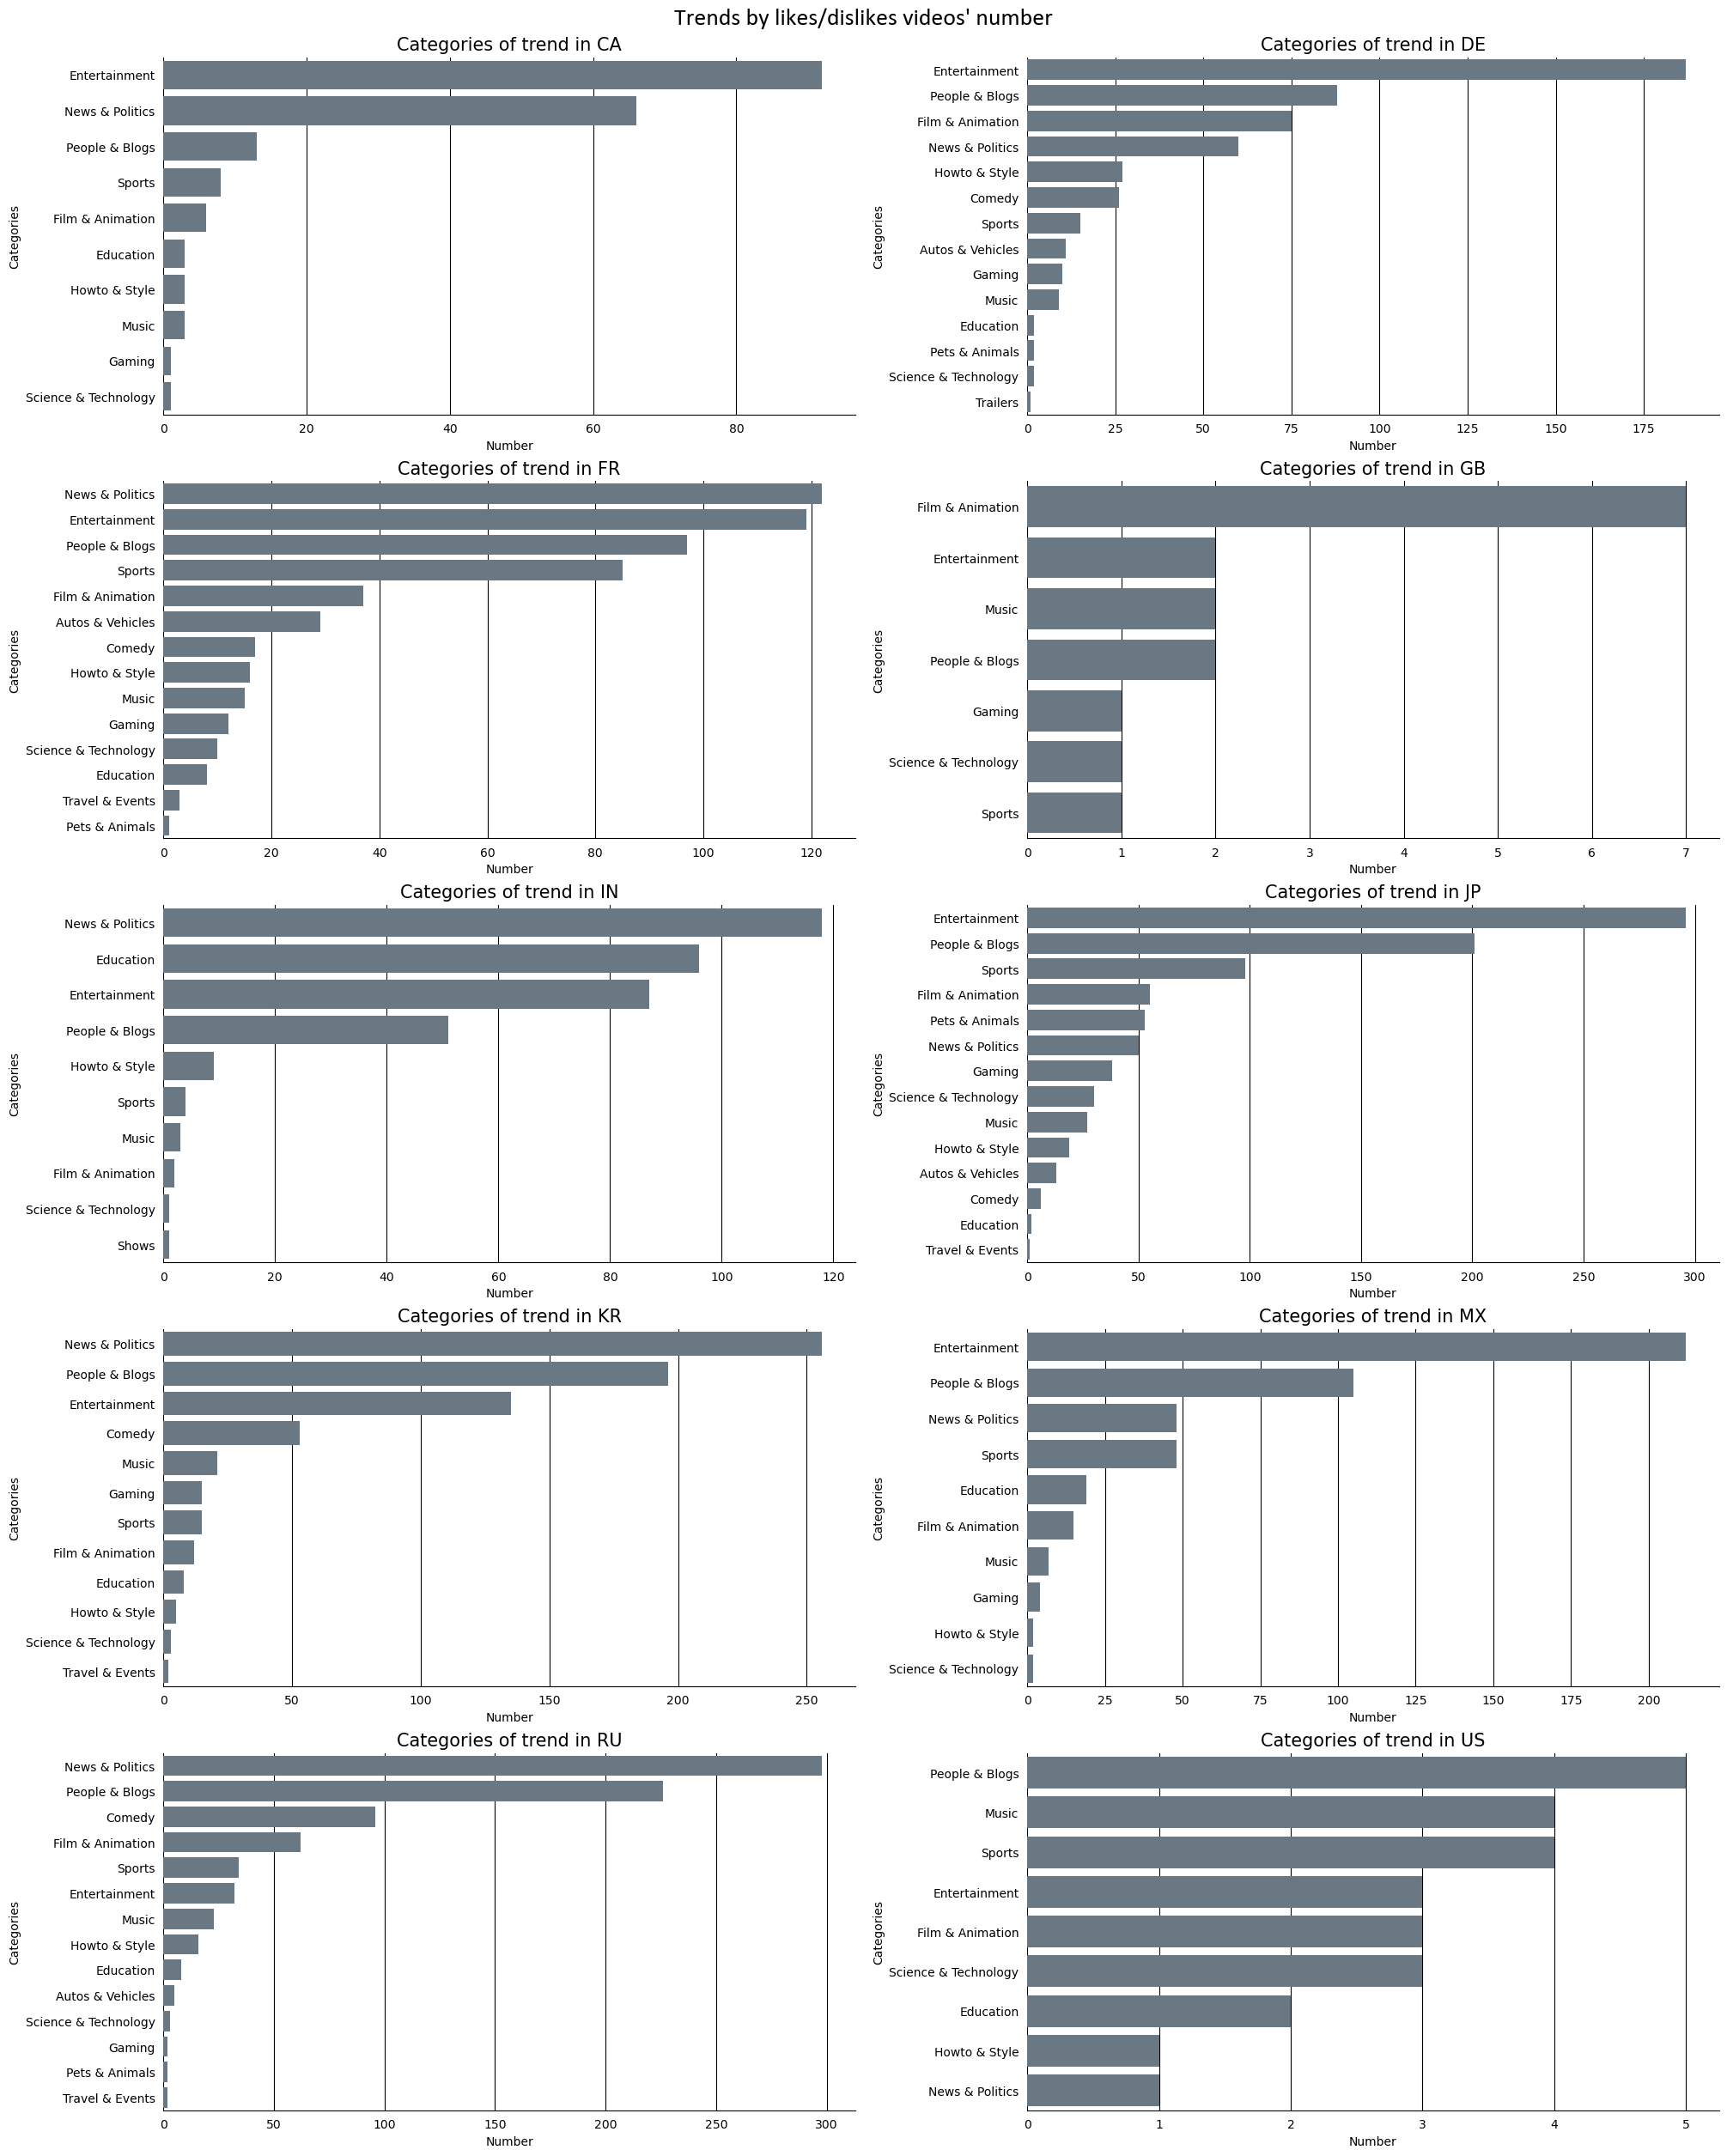

In [61]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_likes_dislikes) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_likes_dislikes.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Number"])
    df.sort_values(by="Number", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Number",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#697882",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Number")

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by likes/dislikes videos' number", size=20, font="Calibri")
plt.show()

In [62]:
print(f"Total number of videos: {format_number(y := (general_df["video_id"].count()))}")
print(f"Number of videos without likes/dislikes: {format_number(x := (general_df.loc[(general_df["likes"] == 0) & (general_df["dislikes"] == 0)]["video_id"].count()))}")
print(f"Ratio: {round((x / y), 2)}%")

Total number of videos: 207 143
Number of videos without likes/dislikes: 4 814
Ratio: 0.02%


If we look at the overall chart, the predominant categories of trending videos where likes and dislikes are disabled (possibly by the authors themselves) are <strong>Entertainment</strong>, <strong>News & Politics</strong>, and <strong>People & Blogs</strong>.

However, an analysis by country shows that this situation varies significantly depending on the country and likely internal or external factors.  
For example, the conclusions from the previous analysis of trending videos in South Korea are also relevant here: there is a large predominance of videos with a political and news focus. These types of videos, by their nature, should aim to present ideas, thoughts, news, and events from an objective standpoint, avoiding subjective judgments. Therefore, disabling likes and dislikes can be justified, as it encourages viewers to form their own opinions after watching the video, rather than being influenced by the crowd.

It is worth noting that such videos are significantly fewer in the United Kingdom and the United States, countries with the most developed democracies and freedom of speech.

## 3.2 Likes-Dislikes ratio

Now let's calculate the like-to-dislike (<strong>Likes-Dislikes</strong>) ratio for each category. In other words, we will determine how many likes (<i>numerator</i>) there are per dislike (<i>denominator</i>).

In [63]:
def grouping_by_likes_dislikes_ratio(df: pd.DataFrame) -> pd.Series:
    return pd.Series(data=[round(
                (df["likes"].sum() / x) if ((x := df["dislikes"].sum())) else 0, 
                2)], index=["Ratio"])

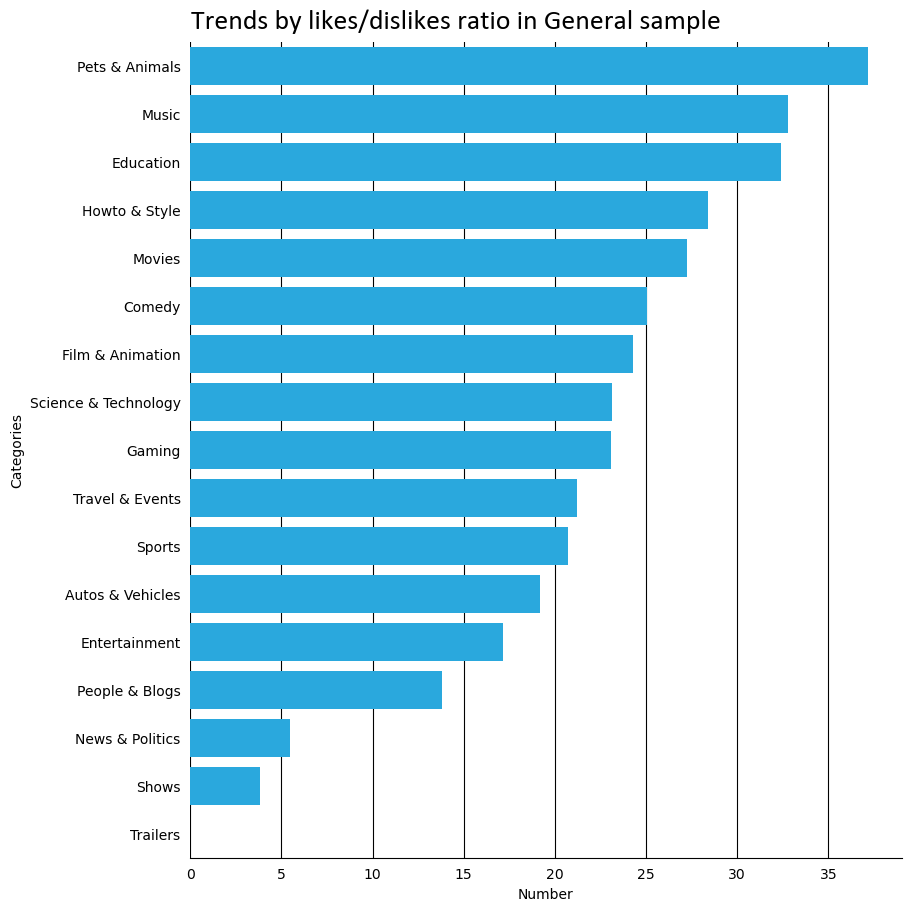

In [64]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df
      .groupby(by="category", as_index=True)
      .apply(grouping_by_likes_dislikes_ratio, include_groups=False)
      .reset_index()
      .rename(columns={"category": "Category", None: "Ratio"}))
df.sort_values(by="Ratio", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Ratio",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#2AA8DD",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Number")

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Trends by likes/dislikes ratio in General sample", size=20, font="Calibri")
plt.show()

In [65]:
def grouping_by_likes_dislikes_ratio_1(df: pd.DataFrame) -> dict:
    df = df.groupby(by="category", as_index=True).apply(grouping_by_likes_dislikes_ratio, include_groups=False).reset_index()
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["Ratio"]
    return our_dict

grouped_by_likes_dislikes_1 = general_df.groupby(by="country", as_index=True).apply(grouping_by_likes_dislikes_ratio_1, include_groups=False).reset_index()
grouped_by_likes_dislikes_1.columns = ("country", "dict")
display(grouped_by_likes_dislikes_1)

country                                               dict
0      CA  {'Autos & Vehicles': 34.3, 'Comedy': 42.03, 'E...
1      DE  {'Autos & Vehicles': 33.09, 'Comedy': 30.52, '...
2      FR  {'Autos & Vehicles': 28.03, 'Comedy': 39.42, '...
3      GB  {'Autos & Vehicles': 12.91, 'Comedy': 33.07, '...
4      IN  {'Autos & Vehicles': 23.64, 'Comedy': 28.93, '...
5      JP  {'Autos & Vehicles': 15.57, 'Comedy': 22.07, '...
6      KR  {'Autos & Vehicles': 15.18, 'Comedy': 30.72, '...
7      MX  {'Autos & Vehicles': 39.38, 'Comedy': 30.1, 'E...
8      RU  {'Autos & Vehicles': 14.93, 'Comedy': 8.75, 'E...
9      US  {'Autos & Vehicles': 17.11, 'Comedy': 38.04, '...

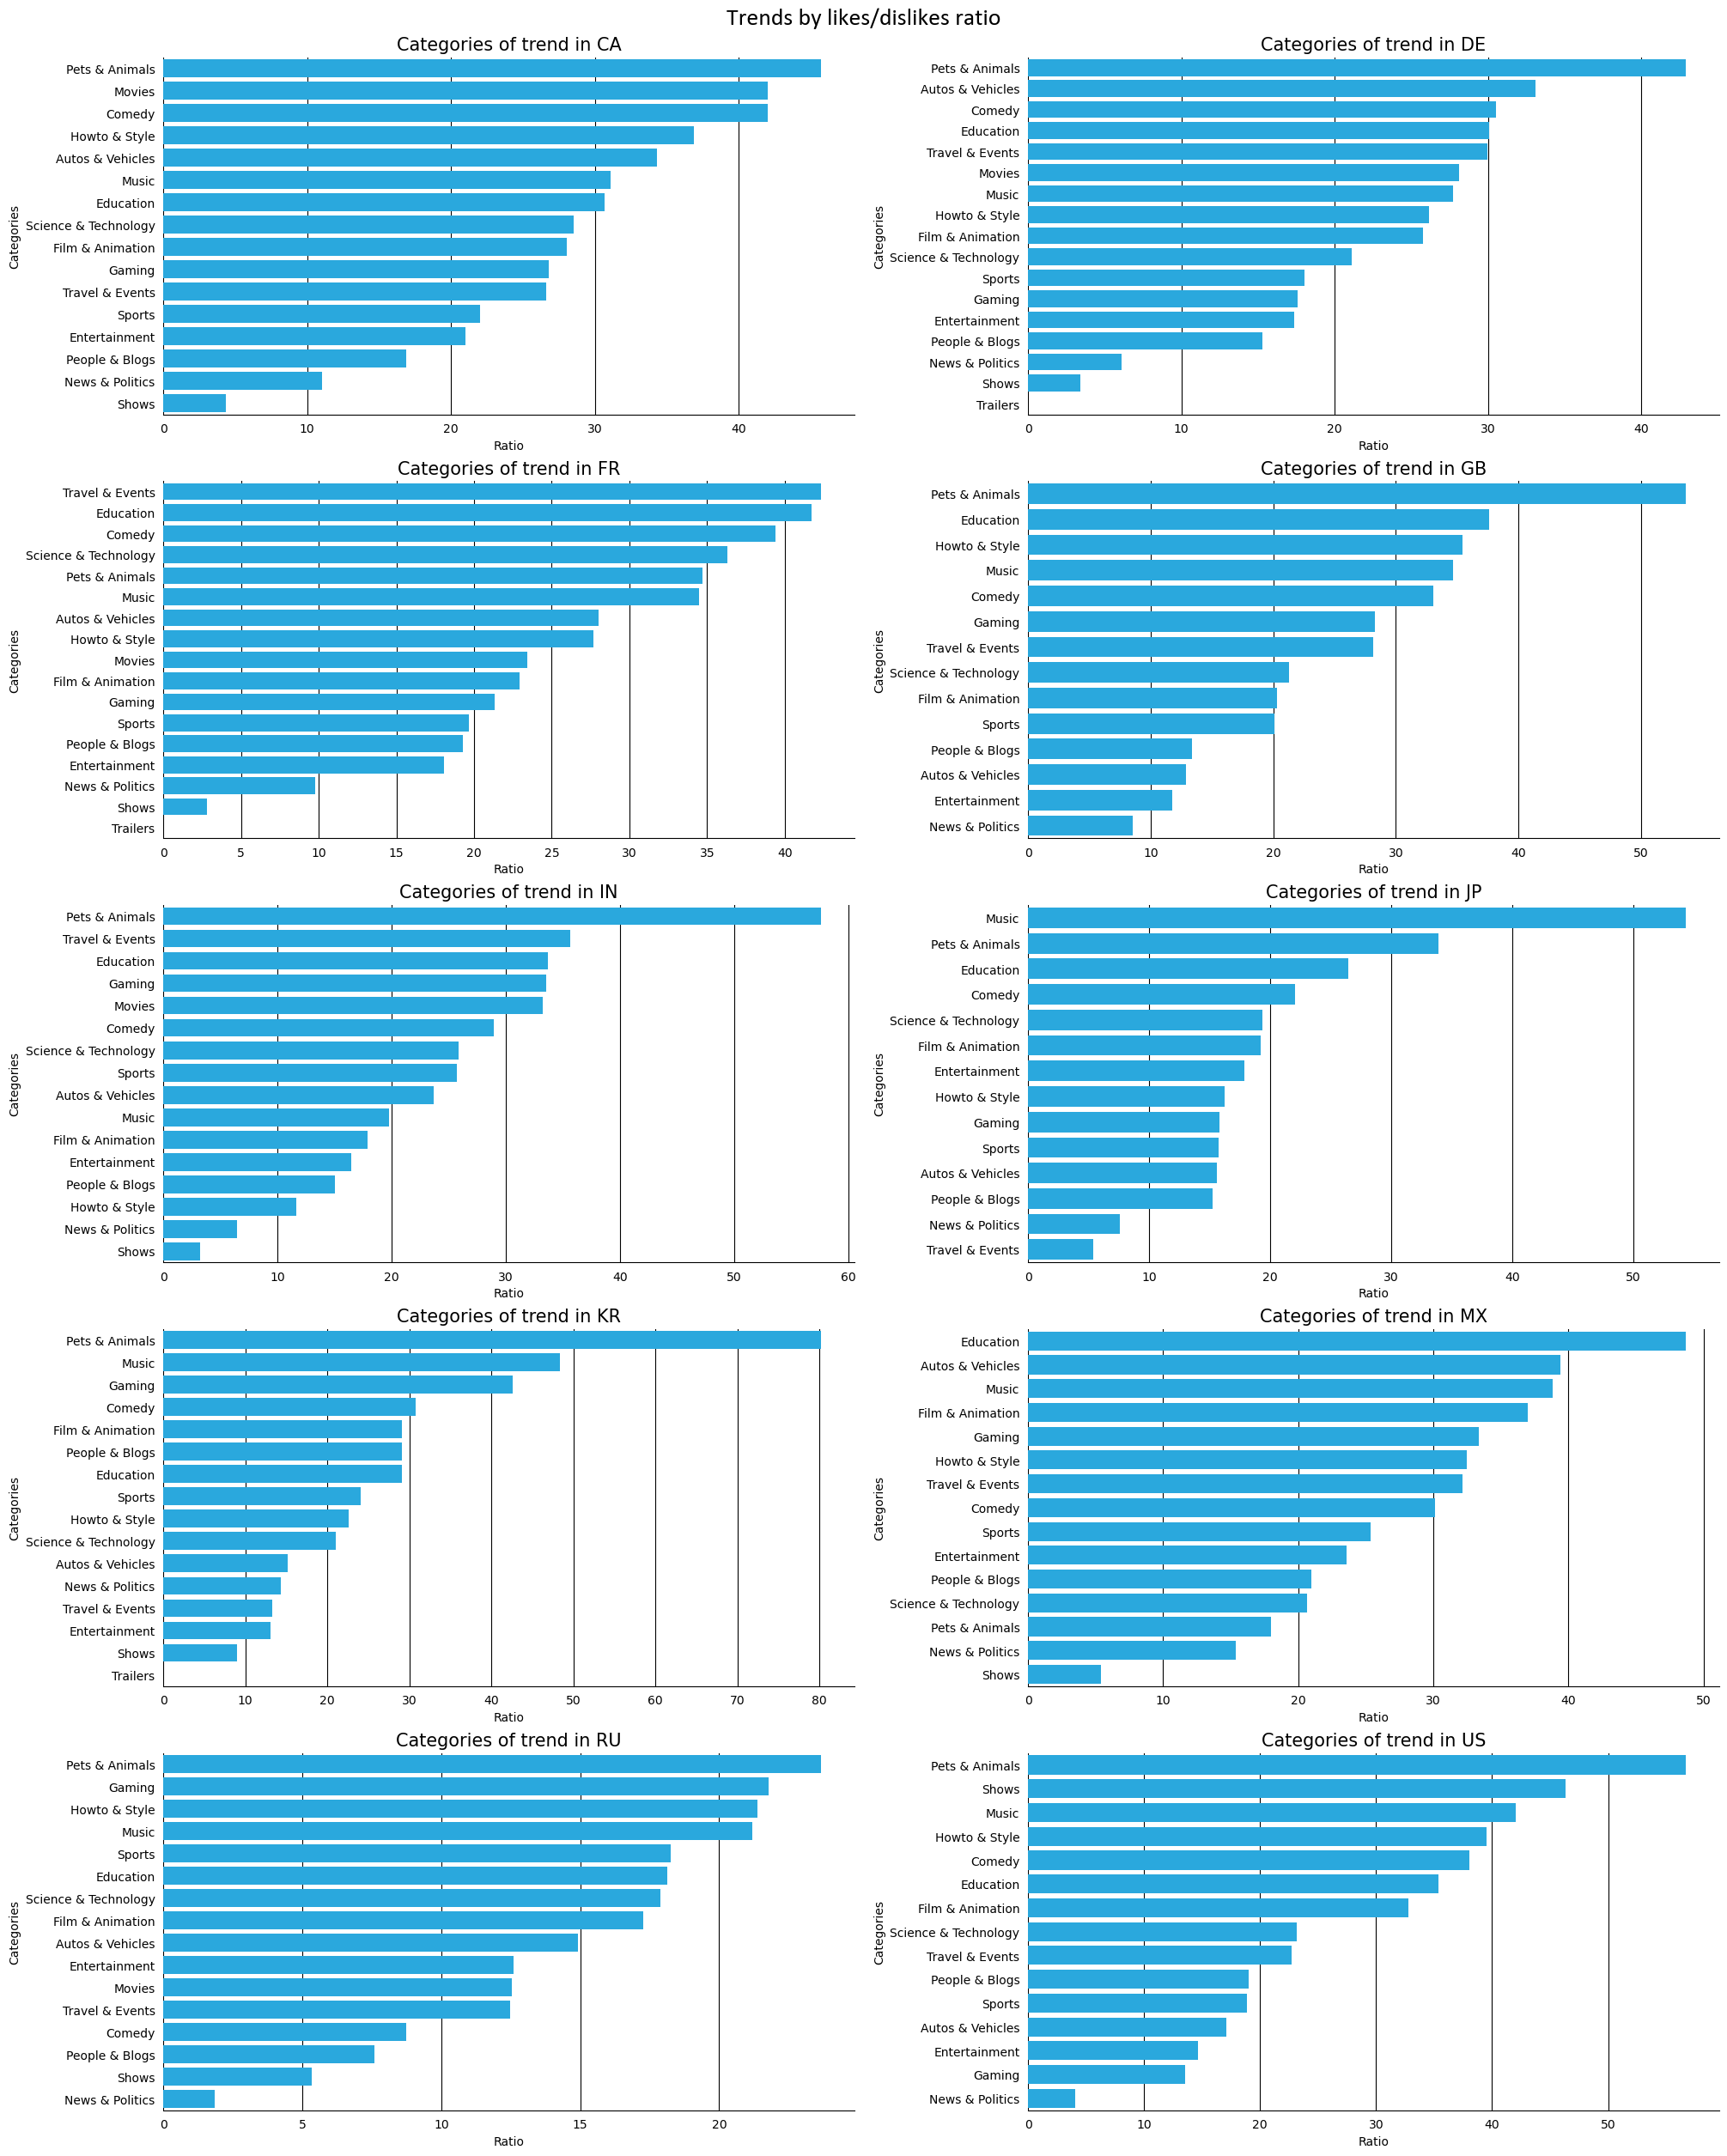

In [66]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_likes_dislikes_1) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_likes_dislikes_1.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Number"])
    df.sort_values(by="Number", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Number",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#2AA8DD",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Ratio")

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by likes/dislikes ratio", size=20, font="Calibri")
plt.show()

I noticed that in three countries, the <strong>Trailers</strong> category has the lowest ratio (possibly zero due to a total of zero dislikes).  
Let's take a look at these videos.

In [67]:
display(general_df.loc[
    general_df["category"] == "Trailers", 
    ["country", "category", "trending_date", "publish_date", "views", "likes", "dislikes", "channel_title", "title"]
    ])

country  category trending_date publish_date  views  likes  dislikes  \
34305      FR  Trailers    2018-05-13   2018-05-09   3136     54         0   
25841      DE  Trailers    2018-03-25   2018-03-08   8804      0         0   
16993      KR  Trailers    2018-02-24   2018-02-22  13454      3         0   

                                        channel_title  \
34305  La Malédiction Winchester (VF) - Bande Annonce   
25841                       Fack Ju Göhte 3 - Trailer   
16993                                      신과함께 : 죄와벌   

                                                title  
34305  La Malédiction Winchester (VF) - Bande Annonce  
25841                       Fack Ju Göhte 3 - Trailer  
16993                                   TRAILER VIDEO

I assume these are trailers for some local TV shows or movies.  
I believe their appearance in the trending list is solely due to the internal workings of YouTube's algorithms. It is unlikely that a video which has only garnered three thousand views in four days could make it to the global trends or the trends in the US or the UK.  
However, after analyzing the view counts, it becomes clear that such a possibility exists.

The highest <strong>Likes-Dislikes ratio</strong> in the overall dataset is found in the <strong>Animals</strong> category (over 35 likes per dislike), followed by <strong>Music</strong> and <strong>Education</strong> (over 30 likes per dislike).  
However, when analyzing this ratio by country trends, it is evident that the maximum value is significantly higher and in a different category.  
For instance, in France, the highest ratio is for <strong>Travel</strong> videos, with over 40 likes per dislike, while in Japan, <strong>Music</strong> videos average more than 55 likes per dislike.

Can we conclude that the French have a strong passion for travel, and the Japanese have a rich musical taste?

I also noticed that the categories with the lowest ratio are <strong>Shows</strong> and <strong>News & Politics</strong>. It would be ideal to delve into the parameters that categorize videos as <strong>Shows</strong> versus <strong>Entertainment</strong>, as they seem similar to me.  
However, the ratio for <strong>Entertainment</strong> videos is much higher.  
When it comes to TV shows, their diversity might be too broad to appeal to many people.

As for <strong>News & Politics</strong>, this situation seems quite normal. News can vary widely, and in recent years there has been a predominance of negative content, making viewers less inclined to like the videos and more likely to dislike and close them.

## 3.3 Testis for Normality

Let's check the distribution of likes and dislikes for normality for further analysis.

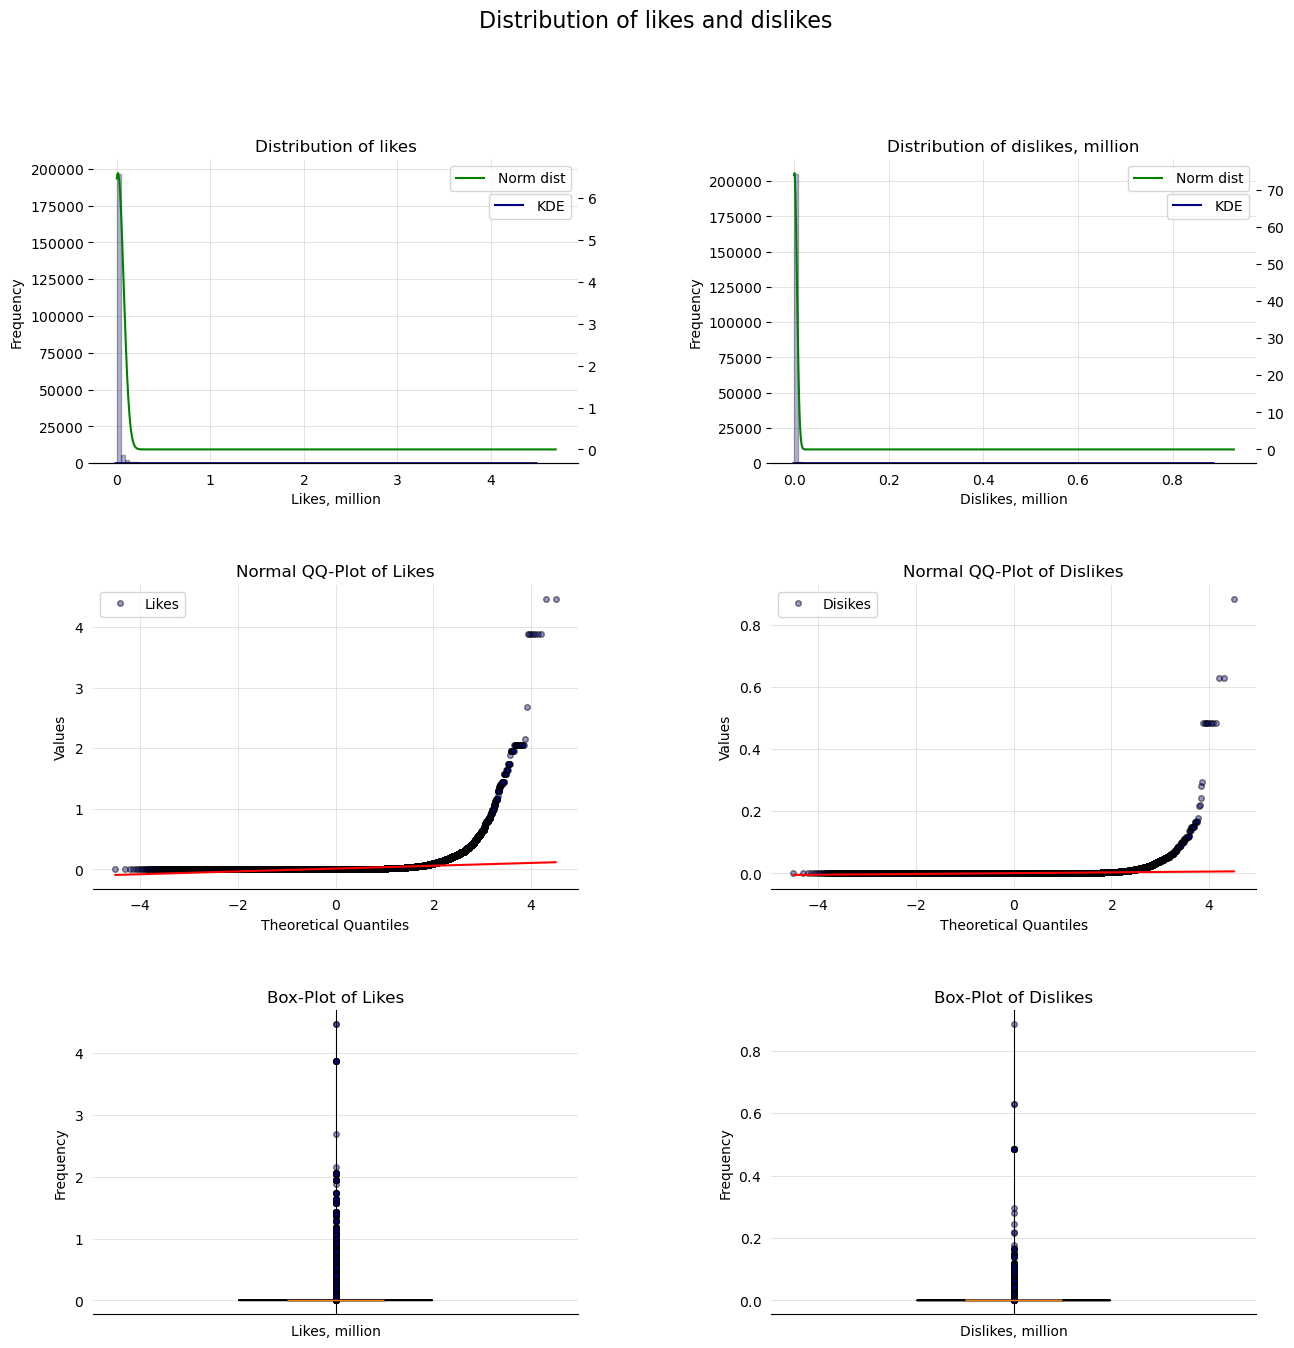

In [68]:
likes_sample = (general_df["likes"] / 1_000_000); likes_mean = likes_sample.mean(); likes_std = likes_sample.std(ddof=1)
dislikes_sample = (general_df["dislikes"] / 1_000_000); dislikes_mean = dislikes_sample.mean(); dislikes_std = dislikes_sample.std(ddof=1)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
ax_hist_like = axs[0, 0]
ax_hist_dis = axs[0, 1]
ax_qq_like = axs[1, 0]
ax_qq_dis = axs[1, 1]
ax_box_like = axs[2, 0]
ax_box_dis = axs[2, 1]



# histogram

ax_hist_like.hist(likes_sample, color="navy", alpha=0.3, edgecolor="black", bins=100)
x_min, x_max = ax_hist_like.get_xlim()
x_range = np.linspace(0, x_max, int((x_max - x_min + 1) * 10_000))
y_range = stats.norm.pdf(x_range, loc=likes_mean, scale=likes_std)
ax_hist_like_2 = ax_hist_like.twinx()
ax_hist_like_2.plot(x_range, y_range, color="green", label="Norm dist")
sns.kdeplot(likes_sample, ax=ax_hist_like, color="navy", fill=False, label="KDE")

ax_hist_like.yaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_hist_like.xaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_hist_like_2.yaxis.grid(False)
ax_hist_like_2.xaxis.grid(False)
ax_hist_like.legend(loc="upper right", bbox_to_anchor=(1, 0.91), handlelength=2, handletextpad=1)
ax_hist_like_2.legend(loc="upper right", bbox_to_anchor=(1, 1), handlelength=2, handletextpad=1)
ax_hist_like_2.set_ylabel(None)
ax_hist_like.ticklabel_format(useMathText=True)
ax_hist_like_2.ticklabel_format(useMathText=True)
ax_hist_like.set_title("Distribution of likes")
ax_hist_like.set_xlabel("Likes, million")
ax_hist_like.set_ylabel("Frequency")



ax_hist_dis.hist(dislikes_sample, color="navy", alpha=0.3, edgecolor="black", bins=100)
x_min, x_max = ax_hist_dis.get_xlim()
x_range = np.linspace(0, x_max, int((x_max - x_min + 1) * 10_000)) #
y_range = stats.norm.pdf(x_range, loc=dislikes_mean, scale=dislikes_std)
ax_hist_dis_2 = ax_hist_dis.twinx()
ax_hist_dis_2.plot(x_range, y_range, color="green", label="Norm dist")
sns.kdeplot(dislikes_sample, ax=ax_hist_dis, color="navy", fill=False, label="KDE")

ax_hist_dis.yaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_hist_dis.xaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_hist_dis_2.yaxis.grid(False)
ax_hist_dis_2.xaxis.grid(False)
ax_hist_dis.legend(loc="upper right", bbox_to_anchor=(1, 0.91), handlelength=2, handletextpad=1)
ax_hist_dis_2.legend(loc="upper right", bbox_to_anchor=(1, 1), handlelength=2, handletextpad=1)
ax_hist_dis_2.set_ylabel(None)
ax_hist_dis.ticklabel_format(useMathText=True)
ax_hist_dis_2.ticklabel_format(useMathText=True)
ax_hist_dis.set_title("Distribution of dislikes, million")
ax_hist_dis.set_xlabel("Dislikes, million")
ax_hist_dis.set_ylabel("Frequency")



# QQ-Plot

stats.probplot(likes_sample, plot=ax_qq_like, dist="norm")
ax_qq_like.set_title("Normal QQ-Plot of Likes")
ax_qq_like.set_xlabel("Theoretical Quantiles")
ax_qq_like.set_ylabel("Values")
ax_qq_like.ticklabel_format(useMathText=True)
ax_qq_like.yaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_qq_like.xaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
line = ax_qq_like.get_lines()[0]
line.set_label("Likes")
line.set_marker("o")
line.set_markersize(4)
line.set_markerfacecolor((0, 0, 124/255, 0.4))
line.set_markeredgecolor((0, 0, 0, 0.5))
ax_qq_like.legend()



stats.probplot(dislikes_sample, plot=ax_qq_dis, dist="norm")
ax_qq_dis.set_title("Normal QQ-Plot of Dislikes")
ax_qq_dis.set_xlabel("Theoretical Quantiles")
ax_qq_dis.set_ylabel("Values")
ax_qq_dis.ticklabel_format(useMathText=True)
ax_qq_dis.yaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_qq_dis.xaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
line = ax_qq_dis.get_lines()[0]
line.set_label("Disikes")
line.set_marker("o")
line.set_markersize(4)
line.set_markerfacecolor((0, 0, 124/255, 0.4))
line.set_markeredgecolor((0, 0, 0, 0.5))
ax_qq_dis.legend()



# Box-plot
ax_box_like.boxplot(likes_sample,
                    labels=["Likes, million"],
                    notch=True,
                    vert=True,
                    whis=1.5,
                    widths=0.4,
                    patch_artist=True,
                    flierprops=dict(
                                    marker="o", 
                                    markerfacecolor=(0, 0, 124/255, 0.4), 
                                    markersize=4, 
                                    markeredgecolor=(0, 0, 0, 0.5)))
ax_box_like.set_title("Box-Plot of Likes")
ax_box_like.yaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_box_like.ticklabel_format(useMathText=True, axis="y")
ax_box_like.set_ylabel("Frequency")



ax_box_dis.boxplot(dislikes_sample,
                    labels=["Dislikes, million"],
                    notch=True,
                    vert=True,
                    whis=1.5,
                    widths=0.4,
                    patch_artist=True,
                    flierprops=dict(
                                    marker="o", 
                                    markerfacecolor=(0, 0, 124/255, 0.4), 
                                    markersize=4, 
                                    markeredgecolor=(0, 0, 0, 0.5)))
ax_box_dis.set_title("Box-Plot of Dislikes")
ax_box_dis.yaxis.grid(True, linestyle="-", linewidth=0.5, color="grey", alpha=0.3)
ax_box_dis.ticklabel_format(useMathText=True, axis="y")
ax_box_dis.set_ylabel("Frequency")



fig.suptitle("Distribution of likes and dislikes", size=16)
plt.ticklabel_format(useMathText=True)
plt.show()

A characteristic feature of the current DataFrame is the presence of numerous outliers.  
We observed these outliers in the distribution of views, and now we see them in the values of likes and dislikes.  
As the graphs indicate, there is no normal distribution present.  

However, on the other hand, if we trim 10% of the values from each end, it may be possible to achieve a normal distribution.   
In such cases, to test the correlation between two distributions, non-parametric alternatives to Pearson's correlation coefficient can be used, specifically the Spearman's rank correlation coefficient or Kendall's tau.

## 3.4 Correlation between likes and dislikes

Since our sample is sufficiently large, let’s examine the results of the Spearman's rank correlation coefficient calculation.

Formula of Spearman's coefficient:  

<div align="center">

$\displaystyle
r_s = 1 - \frac{6\sum_{i=1}^{n}(x_i - y_i)^2}{N(N^2 - 1)}
$

</div>

In [69]:
# At the first, let's try to calculate this by ourself in according to the formula

# First, we need to rank our variables. We will combine LIKES and DISLIKES into a single array for ranking.
combined = np.column_stack((likes_sample, dislikes_sample))

# Next, we obtain the indices that sort the combined array by the first column LIKES.
likes_rank = stats.rankdata(combined[:, 0], method="dense")

# Then, we obtain the indices that sort the combined array by the second column DISLIKES.
dislikes_rank = stats.rankdata(combined[:, 1], method="dense")
print(likes_rank)
print(dislikes_rank)

[ 8106   705   223 ... 13337  7664 32759]
[ 295   21   51 ...  399  182 6257]


In [70]:
sum_likes_dislikes = np.sum(np.array(((likes_rank - dislikes_rank)**2), dtype=np.float64))
N = likes_sample.shape[0]
Spearmen_coef = 1 - ((6 * sum_likes_dislikes) / (N * (N**2 - 1)))

In [71]:
print(f"Standart cor.coef: {np.corrcoef(likes_sample, dislikes_sample)[0, 1]:.2f}")
print(f"Handmade Spearmen's coef: {Spearmen_coef:.2f}")
print(f"Spearmen's coef by stats module: {stats.spearmanr(likes_sample, dislikes_sample)[0]:.2f}")
print(f"p-value: {stats.spearmanr(likes_sample, dislikes_sample)[1]:.9f}")

Standart cor.coef: 0.39
Handmade Spearmen's coef: 0.99
Spearmen's coef by stats module: 0.79
p-value: 0.000000000


As seen from the results, the standard Pearson correlation coefficient is quite close to zero compared to the Spearman correlation coefficient values.  
Both the manually calculated result and the calculation using the ```stats.spearmanr()``` method are close to one, indicating a significant positive correlation.   

Therefore, our null hypothesis — that there is no correlation between likes and dislikes — can be rejected, as the p-value is significantly below 0.05, suggesting a low risk of erroneously rejecting the null hypothesis.

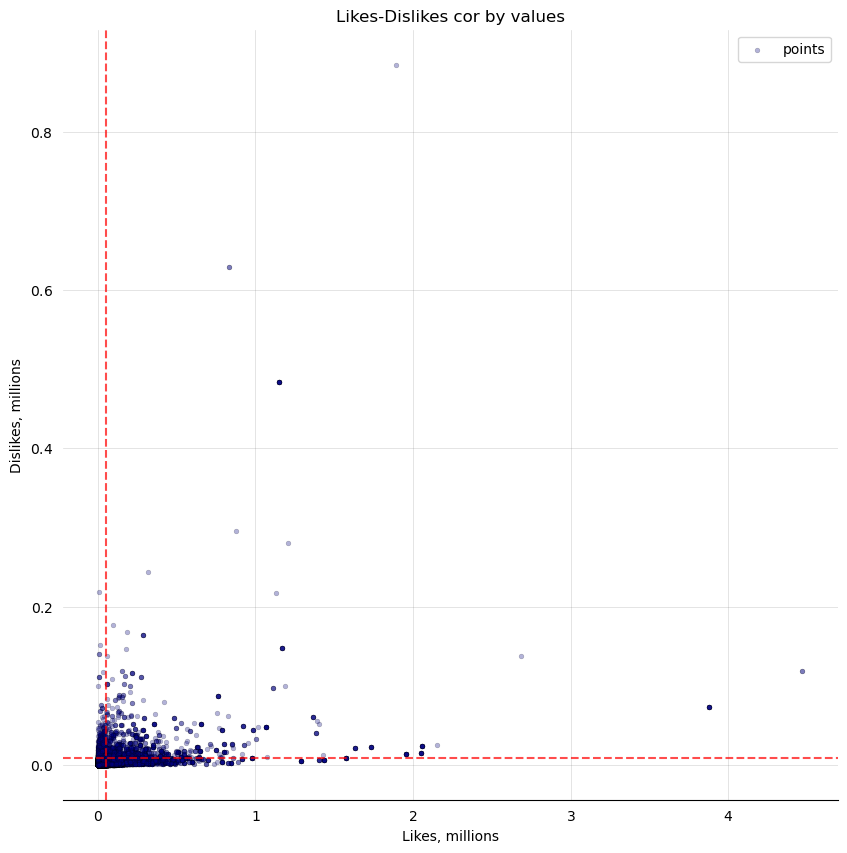

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=likes_sample,
           y=dislikes_sample,
           s=12,
           c="navy",
           alpha=0.3,
           edgecolor="black",
           linewidths=0.3,
           label="points")
ax.set_title("Likes-Dislikes cor by values")
ax.set_xlabel("Likes, millions")
ax.set_ylabel("Dislikes, millions")
ax.grid(True, linewidth=0.5, color="grey", alpha=0.3)
ax.axvline(x=likes_sample.unique().mean(), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax.axhline(y=dislikes_sample.unique().mean(), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax.ticklabel_format(useMathText=True)

plt.legend()
plt.show()

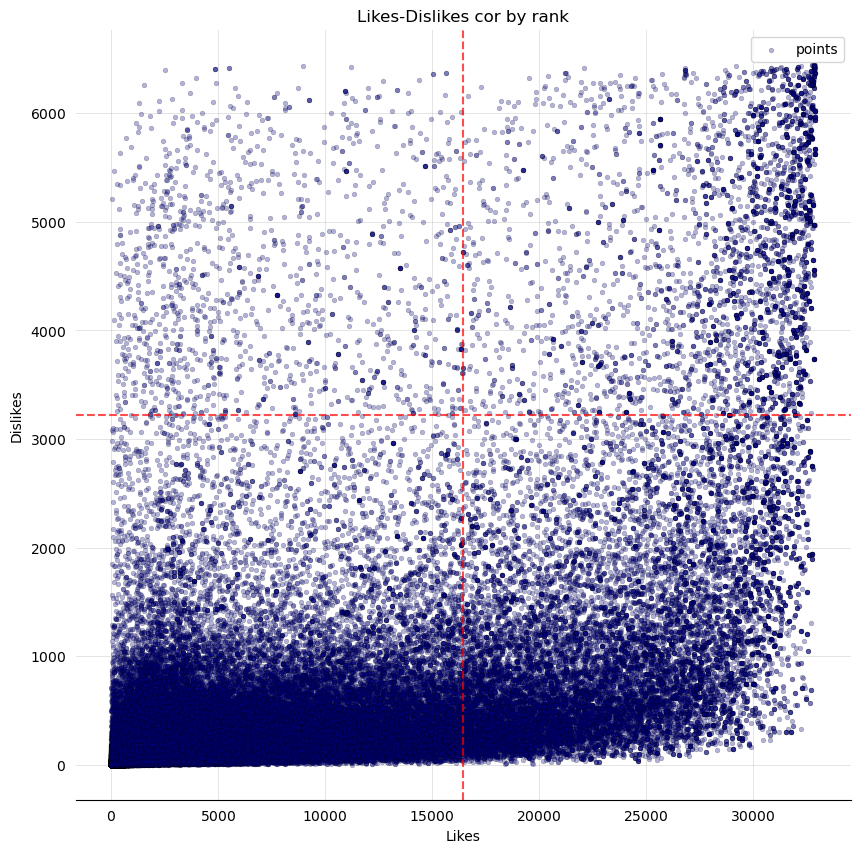

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=likes_rank,
           y=dislikes_rank,
           s=12,
           c="navy",
           alpha=0.3,
           edgecolor="black",
           linewidths=0.3,
           label="points")
ax.set_title("Likes-Dislikes cor by rank")
ax.set_xlabel("Likes")
ax.set_ylabel("Dislikes")
ax.grid(True, linewidth=0.5, color="grey", alpha=0.3)
ax.axvline(x=np.mean(np.unique(likes_rank)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax.axhline(y=np.mean(np.unique(dislikes_rank)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax.ticklabel_format(useMathText=True)

plt.legend()
plt.show()

In the scatter plot without ranking, it is evident that most trending videos have a similar low number of likes and dislikes. As we determined earlier, these videos likely reached the trends due to other parameters evaluated by YouTube’s algorithms.  

However, when examining the scatter plot based on ranked values of likes and dislikes, we can see that a correlation does indeed exist, although it may not be immediately intuitive. There are unique videos with either a minimum number of likes and maximum number of dislikes or vice versa. Nonetheless, the majority of the data points are concentrated in the third and fourth quadrants of the coordinate plane and exhibit a pronounced increasing correlation.

## 3.5 Correlation between likes/dislikes and views

To begin with, let’s visually inspect the correlation between views and likes/dislikes.

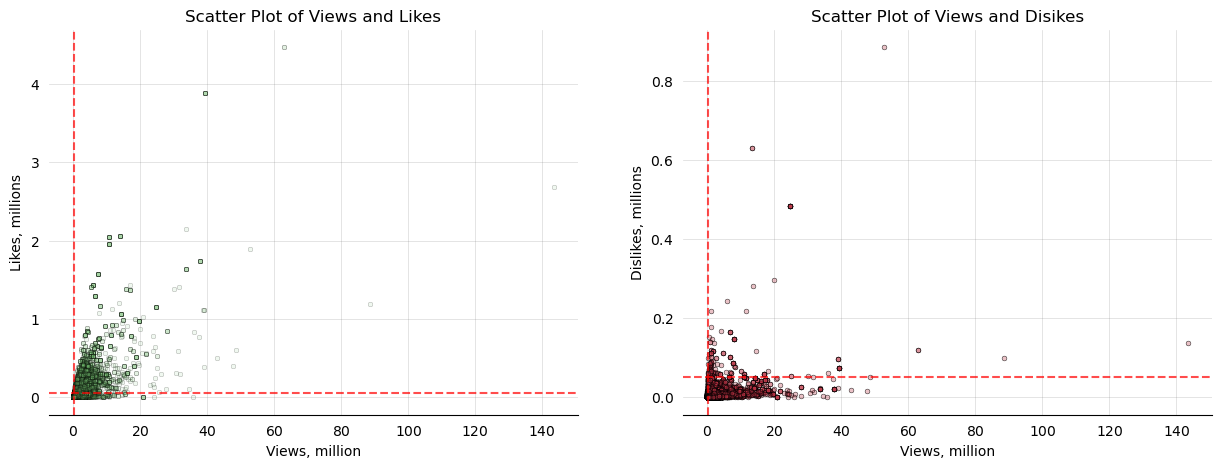

In [74]:
views_sample = general_df["views"] / 1_000_000
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1 = axs[0]
ax2 = axs[1]

ax1.scatter(x=views_sample,
           y=likes_sample,
           s=12,
           color=(116/255, 189/255, 112/255, 0.1),
           edgecolor="black",
           linewidths=0.1,
           label="points")
ax1.set_title("Scatter Plot of Views and Likes")
ax1.set_xlabel("Views, million")
ax1.set_ylabel("Likes, millions")
ax1.grid(True, linewidth=0.5, color="grey", alpha=0.3)
ax1.axvline(x=np.mean(np.unique(views_sample)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax1.axhline(y=np.mean(np.unique(likes_sample)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax1.ticklabel_format(useMathText=True)

ax2.scatter(x=views_sample,
           y=dislikes_sample,
           s=12,
           color=(186/255, 50/255, 67/255, 0.3),
           edgecolor="black",
           linewidths=0.3,
           label="points")
ax2.set_title("Scatter Plot of Views and Disikes")
ax2.set_xlabel("Views, million")
ax2.set_ylabel("Dislikes, millions")
ax2.grid(True, linewidth=0.5, color="grey", alpha=0.3)
ax2.axvline(x=np.mean(np.unique(views_sample)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax2.axhline(y=np.mean(np.unique(likes_sample)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax2.ticklabel_format(useMathText=True)

plt.show()

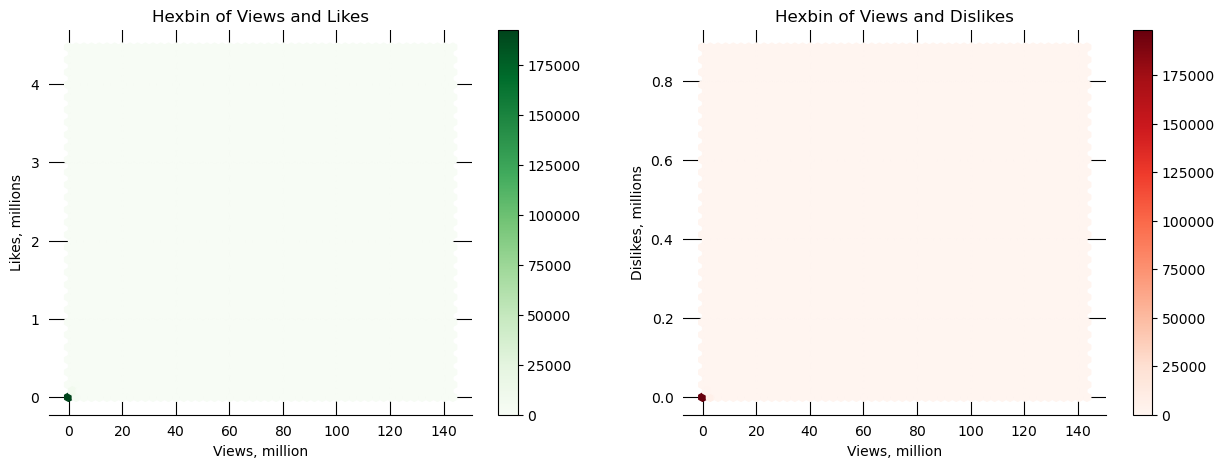

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1 = axs[0]
ax2 = axs[1]

x = ax1.hexbin(
    x=views_sample, 
    y=likes_sample,
    gridsize=50,
    cmap="Greens")
plt.colorbar(ax=ax1, mappable=x)
ax1.set_title("Hexbin of Views and Likes")
ax1.set_xlabel("Views, million")
ax1.set_ylabel("Likes, millions")
ax1.ticklabel_format(useMathText=True)

x = ax2.hexbin(
    x=views_sample, 
    y=dislikes_sample,
    gridsize=50,
    cmap="Reds")
plt.colorbar(ax=ax2, mappable=x)
ax2.set_title("Hexbin of Views and Dislikes")
ax2.set_xlabel("Views, million")
ax2.set_ylabel("Dislikes, millions")
ax2.ticklabel_format(useMathText=True)

plt.show()

As seen from the overall scatter plots of views versus likes/dislikes, the situation is fairly consistent.  
There was little point in constructing additional graphs beyond the scatter plot, but I decided to try it anyway.  

The result was as expected: due to outliers, the graphs were unjustifiably stretched far from zero, despite the majority of videos having relatively small numbers of likes and dislikes. I believe it is better to confirm the presence of correlation between views and likes/dislikes using the Spearman rank correlation coefficient.

In [76]:
Spearmen_coef_likes, p_value_likes = stats.spearmanr(views_sample, likes_sample)
Spearmen_coef_dis, p_value_dis = stats.spearmanr(views_sample, dislikes_sample)

print("Cor. with views")
print(tabulate.tabulate(
    tabular_data=[
        ["Spearmen's coef", Spearmen_coef_likes, Spearmen_coef_dis],
        ["P-value", round(p_value_likes, 5), round(p_value_dis, 5)]
    ], 
    headers=["Likes", "Dislikes"], 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Cor. with views
╒═════════════════╤══════════╤════════════╕
│                 │    Likes │   Dislikes │
╞═════════════════╪══════════╪════════════╡
│ Spearmen's coef │ 0.761138 │    0.83656 │
├─────────────────┼──────────┼────────────┤
│ P-value         │        0 │          0 │
╘═════════════════╧══════════╧════════════╛


A clear correlation is observed between views and likes/dislikes.  
The null hypothesis can be rejected due to the minimal risk, which is below the 0.05 alpha level.  

I suggest examining the rank-based scatter plot.

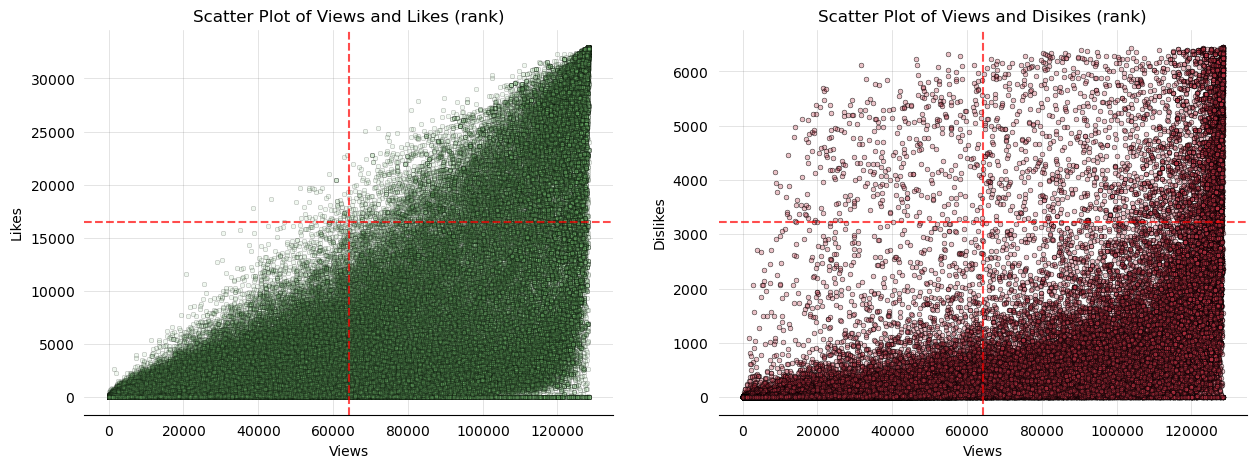

In [77]:
views_rank = stats.rankdata(views_sample, method="dense")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1 = axs[0]
ax2 = axs[1]

ax1.scatter(x=views_rank,
           y=likes_rank,
           s=12,
           color=(116/255, 189/255, 112/255, 0.1),
           edgecolor="black",
           linewidths=0.1,
           label="points")
ax1.set_title("Scatter Plot of Views and Likes (rank)")
ax1.set_xlabel("Views")
ax1.set_ylabel("Likes")
ax1.grid(True, linewidth=0.5, color="grey", alpha=0.3)
ax1.axvline(x=np.mean(np.unique(views_rank)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax1.axhline(y=np.mean(np.unique(likes_rank)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax1.ticklabel_format(useMathText=True)

ax2.scatter(x=views_rank,
           y=dislikes_rank,
           s=12,
           color=(186/255, 50/255, 67/255, 0.3),
           edgecolor="black",
           linewidths=0.3,
           label="points")
ax2.set_title("Scatter Plot of Views and Disikes (rank)")
ax2.set_xlabel("Views")
ax2.set_ylabel("Dislikes")
ax2.grid(True, linewidth=0.5, color="grey", alpha=0.3)
ax2.axvline(x=np.mean(np.unique(views_rank)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax2.axhline(y=np.mean(np.unique(dislikes_rank)), color="red", linewidth=1.5, alpha=0.7, linestyle="--")
ax2.ticklabel_format(useMathText=True)

plt.show()

Although this was somewhat evident, it was worth verifying with data.  

It can be assumed that users typically watch a video first before liking or disliking it.  
Given that it is nearly impossible to like or dislike a video without viewing it, the situation where a user likes or dislikes a video before watching it is relatively rare.   

Therefore, it makes sense to construct a regression model where the predictor (independent variable) is the number of views, and the dependent variables are likes and dislikes.

---
# <center>4. Regression model</center>
<center><img src='images/forecast.jpg' width=700, heigth=700></center>

As previously mentioned, the causal relationship we can infer is that an increase in views corresponds to an increase in likes and dislikes. Since users typically watch the video first before rating it, we cannot assume that the number of views depends on the number of likes or dislikes.  

Based on this assumption, we will attempt to build a linear regression model and display the corresponding graphs.

To visually represent the direction of the relationship between the predictor and the dependent variables, we use the regression line.

To display it, we need to calculate the formula for the linear function, which is as follows:  

<div align="center">

$\displaystyle
Y = b_0 + b_1X
$

</div>  
 
where:  
$b_1$ <i>(slope)</i> - it determines the direction of the line and the angle that the line forms with the $x$-axis.  
$b_0$ <i>(intercept)</i> - it determines where the line intersects the $y$-axis.

Since we have multiple dependent variables — specifically, likes and dislikes — we will first build separate regression models for each.  

Afterwards, we will attempt to develop a multiple regression model.

To determine the coefficients of the linear regression model, we use the method of least squares.   
This method aims to find the optimal parameters that minimize the sum of the squared errors (residuals).

<div align="center"><u>Calculation of the coefficients:</u></div>   
<br>
<div align="center">

$\displaystyle
b_1 = \frac{sd_Y}{sd_X} * r_{xy} = \frac{COV_{XY}}{Var_{X}}
$

</div>  

where:  
$sd_Y$ - is the standart deviation of $Y$-variable.  
$sc_X$ - is the standart deviation of $X$-variable.  
$r_{xy}$ - is the correlation coeficient.  
$COV_{XY}$ - is the covariation value.  
$Var{X}$ - is the X-variable variance.

<div align="center">

$\displaystyle
b_0 = \bar{Y} - b_1*\bar{X}
$

</div>  

where:  
$\bar{Y}$ and $\bar{X}$ - are the mean values of $Y$ and $X$ variables

## 4.1 Regression model for views and likes/dislikes.

In [78]:
# at first, calculate the slope and intercept by ourself
views_std = views_sample.std(ddof=1)
views_mean = views_sample.mean()
likes_b_1 = (likes_std / views_std) * Spearmen_coef_likes
likes_b_0 = likes_mean - (likes_b_1 * views_mean)

likes_model = LinearRegression()
likes_model.fit(views_sample.to_frame(), likes_sample)

print("Coefficient calculation")
print(tabulate.tabulate(
    tabular_data=[
        [r"b_1", f"{likes_b_1:.4f}", f"{likes_model.coef_[0]:.4f}"],
        [r"b_0", f"{likes_b_0:.4f}", f"{likes_model.intercept_:.4f}"]
    ], 
    headers=["handmade", "Linear model"], 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Coefficient calculation
╒═════╤════════════╤════════════════╕
│     │   handmade │   Linear model │
╞═════╪════════════╪════════════════╡
│ b_1 │      0.042 │         0.0398 │
├─────┼────────────┼────────────────┤
│ b_0 │    -0.0007 │             -0 │
╘═════╧════════════╧════════════════╛


The values differ slightly, so let's try using the formula for calculating the coefficient $b_1$ based on the covariance.

In [79]:
likes_b_1 = (np.cov(likes_sample, views_sample)[0, 1]) / (np.var(views_sample, ddof=1))
likes_b_0 = likes_mean - (likes_b_1 * views_mean)

likes_model = LinearRegression()
likes_model.fit(views_sample.to_frame(), likes_sample)

print("Coefficient calculation")
print(tabulate.tabulate(
    tabular_data=[
        [r"b_1", f"{likes_b_1:.4f}", f"{likes_model.coef_[0]:.4f}"],
        [r"b_0", f"{likes_b_0:.4f}", f"{likes_model.intercept_:.4f}"]
    ], 
    headers=["handmade", "Linear model"], 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Coefficient calculation
╒═════╤════════════╤════════════════╕
│     │   handmade │   Linear model │
╞═════╪════════════╪════════════════╡
│ b_1 │     0.0398 │         0.0398 │
├─────┼────────────┼────────────────┤
│ b_0 │         -0 │             -0 │
╘═════╧════════════╧════════════════╛


That’s better.

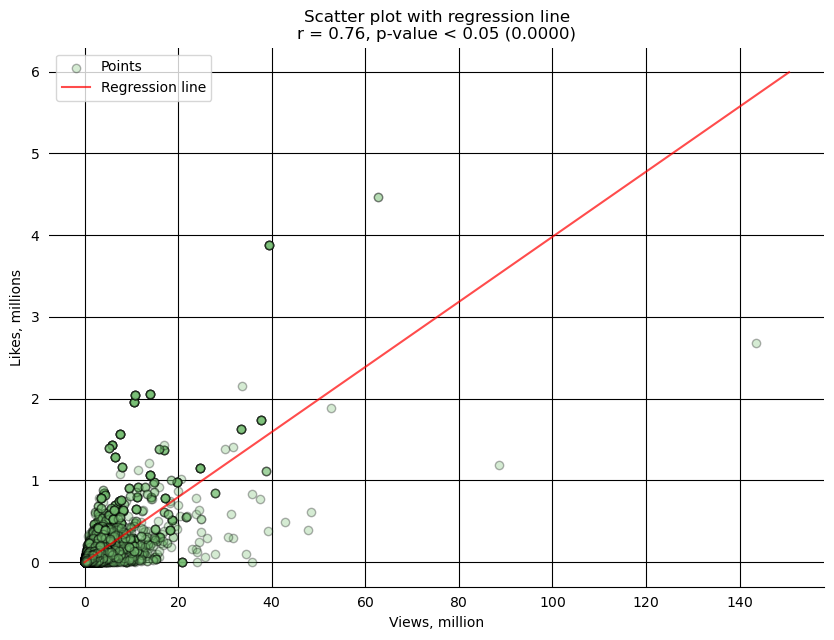

In [80]:
plt.figure(figsize=(10, 7))
plt.scatter(views_sample, likes_sample, color=(116/255, 189/255, 112/255, 0.1), alpha=0.3, edgecolor="black", linewidths=1, label="Points")
plt.xlabel("Views, million")
plt.ylabel("Likes, millions")

x_min, x_max = plt.xlim()
x_line = np.linspace(0, x_max, int(x_max - x_min + 1))
y_line = likes_b_0 + likes_b_1 * x_line
plt.plot(x_line, y_line, color = "red", alpha=0.7, label="Regression line")

plt.title(f"Scatter plot with regression line\nr = {Spearmen_coef_likes:.2f}, p-value < 0.05 ({p_value_likes:.4f})")
plt.grid(True)
plt.legend()
plt.ticklabel_format(useMathText=True)
plt.show()

Now do the same for dislikes.

In [81]:
dislikes_b_1 = (np.cov(dislikes_sample, views_sample)[0, 1]) / (np.var(views_sample, ddof=1))
dislikes_b_0 = dislikes_mean - (dislikes_b_1 * views_mean)

dislikes_model = LinearRegression()
dislikes_model.fit(views_sample.to_frame(), dislikes_sample)

print("Coefficient calculation")
print(tabulate.tabulate(
    tabular_data=[
        [r"b_1", f"{dislikes_b_1:.4f}", f"{dislikes_model.coef_[0]:.4f}"],
        [r"b_0", f"{dislikes_b_0:.4f}", f"{dislikes_model.intercept_:.4f}"]
    ], 
    headers=["handmade", "Linear model"], 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Coefficient calculation
╒═════╤════════════╤════════════════╕
│     │   handmade │   Linear model │
╞═════╪════════════╪════════════════╡
│ b_1 │     0.0021 │         0.0021 │
├─────┼────────────┼────────────────┤
│ b_0 │         -0 │             -0 │
╘═════╧════════════╧════════════════╛


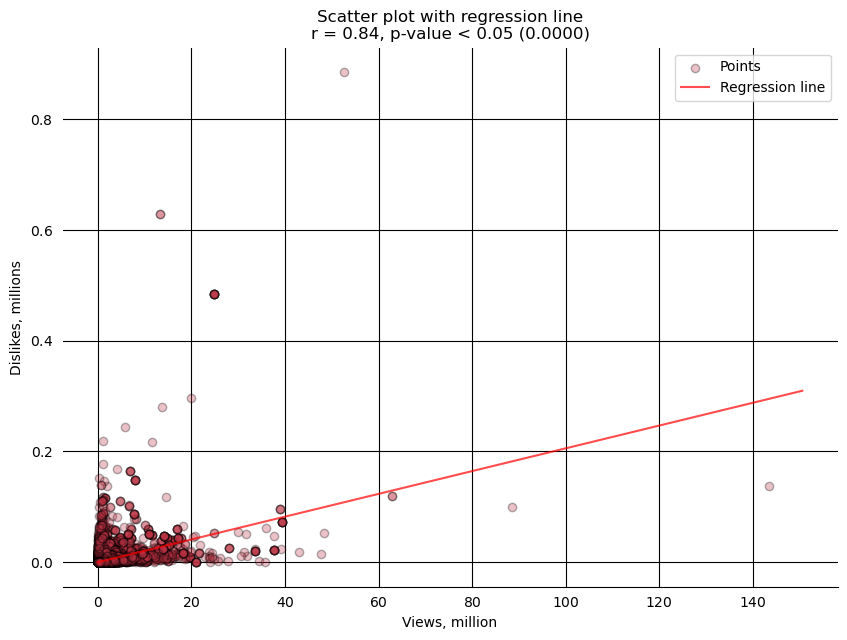

In [82]:
plt.figure(figsize=(10, 7))
plt.scatter(views_sample, dislikes_sample, color=(186/255, 50/255, 67/255, 0.3), alpha=0.3, edgecolor="black", linewidths=1, label="Points")
plt.xlabel("Views, million")
plt.ylabel("Dislikes, millions")

x_min, x_max = plt.xlim()
x_line = np.linspace(0, x_max, int(x_max - x_min + 1))
y_line = dislikes_b_0 + dislikes_b_1 * x_line
plt.plot(x_line, y_line, color = "red", alpha=0.7, label="Regression line")

plt.title(f"Scatter plot with regression line\nr = {Spearmen_coef_dis:.2f}, p-value < 0.05 ({p_value_dis:.4f})")
plt.grid(True)
plt.legend()
plt.ticklabel_format(useMathText=True)
plt.show()

## 4.2 Hypothesis on the Significance of the Relationship

Let's assess the significance of the relationship using the t-test.  

The t-test states that if we were to repeatedly compute the sample statistic $b_1$, under the null hypothesis of zero correlation in the population, these values of the statistic $b_1$ would be normally distributed around zero on the coordinate plane.  

In other words, we will test how different the coefficient $b_1$ is from zero.  

The formula for the t-test in this case is as follows:  

<div align="center">

$\displaystyle
t = \frac{b_1 - \bar{b_1}}{SE} = \frac{b_1 - 0}{SE} = \frac{b_1}{SE}
$

</div>  

The degrees of freedom for this criterion are determined by the following formula:  

<div align="center">

$\displaystyle
df = N - 2
$

</div>  

At the same time, the standard error of the mean coefficient b1 will be calculated as follows:

<div align="center">

$\displaystyle
SE_{b_1} = \frac{\sigma_{residuals}}{\sqrt{\sum \left(x - \bar{x} \right)^2}} = \frac{\sqrt{\frac{\sum \left( y - \hat{y}\right)^2}{n-2}}}{\sqrt{\sum \left(x - \bar{x} \right)^2}}
$

</div>

In [83]:
likes_t = likes_b_1 / ((((np.sum([(i[0] - i[1])**2 for i in zip(likes_sample, [(likes_b_0 + likes_b_1*j) for j in views_sample])])) / (len(likes_sample) - 2))**(1/2)) / ((np.sum((views_sample - views_mean)**2))**(1/2)))
dislikes_t = dislikes_b_1 / ((((np.sum([(i[0] - i[1])**2 for i in zip(dislikes_sample, [(dislikes_b_0 + dislikes_b_1*j) for j in views_sample])])) / (len(dislikes_sample) - 2))**(1/2)) / ((np.sum((views_sample - views_mean)**2))**(1/2)))

print(f"t-Statistic for Likes: {likes_t:.4f}, p-value: {(2 * (1 - stats.t.cdf(abs(likes_t), (len(likes_sample) - 2)))):.5f}")
print(f"t-Statistic for Dislikes: {dislikes_t:.4f}, p-value: {(2 * (1 - stats.t.cdf(abs(dislikes_t), (len(dislikes_sample) - 2)))):.5f}")

t-Statistic for Likes: 474.4645, p-value: 0.00000
t-Statistic for Dislikes: 211.4082, p-value: 0.00000


Let's verify this using the value provided by the ```OLS``` method in the ```statsmodels.api``` package.

In [84]:
likes_model_2 = statsmodels.api.OLS(views_sample, likes_sample).fit()
print(likes_model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  views   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.539
Method:                 Least Squares   F-statistic:                          2.420e+05
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                        0.00
Time:                        18:14:50   Log-Likelihood:                     -2.4037e+05
No. Observations:              207143   AIC:                                  4.807e+05
Df Residuals:                  207142   BIC:                                  4.808e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [85]:
dislikes_model_2 = statsmodels.api.OLS(views_sample, dislikes_sample).fit()
print(dislikes_model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  views   R-squared (uncentered):                   0.188
Model:                            OLS   Adj. R-squared (uncentered):              0.188
Method:                 Least Squares   F-statistic:                          4.789e+04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                        0.00
Time:                        18:14:50   Log-Likelihood:                     -2.9899e+05
No. Observations:              207143   AIC:                                  5.980e+05
Df Residuals:                  207142   BIC:                                  5.980e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The t-value calculated manually is not significantly different from that provided by the ```OLS``` method.  

As indicated by the model statistics, the p-value is very low, suggesting a statistically significant relationship between the number of views and the number of likes/dislikes.

An important aspect is the analysis of the <strong><u>coefficient of determination</u></strong>, often referred to as the square of the correlation coefficient.  

However, the standard formula for the correlation coefficient is as follows:  

<div align="center">

$\displaystyle
R^2 = 1 - \frac{SS_{res}}{SS_{total}}
$

</div>  

The <strong><u>coefficient of determination</u></strong> indicates the proportion of the variance in the dependent variable $Y$ that is explained by the regression model.   
We have already obtained this measure from the model summary, but I will attempt to calculate it manually to see how significant the difference is.

In [86]:
likes_r2 = 1 - ((functools.reduce(lambda acc, x: acc + x, map(lambda y: (y[0] - y[1])**2, zip(likes_sample, [likes_b_0 + likes_b_1*i for i in views_sample])))) / (np.sum((likes_sample - likes_sample.mean())**2)))
dislikes_r2 = 1 - ((functools.reduce(lambda acc, x: acc + x, map(lambda y: (y[0] - y[1])**2, zip(dislikes_sample, [dislikes_b_0 + dislikes_b_1*i for i in views_sample])))) / (np.sum((dislikes_sample - dislikes_sample.mean())**2)))

print("Coefficient of determination, R^2")
print(tabulate.tabulate(
    tabular_data=[
        [r"Likes", f"{likes_r2:.4f}", f"{likes_model_2.rsquared:.4f}"],
        [r"Dislikes", f"{dislikes_r2:.4f}", f"{dislikes_model_2.rsquared:.4f}"]
    ], 
    headers=["handmade", "Linear model"], 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Coefficient of determination, R^2
╒══════════╤════════════╤════════════════╕
│          │   handmade │   Linear model │
╞══════════╪════════════╪════════════════╡
│ Likes    │     0.5208 │         0.5388 │
├──────────┼────────────┼────────────────┤
│ Dislikes │     0.1775 │         0.1878 │
╘══════════╧════════════╧════════════════╛


According to the results of the regression analysis, the model for predicting the number of dislikes explains only about $19\%$ of the variance in the dependent variable. This suggests that the current model has limited ability to predict the number of dislikes. It should be noted that a low level of explained variance may indicate the omission of important variables or the complexity of the dependent variable, which is difficult to model.  

In comparison, the model for predicting the number of likes has a much better explained variance, nearly $54\%$. This indicates that the model explains variations in the number of likes more effectively, although there is still room for improvement.  

In light of these results, the next step is to enhance the regression models. It may be worth considering the addition of new predictors or the use of alternative modeling methods. Incorporating additional variables that may be significant for predicting dislikes and likes could improve model accuracy. Additionally, exploring other approaches such as polynomial regression or machine learning methods could yield better results.

## 4.3 Residuals Check

Let's analyze the residuals of our two simple regression models for homoscedasticity and normality of distribution.

In [87]:
likes_rests = np.array(list(map(lambda y: (y[0] - y[1]), zip(likes_sample, [(likes_b_0 + likes_b_1*i) for i in views_sample]))))
dislikes_rests = np.array(list(map(lambda y: (y[0] - y[1]), zip(dislikes_sample, [(dislikes_b_0 + dislikes_b_1*i) for i in views_sample]))))

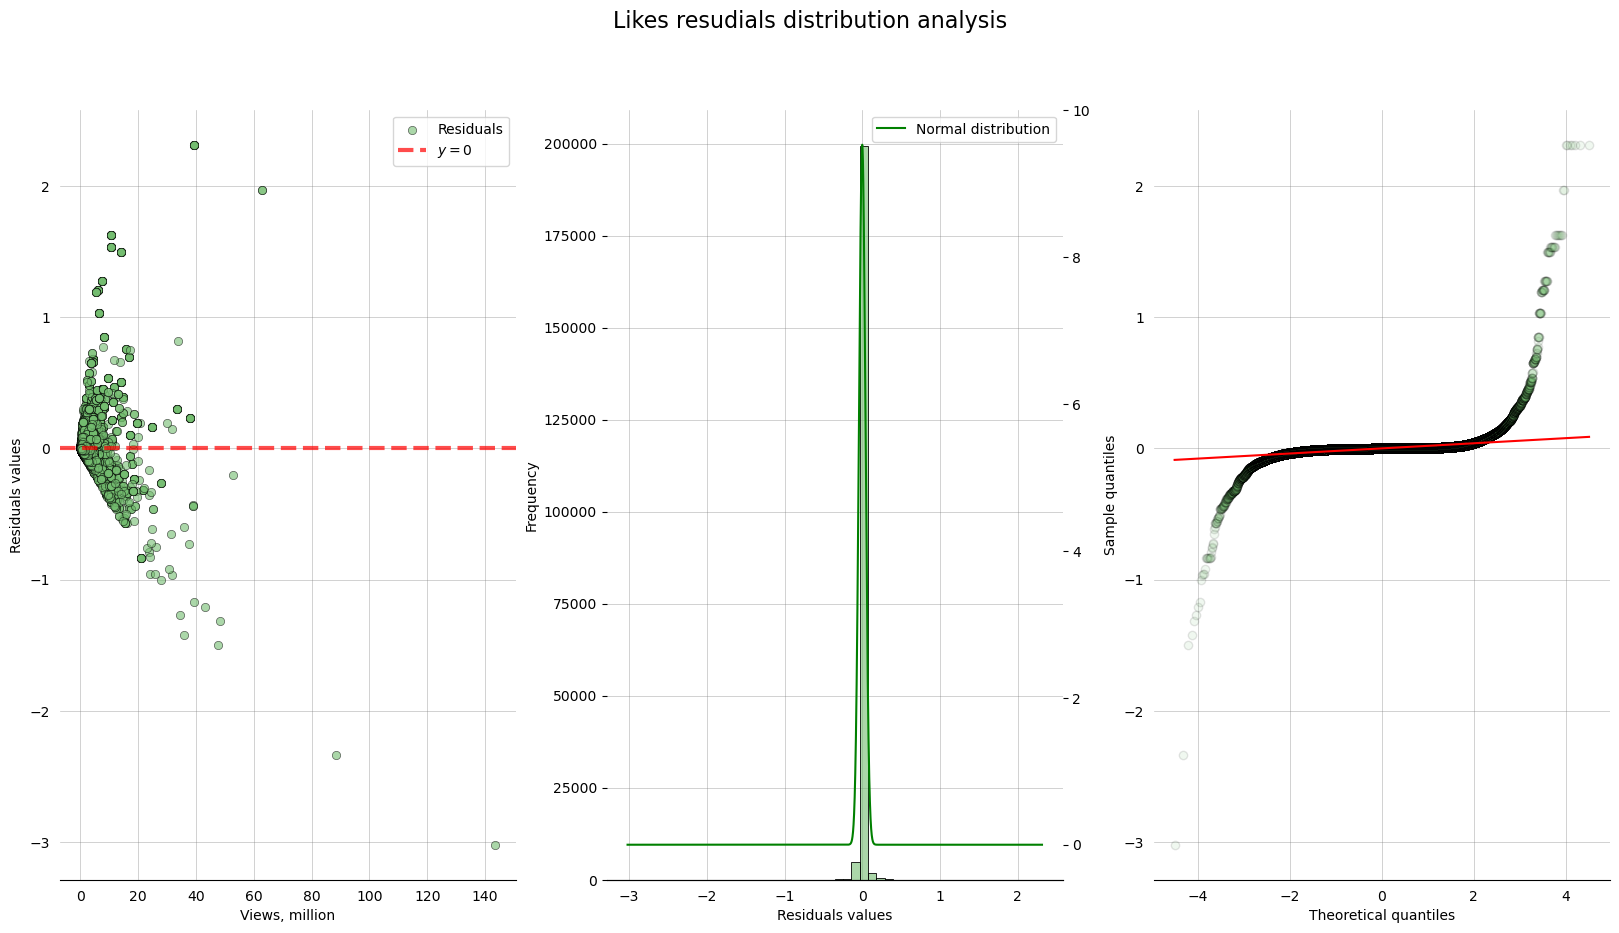

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.scatter(
        views_sample, 
        likes_rests, 
        color=(116/255, 189/255, 112/255, 0.1), 
        alpha=0.6, 
        edgecolor="black", 
        linewidth=0.5, 
        label="Residuals")
ax1.axhline(y=0, color="red", alpha=0.7, linewidth=3, linestyle="--", label=r"$y=0$")
ax1.grid(True, color="grey", alpha=0.5, linewidth=0.5)
ax1.legend()
ax1.set_xlabel("Views, million")
ax1.set_ylabel("Residuals values")


sns.histplot(
        likes_rests,
        ax=ax2,
        kde=False,
        color=(116/255, 189/255, 112/255, 0.1),
        alpha=0.6,
        edgecolor="black",
        bins=50
)
ax2.set_xlabel("Residuals values")
ax2.set_ylabel("Frequency")
ax2.grid(True, color="grey", alpha=0.5, linewidth=0.5)
# ax2.axvline(x=0, color="red", alpha=0.7, linewidth=3, linestyle="--", label=r"$x=0$")
# ax2.legend()
x_min, x_max = np.min(likes_rests), np.max(likes_rests)
x_line = np.linspace(x_min, x_max, int((x_max - x_min + 1)*1_000))
y_line = stats.norm.pdf(x_line, loc=np.mean(likes_rests), scale=np.std(likes_rests, ddof=1))
ax2_2 = ax2.twinx()
ax2_2.plot(x_line, y_line, color="green", label="Normal distribution")
ax2_2.legend()
ax2_2.grid(False)



stats.probplot(likes_rests, plot=ax3, dist="norm")
ax3.set_xlabel("Theoretical quantiles")
ax3.set_ylabel("Sample quantiles")
ax3.set_title(None)
ax3.grid(True, color="grey", alpha=0.5, linewidth=0.5)
line = ax3.get_lines()[0]
line.set_marker("o")
line.set_markersize(6)
line.set_markerfacecolor((116/255, 189/255, 112/255, 0.1))
line.set_markeredgecolor((0,0,0,0.1))


fig.suptitle("Likes resudials distribution analysis", size=16)
plt.show()

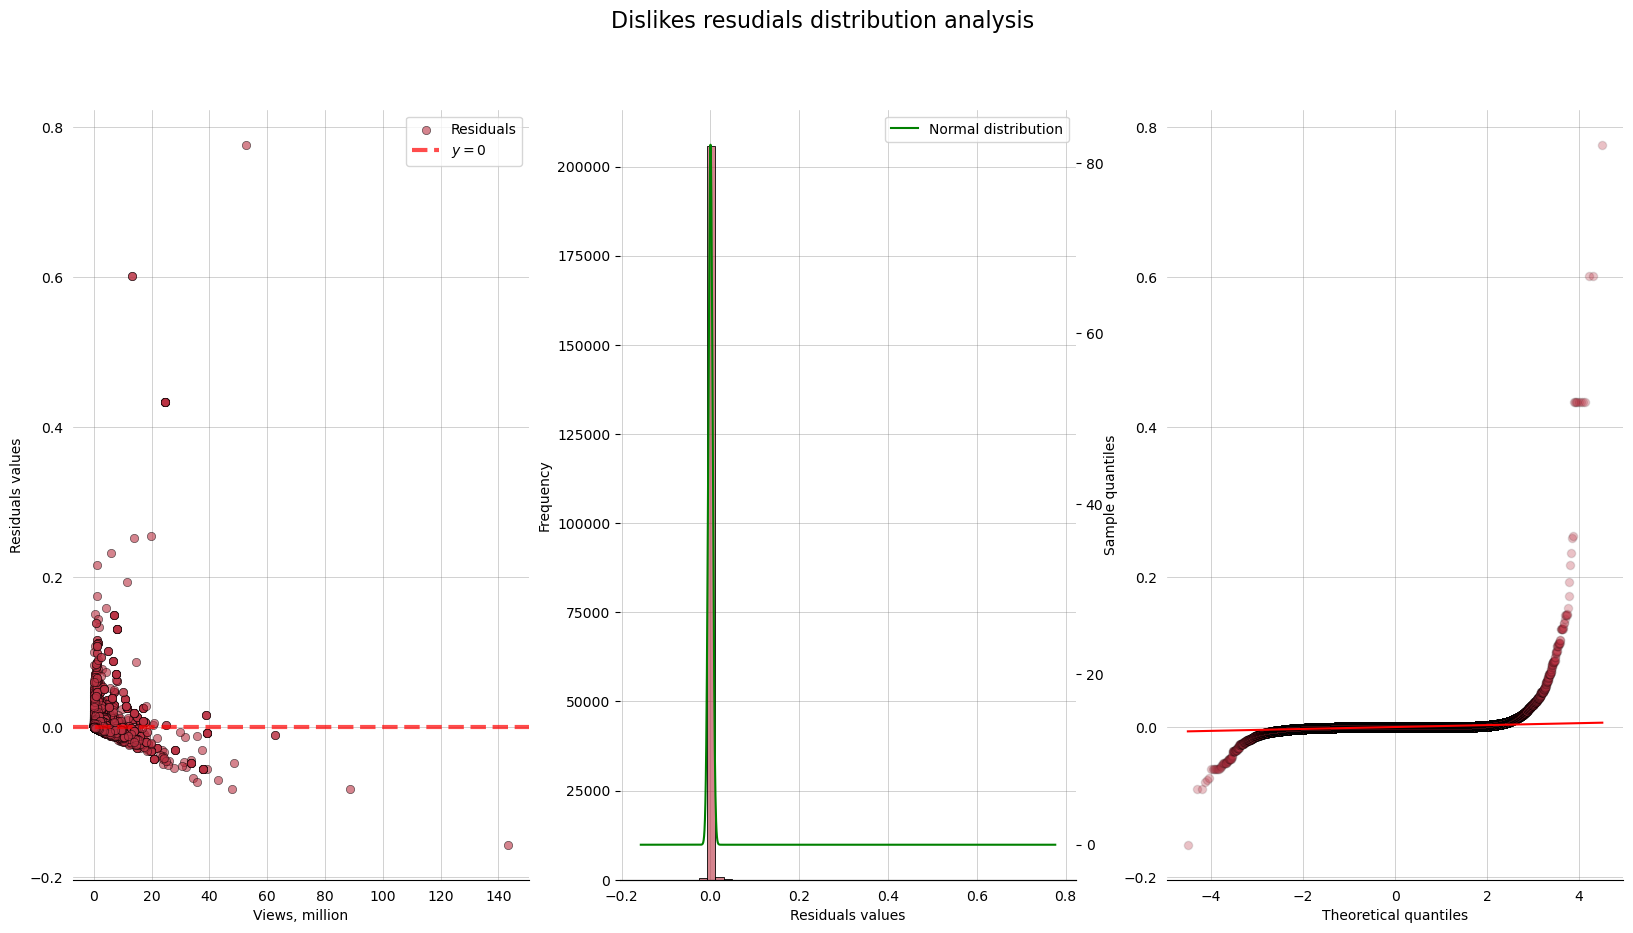

In [89]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.scatter(
        views_sample, 
        dislikes_rests, 
        color=(186/255, 50/255, 67/255, 0.3), 
        alpha=0.6, 
        edgecolor="black", 
        linewidth=0.5, 
        label="Residuals")
ax1.axhline(y=0, color="red", alpha=0.7, linewidth=3, linestyle="--", label=r"$y=0$")
ax1.grid(True, color="grey", alpha=0.5, linewidth=0.5)
ax1.legend()
ax1.set_xlabel("Views, million")
ax1.set_ylabel("Residuals values")


sns.histplot(
        dislikes_rests,
        ax=ax2,
        kde=False,
        color=(186/255, 50/255, 67/255, 0.3),
        alpha=0.6,
        edgecolor="black",
        bins=50
)
ax2.set_xlabel("Residuals values")
ax2.set_ylabel("Frequency")
ax2.grid(True, color="grey", alpha=0.5, linewidth=0.5)
# ax2.axvline(x=0, color="red", alpha=0.7, linewidth=3, linestyle="--", label=r"$x=0$")
# ax2.legend()
x_min, x_max = np.min(dislikes_rests), np.max(dislikes_rests)
x_line = np.linspace(x_min, x_max, int((x_max - x_min + 1)*1_000))
y_line = stats.norm.pdf(x_line, loc=np.mean(dislikes_rests), scale=np.std(dislikes_rests, ddof=1))
ax2_2 = ax2.twinx()
ax2_2.plot(x_line, y_line, color="green", label="Normal distribution")
ax2_2.legend()
ax2_2.grid(False)



stats.probplot(dislikes_rests, plot=ax3, dist="norm")
ax3.set_xlabel("Theoretical quantiles")
ax3.set_ylabel("Sample quantiles")
ax3.set_title(None)
ax3.grid(True, color="grey", alpha=0.5, linewidth=0.5)
line = ax3.get_lines()[0]
line.set_marker("o")
line.set_markersize(6)
line.set_markerfacecolor((186/255, 50/255, 67/255, 0.3))
line.set_markeredgecolor((0,0,0,0.1))


fig.suptitle("Dislikes resudials distribution analysis", size=16)
plt.show()

As seen from the graphs above, a normal distribution may be present, but there are some extreme low and high frequencies, as indicated by the QQ-Plot charts.   

There is clearly a lack of homoscedasticity, which again suggests the need to reconsider and potentially reconfigure the regression model.

## 4.4 Rating

In our DataFrame, there are two parameters with boolean values: <strong><u>ratings</u></strong> and <strong><u>comments</u></strong>, which can either be enabled or disabled. I suggest conducting a small A/B test to verify the hypothesis that enabling these parameters positively impacts the number of views, for example.

In [105]:
print("Number of videos with enabled/disabled rating and comments")
print(tabulate.tabulate(
    tabular_data=[
        ["Enabled", general_df.loc[general_df["ratings_disabled"] == False].shape[0], general_df.loc[general_df["comments_disabled"] == False].shape[0]],
        ["Disabled", general_df.loc[general_df["ratings_disabled"] == True].shape[0], general_df.loc[general_df["comments_disabled"] == True].shape[0]]
    ],
    headers=["Rating", "Comments"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

Number of videos with enabled/disabled rating and comments
╒══════════╤══════════╤════════════╕
│          │   Rating │   Comments │
╞══════════╪══════════╪════════════╡
│ Enabled  │   202371 │     202208 │
├──────────┼──────────┼────────────┤
│ Disabled │     4772 │       4935 │
╘══════════╧══════════╧════════════╛


Let's start with the rating parameter, as our previous calculations were based on the distributions of likes and dislikes. We found that there is a significant correlation between likes/dislikes and views, which even allowed us to build a simple linear regression model.  

For the statistical check, a robust measure is needed, so I chose the median absolute deviation from the median to mitigate the impact of outliers in the distribution.  
The formula for calculating this statistic is as follows:  

<div align="center">

$\displaystyle
MedianAD = m(\mid x_1 - m\mid, \mid x_2 - m \mid, ..., \mid x_N - m \mid)
$

</div>  

where:  
$m$ - is median

In [157]:
views_sample_rating_enabled = general_df.loc[general_df["ratings_disabled"] == False, "views"]
views_sample_rating_disabled = general_df.loc[general_df["ratings_disabled"] == True, "views"]

In [160]:
views_MAD_rating_enabled = (abs(views_sample_rating_enabled - views_sample_rating_enabled.median())).median()
views_MAD_rating_disabled = (abs(views_sample_rating_disabled - views_sample_rating_disabled.median())).median()
print("Observed MAD")
print(tabulate.tabulate(
    tabular_data=[
        ["MAD", views_MAD_rating_enabled, views_MAD_rating_disabled]
    ],
    headers=["Enabled rating", "Disabled rating"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))
print(f"Delta = {views_MAD_rating_enabled - views_MAD_rating_disabled}")

Observed MAD
╒═════╤══════════════════╤═══════════════════╕
│     │   Enabled rating │   Disabled rating │
╞═════╪══════════════════╪═══════════════════╡
│ MAD │            66493 │             28396 │
╘═════╧══════════════════╧═══════════════════╛
Delta = 38097.0


Let's perform a permutation test: we will combine all quantitative values of views, then shuffle them repeatedly and divide them into groups whose sizes correspond to the sizes of the original groups.

In [230]:
def perm_fum(df: pd.Series, nA: int, nB: int) -> float:
    n = nA + nB - 1
    idx_A = set(np.random.choice(range(n), size=nA, replace=False))
    idx_B = set(range(n)).difference(idx_A)
    mad_A = (abs(df.iloc[list(idx_A)] - df.iloc[list(idx_A)].median())).median()
    mad_B = (abs(df.iloc[list(idx_B)] - df.iloc[list(idx_B)].median())).median()
    return mad_A - mad_B

In [231]:
perm_diffs_rating = [perm_fum(general_df["views"], 
                       len(views_sample_rating_enabled), 
                       len(views_sample_rating_disabled))
                       for _ in range(1_000)]

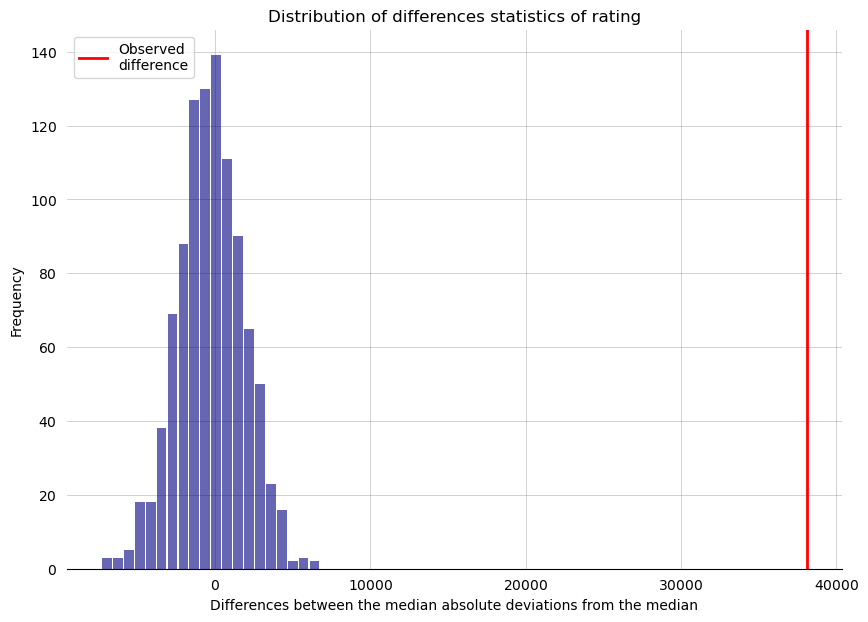

In [232]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(perm_diffs_rating, bins=20, rwidth=0.9, color="navy", alpha=0.6)
ax.axvline(x = (views_MAD_rating_enabled - views_MAD_rating_disabled),
           color="red", linewidth=2, label="Observed\ndifference")
ax.set_xlabel("Differences between the median absolute deviations from the median")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of differences statistics of rating")
ax.grid(True, color="grey", alpha=0.5, linewidth=0.5)
ax.legend()

plt.ticklabel_format(useMathText=True)
plt.show()

In [240]:
print(f"{(np.mean(np.array(perm_diffs_rating) >= (views_MAD_rating_enabled - views_MAD_rating_disabled)) * 100):.4f}%")

0.0000%


From the graph and the average difference of random permutations compared to the observed difference between median absolute deviations from the median, it is evident that the observed difference is far beyond the permutation differences, indicating statistical significance between the video view samples with enabled and disabled likes/dislikes.   

Let's attempt to confirm this by conducting non-parametric analogs of the paired t-test: the <strong><u>Mann-Whitney test</u></strong> and the <strong><u>Kolmogorov-Smirnov test</u></strong>.  

$\alpha = 0.01$

In [234]:
MW = stats.mannwhitneyu(views_sample_rating_enabled, views_sample_rating_disabled)
KS = stats.ks_2samp(views_sample_rating_enabled, views_sample_rating_disabled)
print("Results")
print(tabulate.tabulate(
    tabular_data=[
        ["Munn-Whitney test", f"{MW[0]:.2f}", f"{MW[1]:.4f}"],
        ["Kolmogorov-Smirnov test", f"{KS[0]:.2f}", f"{KS[1]:.4f}"]
    ],
    headers=["Statistic", "P-value"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

print(tabulate.tabulate(
    tabular_data=[
        ["Mean", f"{views_sample_rating_enabled.mean():.2f}", f"{views_sample_rating_disabled.mean():.4f}"],
        ["Median", f"{views_sample_rating_enabled.median():.2f}", f"{views_sample_rating_disabled.median():.4f}"]
    ],
    headers=["Enabled", "Disabled"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

Results
╒═════════════════════════╤═════════════╤═══════════╕
│                         │   Statistic │   P-value │
╞═════════════════════════╪═════════════╪═══════════╡
│ Munn-Whitney test       │ 5.99443e+08 │         0 │
├─────────────────────────┼─────────────┼───────────┤
│ Kolmogorov-Smirnov test │        0.19 │         0 │
╘═════════════════════════╧═════════════╧═══════════╛
╒════════╤═══════════╤════════════╕
│        │   Enabled │   Disabled │
╞════════╪═══════════╪════════════╡
│ Mean   │    303581 │     166621 │
├────────┼───────────┼────────────┤
│ Median │     77359 │      35068 │
╘════════╧═══════════╧════════════╛


It can be concluded that the rating parameter significantly affects the number of views. Considering the mean and median values of the data samples, it can be inferred that the enabled rating parameter positively influences the number of views for the videos.

However, we should also consider the number of videos that made it to the trending list.   
In this case, we can examine how many videos with enabled and disabled ratings made it to the trends and determine whether the probability of trending is influenced by this factor.

In [235]:
print(tabulate.tabulate(
    tabular_data=[
        ["Number", format_number(len(views_sample_rating_enabled)), format_number(len(views_sample_rating_disabled))]
    ],
    headers=["Enabled", "Disabled"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

╒════════╤═══════════╤════════════╕
│        │ Enabled   │ Disabled   │
╞════════╪═══════════╪════════════╡
│ Number │ 202 371   │ 4 772      │
╘════════╧═══════════╧════════════╛


As seen from this simple comparison, the number of videos with the rating parameter enabled is significantly higher than the number of videos with disabled likes/dislikes. It can be hypothesized that enabling this parameter increases the likelihood of a video trending.   

However, for a comprehensive test, we need to measure the number of videos that did not make it to the trends during the same period.  
In this case, we could apply the chi-square distribution statistics and assess the statistical significance between the data samples.

## 4.5 Comments

Let's conduct a similar study for the enabled/disabled comments parameter.

To calculate the median absolute deviation from the median, we will use the ```mad()``` function from the ```statsmodels.robust.scale``` library.

In [236]:
views_sample_comment_enabled = general_df.loc[general_df["comments_disabled"] == False, "views"]
views_sample_comment_disabled = general_df.loc[general_df["comments_disabled"] == True, "views"]

views_MAD_comment_enabled = statsmodels.robust.scale.mad(views_sample_comment_enabled)
views_MAD_comment_disabled = statsmodels.robust.scale.mad(views_sample_comment_disabled)
print("Observed MAD")
print(tabulate.tabulate(
    tabular_data=[
        ["MAD", views_MAD_comment_enabled, views_MAD_comment_disabled]
    ],
    headers=["Enabled comments", "Disabled comments"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))
print(f"Delta = {views_MAD_comment_enabled - views_MAD_comment_disabled:.2f}")

Observed MAD
╒═════╤════════════════════╤═════════════════════╕
│     │   Enabled comments │   Disabled comments │
╞═════╪════════════════════╪═════════════════════╡
│ MAD │            98246.9 │             46604.1 │
╘═════╧════════════════════╧═════════════════════╛
Delta = 51642.74


In [237]:
def perm_fum(df: pd.Series, nA: int, nB: int) -> float:
    n = nA + nB - 1
    rn = range(n)
    idx_A = np.random.choice(rn, size=nA, replace=False)
    idx_B = np.setdiff1d(rn, idx_A)
    mad_A = statsmodels.robust.scale.mad(df.iloc[idx_A])
    mad_B = statsmodels.robust.scale.mad(df.iloc[idx_B])
    return mad_A - mad_B

In [238]:
perm_diffs_comments = [perm_fum(general_df["views"], 
                       len(views_sample_comment_enabled), 
                       len(views_sample_comment_disabled))
                       for _ in range(1_000)]

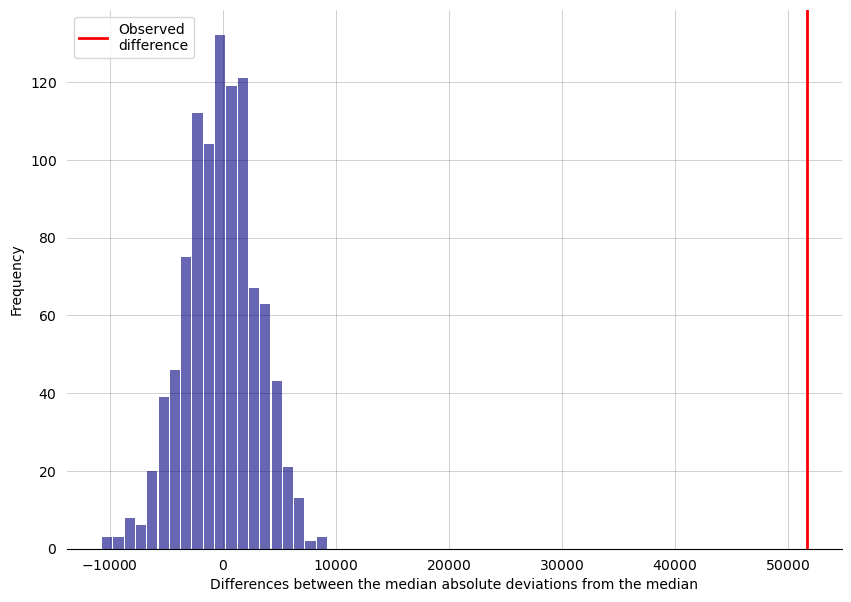

In [239]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(perm_diffs_comments, bins=20, rwidth=0.9, color="navy", alpha=0.6)
ax.axvline(x = (views_MAD_comment_enabled - views_MAD_comment_disabled),
           color="red", linewidth=2, label="Observed\ndifference")
ax.set_xlabel("Differences between the median absolute deviations from the median")
ax.set_ylabel("Frequency")
ax.grid(True, color="grey", alpha=0.5, linewidth=0.5)
ax.legend()

plt.ticklabel_format(useMathText=True)
plt.show()

The situation is very similar to the distribution of differences between median absolute deviations from the median. Therefore, instead of a comprehensive permutation test, I suggest conducting a bootstrap permutation test.

In [241]:
def perm_fum_bootstrap(df: pd.Series, nA: int, nB: int) -> float:
    n = nA + nB - 1
    rn = range(n)
    idx_A = np.random.choice(rn, size=nA, replace=True)
    idx_B = np.random.choice(rn, size=nB, replace=True)
    mad_A = statsmodels.robust.scale.mad(df.iloc[idx_A])
    mad_B = statsmodels.robust.scale.mad(df.iloc[idx_B])
    return mad_A - mad_B

In [242]:
perm_diffs_comments = [perm_fum(general_df["views"], 
                       len(views_sample_comment_enabled), 
                       len(views_sample_comment_disabled))
                       for _ in range(1_000)]

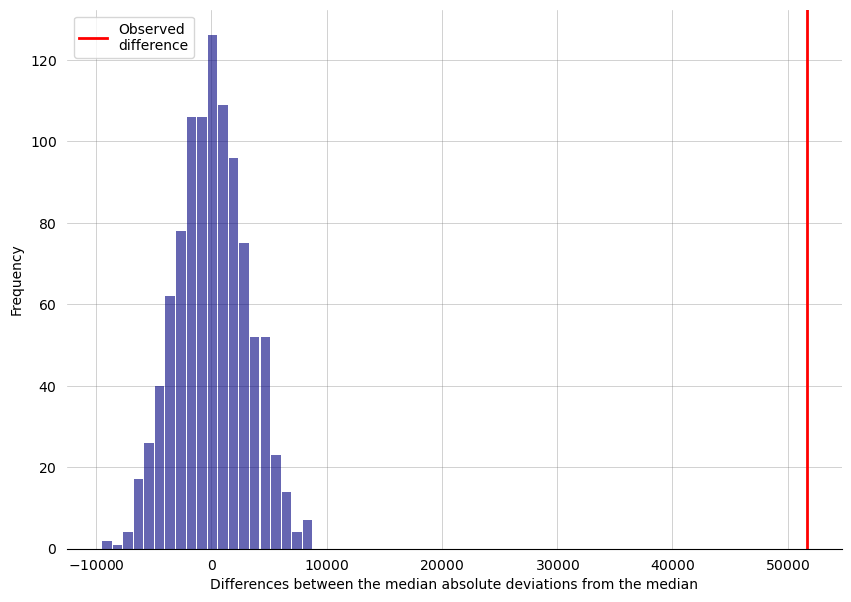

In [243]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(perm_diffs_comments, bins=20, rwidth=0.9, color="navy", alpha=0.6)
ax.axvline(x = (views_MAD_comment_enabled - views_MAD_comment_disabled),
           color="red", linewidth=2, label="Observed\ndifference")
ax.set_xlabel("Differences between the median absolute deviations from the median")
ax.set_ylabel("Frequency")
ax.grid(True, color="grey", alpha=0.5, linewidth=0.5)
ax.legend()

plt.ticklabel_format(useMathText=True)
plt.show()

In [245]:
MW = stats.mannwhitneyu(views_sample_comment_enabled, views_sample_comment_disabled)
KS = stats.ks_2samp(views_sample_comment_enabled, views_sample_comment_disabled)
print("Results")
print(tabulate.tabulate(
    tabular_data=[
        ["Munn-Whitney test", f"{MW[0]:.2f}", f"{MW[1]:.4f}"],
        ["Kolmogorov-Smirnov test", f"{KS[0]:.2f}", f"{KS[1]:.4f}"]
    ],
    headers=["Statistic", "P-value"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

print(tabulate.tabulate(
    tabular_data=[
        ["Mean", f"{views_sample_comment_enabled.mean():.2f}", f"{views_sample_comment_disabled.mean():.4f}"],
        ["Median", f"{views_sample_comment_enabled.median():.2f}", f"{views_sample_comment_disabled.median():.4f}"]
    ],
    headers=["Enabled", "Disabled"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

print(tabulate.tabulate(
    tabular_data=[
        ["Number", format_number(len(views_sample_comment_enabled)), format_number(len(views_sample_comment_disabled))]
    ],
    headers=["Enabled", "Disabled"],
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

Results
╒═════════════════════════╤═════════════╤═══════════╕
│                         │   Statistic │   P-value │
╞═════════════════════════╪═════════════╪═══════════╡
│ Munn-Whitney test       │ 5.94281e+08 │         0 │
├─────────────────────────┼─────────────┼───────────┤
│ Kolmogorov-Smirnov test │        0.16 │         0 │
╘═════════════════════════╧═════════════╧═══════════╛
╒════════╤═══════════╤════════════╕
│        │   Enabled │   Disabled │
╞════════╪═══════════╪════════════╡
│ Mean   │    301877 │     240961 │
├────────┼───────────┼────────────┤
│ Median │     77120 │      37875 │
╘════════╧═══════════╧════════════╛
╒════════╤═══════════╤════════════╕
│        │ Enabled   │ Disabled   │
╞════════╪═══════════╪════════════╡
│ Number │ 202 208   │ 4 935      │
╘════════╧═══════════╧════════════╛


At first glance, the difference between the mean values of the video view samples with enabled and disabled comments might seem insignificant.  
However, the median of the first sample is nearly twice as high as the median of the second sample, and the number of videos with enabled comments is significantly greater than the number of videos with disabled comments.   

This indicates a direct influence of this parameter on the number of views.

## 4.6 Model changing

Let's try to improve the regression model for likes and dislikes by adding several new predictors.

First, it is necessary to convert categorical and boolean variables into numerical values.

In [295]:
predictors = ["views", "comments_disabled", "publish_time", "category", "country"]
X = copy.deepcopy(general_df[predictors])
X["comments_disabled"] = X["comments_disabled"].astype(int)
X["hour"] = pd.to_datetime(X["publish_time"], format="%H:%M:%S").dt.hour
X.drop(columns="publish_time", inplace=True)

country_dict = dict()
for i, v in enumerate(X["country"].unique()):
    country_dict[i] = v; country_dict[v] = i

category_dict = dict()
for i, v in enumerate(X["category"].unique()):
    category_dict[i] = v; category_dict[v] = i

X["country"] = X["country"].apply(lambda x: country_dict[x])
X["category"] = X["category"].apply(lambda x: category_dict[x])

display(X.head())

views  comments_disabled  category  country  hour
40766  296295                  0         0        0     9
20434   30111                  0         0        1     3
20409  100941                  0         0        1    16
20410   51943                  0         1        1    12
20411  215185                  0         2        1    14

In [298]:
Y = general_df["likes"]
likes_model_new = statsmodels.api.OLS(
    Y,
    X.assign(const=1)).fit()
print("New Likes Model")
print(likes_model_new.summary())

New Likes Model
                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                 4.537e+04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:17:57   Log-Likelihood:            -2.4980e+06
No. Observations:              207143   AIC:                         4.996e+06
Df Residuals:                  207137   BIC:                         4.996e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
views                 

In [300]:
Y = general_df["dislikes"]
likes_model_new = statsmodels.api.OLS(
    Y,
    X.assign(const=1)).fit()
print("New Dislikes Model")
print(likes_model_new.summary())

New Dislikes Model
                            OLS Regression Results                            
Dep. Variable:               dislikes   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     9001.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:22:27   Log-Likelihood:            -2.0520e+06
No. Observations:              207143   AIC:                         4.104e+06
Df Residuals:                  207137   BIC:                         4.104e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
views              

As indicated by the metrics of the new regression models, the coefficient of determination has only slightly decreased, which suggests that adding new predictors did not improve the model.   

However, it is evident that nearly all independent variables — such as the country, the comments parameter, the time of publication, and the category — have an impact on the number of likes/dislikes. I believe that adding a few more predictors could improve this model, such as the number of subscribers of the author, seasonality, and extending the sample to include not only trending videos but a broader range of authors and categories.